In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import catboost as cat

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

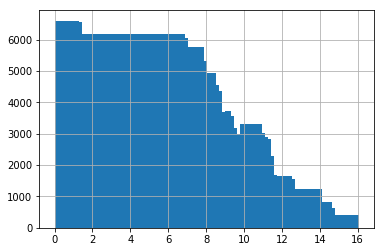

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
rawydf=ydf


In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


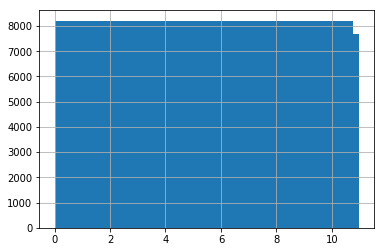

In [26]:
align_q(11).hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [29]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=407
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/407'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

In [34]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    train_pool=cat.Pool(Xtr,ytr,weight=Wtr)
    valid_pool=cat.Pool(Xte,yte)
    model = cat.CatBoostRegressor(iterations = 5000, thread_count = n_thread, **params)
    model.fit(train_pool,eval_set=valid_pool,use_best_model=True)
    make_sub(model,qno)
    a =  model.get_best_score()
    return a['validation_0']['MAE'], model.get_best_iteration()

In [35]:
params = {'objective':"MAE",
          'max_depth':8, 
          'learning_rate':0.03,
          'border_count':128,
          'l2_leaf_reg':2,
           "colsample_bylevel":0.7,
            'leaf_estimation_method':'Gradient',
          #'min_data_in_leaf' : 1,
          'metric_period' : 100,
          'early_stopping_rounds': 100,
          'eval_metric':'MAE',
            #'fold_len_multiplier':[1.05,1.5,2], 
            #'bagging_temperature':[1,0.75,0.5]
            #,'random_strength':[0.5,1,1.5],
           }

In [36]:
best_mae=1e10

In [37]:
def lgbcv(learning_rate, border_count,l2_leaf_reg,max_depth,
          colsample_bylevel, random_seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['border_count']=int(border_count)
    newparams['max_depth']=int(max_depth)
    #newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [38]:
best={'border_count': 105.38862817566795,
 'colsample_bylevel': 0.3109195724876211,
 'l2_leaf_reg': 0.3326080844078498,
 'learning_rate': 0.02140254888564618,
 'max_depth': 4.2620874566675875}
best

{'border_count': 105.38862817566795,
 'colsample_bylevel': 0.3109195724876211,
 'l2_leaf_reg': 0.3326080844078498,
 'learning_rate': 0.02140254888564618,
 'max_depth': 4.2620874566675875}

In [39]:
import time


In [40]:
while True:
    if os.path.exists("/mnt/done404"):
        break
    else:
        time.sleep(60) 

In [41]:
def objective(args):
    print args
    return lgbcv(**args)



In [42]:
scores={}
for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        print 'seed',randseed
        best['random_seed']=randseed
        a=lgbcv(**best)
        ascores.append(a)
    scores[targetno]=ascores

seed 6443626
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)


0:	learn: 5.6833311	test: 5.6832049	best: 5.6832049 (0)	total: 85.8ms	remaining: 7m 9s
100:	learn: 4.7660759	test: 4.7568039	best: 4.7568039 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.0606039	test: 4.0239973	best: 4.0239973 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 3.4605565	test: 3.3996268	best: 3.3996268 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.9303395	test: 2.8948240	best: 2.8948240 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4679554	test: 2.5259395	best: 2.5259395 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.0789546	test: 2.2111861	best: 2.2111861 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 1.7515321	test: 1.9375577	best: 1.9375577 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.4833126	test: 1.6927038	best: 1.6927038 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 1.2904568	test: 1.4881595	best: 1.4881595 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.1623164	test: 1.3402833	best: 1.3402833 (1000)	total: 33.3s	remaining: 2m 13s
110

0:	learn: 5.6829717	test: 5.6867878	best: 5.6867878 (0)	total: 38.6ms	remaining: 3m 13s
100:	learn: 4.7639765	test: 4.7872463	best: 4.7872463 (100)	total: 3.3s	remaining: 2m 40s
200:	learn: 4.0556879	test: 4.0858543	best: 4.0858543 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 3.4547092	test: 3.4948183	best: 3.4948183 (300)	total: 9.85s	remaining: 2m 33s
400:	learn: 2.9303831	test: 2.9857564	best: 2.9857564 (400)	total: 13.2s	remaining: 2m 30s
500:	learn: 2.4837564	test: 2.5888672	best: 2.5888672 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.0966336	test: 2.2603225	best: 2.2603225 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.7669557	test: 1.9780531	best: 1.9780531 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.4934161	test: 1.7337133	best: 1.7337133 (800)	total: 26.7s	remaining: 2m 19s
900:	learn: 1.2978322	test: 1.5397668	best: 1.5397668 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.1687473	test: 1.3959146	best: 1.3959146 (1000)	total: 33.1s	remaining: 2m 12s
1100:

0:	learn: 5.6834310	test: 5.6778469	best: 5.6778469 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 4.7649391	test: 4.7621859	best: 4.7621859 (100)	total: 3.3s	remaining: 2m 40s
200:	learn: 4.0553279	test: 4.0464289	best: 4.0464289 (200)	total: 6.65s	remaining: 2m 38s
300:	learn: 3.4537317	test: 3.4143059	best: 3.4143059 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.9314031	test: 2.8486376	best: 2.8486376 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4911913	test: 2.3647266	best: 2.3647266 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.1131502	test: 1.9338565	best: 1.9338565 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7897013	test: 1.5572435	best: 1.5572435 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5176085	test: 1.2439614	best: 1.2439614 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.3193890	test: 1.0422754	best: 1.0422754 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.1872112	test: 0.9300905	best: 0.9300905 (1000)	total: 33.8s	remaining: 2m 14s
1

0:	learn: 5.6830412	test: 5.6848530	best: 5.6848530 (0)	total: 37.8ms	remaining: 3m 9s
100:	learn: 4.7632605	test: 4.7782254	best: 4.7782254 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0532534	test: 4.0951470	best: 4.0951470 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 3.4464814	test: 3.5254437	best: 3.5254437 (300)	total: 9.82s	remaining: 2m 33s
400:	learn: 2.9190077	test: 3.0341370	best: 3.0341370 (400)	total: 13.2s	remaining: 2m 30s
500:	learn: 2.4779769	test: 2.6203503	best: 2.6203503 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.0998531	test: 2.2515859	best: 2.2515859 (600)	total: 19.8s	remaining: 2m 25s
700:	learn: 1.7823997	test: 1.9116462	best: 1.9116462 (700)	total: 23.2s	remaining: 2m 21s
800:	learn: 1.5178102	test: 1.6135525	best: 1.6135525 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.3249509	test: 1.3959241	best: 1.3959241 (900)	total: 29.9s	remaining: 2m 16s
1000:	learn: 1.1957281	test: 1.2406596	best: 1.2406596 (1000)	total: 33.2s	remaining: 2m 12s
1

0:	learn: 5.6834630	test: 5.6756386	best: 5.6756386 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 4.7643781	test: 4.7517789	best: 4.7517789 (100)	total: 3.3s	remaining: 2m 39s
200:	learn: 4.0539307	test: 4.0081592	best: 4.0081592 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 3.4501596	test: 3.3756736	best: 3.3756736 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 2.9267456	test: 2.8272934	best: 2.8272934 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4851092	test: 2.3624300	best: 2.3624300 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1059486	test: 1.9878649	best: 1.9878649 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7792224	test: 1.7405767	best: 1.7405767 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5047862	test: 1.5795345	best: 1.5795345 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3069669	test: 1.4944862	best: 1.4944862 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.1759194	test: 1.4319124	best: 1.4319124 (1000)	total: 33.7s	remaining: 2m 14s
1100:

0:	learn: 5.6835238	test: 5.6709517	best: 5.6709517 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 4.7645051	test: 4.7368183	best: 4.7368183 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.0542530	test: 4.0016345	best: 4.0016345 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 3.4505629	test: 3.4005245	best: 3.4005245 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.9275858	test: 2.8819503	best: 2.8819503 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4869155	test: 2.4368831	best: 2.4368831 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1084891	test: 2.0649263	best: 2.0649263 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7841684	test: 1.7584425	best: 1.7584425 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5103343	test: 1.5579225	best: 1.5579225 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3099443	test: 1.5013881	best: 1.5013881 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1776196	test: 1.4582579	best: 1.4582579 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 5.6827132	test: 5.6886087	best: 5.6886087 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.7637324	test: 4.7761000	best: 4.7761000 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 4.0563416	test: 4.0731968	best: 4.0731968 (200)	total: 6.48s	remaining: 2m 34s
300:	learn: 3.4562647	test: 3.4684302	best: 3.4684302 (300)	total: 9.69s	remaining: 2m 31s
400:	learn: 2.9365075	test: 2.9381147	best: 2.9381147 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.4963591	test: 2.4844649	best: 2.4844649 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.1111880	test: 2.1339404	best: 2.1339404 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 1.7690950	test: 1.9051442	best: 1.9051442 (700)	total: 22.7s	remaining: 2m 19s
800:	learn: 1.4894575	test: 1.7121087	best: 1.7121087 (800)	total: 26s	remaining: 2m 16s
900:	learn: 1.2930140	test: 1.5440121	best: 1.5440121 (900)	total: 29.3s	remaining: 2m 13s
1000:	learn: 1.1620991	test: 1.4345969	best: 1.4345969 (1000)	total: 32.5s	remaining: 2m 9s
1100:

0:	learn: 5.6834970	test: 5.6737086	best: 5.6737086 (0)	total: 39.5ms	remaining: 3m 17s
100:	learn: 4.7649411	test: 4.7389089	best: 4.7389089 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.0548083	test: 3.9807196	best: 3.9807196 (200)	total: 6.76s	remaining: 2m 41s
300:	learn: 3.4510622	test: 3.3369666	best: 3.3369666 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.9275150	test: 2.7760531	best: 2.7760531 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 2.4843403	test: 2.3469874	best: 2.3469874 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1033826	test: 2.0196827	best: 2.0196827 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.7772243	test: 1.7750399	best: 1.7750399 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.5026138	test: 1.6316386	best: 1.6316386 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3039715	test: 1.5609675	best: 1.5609675 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1725241	test: 1.5216757	best: 1.5216757 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6834101	test: 5.6791940	best: 5.6791940 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 4.7643213	test: 4.7577543	best: 4.7577543 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0533255	test: 4.0527752	best: 4.0527752 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 3.4511163	test: 3.4337750	best: 3.4337750 (300)	total: 9.82s	remaining: 2m 33s
400:	learn: 2.9298219	test: 2.8776184	best: 2.8776184 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.4902355	test: 2.3752128	best: 2.3752128 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.1133921	test: 1.9217240	best: 1.9217240 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.7898322	test: 1.5388115	best: 1.5388115 (700)	total: 23.5s	remaining: 2m 23s
800:	learn: 1.5178796	test: 1.2537353	best: 1.2537353 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3195310	test: 1.0804179	best: 1.0804179 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 1.1864809	test: 1.0063960	best: 1.0063960 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 5.6834402	test: 5.6825076	best: 5.6825076 (0)	total: 39.8ms	remaining: 3m 18s
100:	learn: 4.7650787	test: 4.7604504	best: 4.7604504 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.0526223	test: 4.0580585	best: 4.0580585 (200)	total: 6.6s	remaining: 2m 37s
300:	learn: 3.4473493	test: 3.4671656	best: 3.4671656 (300)	total: 9.93s	remaining: 2m 34s
400:	learn: 2.9265191	test: 2.9502922	best: 2.9502922 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4920803	test: 2.4860768	best: 2.4860768 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.1195316	test: 2.0787982	best: 2.0787982 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.8008705	test: 1.7232709	best: 1.7232709 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 1.5352799	test: 1.4228964	best: 1.4228964 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.3390814	test: 1.2122579	best: 1.2122579 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.2047871	test: 1.0938525	best: 1.0938525 (1000)	total: 33.5s	remaining: 2m 13s
110

0:	learn: 5.6835648	test: 5.6816441	best: 5.6816441 (0)	total: 39ms	remaining: 3m 14s
100:	learn: 4.7637323	test: 4.7623376	best: 4.7623376 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 4.0499742	test: 4.0688088	best: 4.0688088 (200)	total: 6.53s	remaining: 2m 36s
300:	learn: 3.4446506	test: 3.4811111	best: 3.4811111 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 2.9252186	test: 2.9652230	best: 2.9652230 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.4902673	test: 2.5143575	best: 2.5143575 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.1189210	test: 2.1086526	best: 2.1086526 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.8028438	test: 1.7433683	best: 1.7433683 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5377980	test: 1.4353071	best: 1.4353071 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.3436450	test: 1.2191629	best: 1.2191629 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2107921	test: 1.0848130	best: 1.0848130 (1000)	total: 33.5s	remaining: 2m 13s
11

0:	learn: 5.6834599	test: 5.6764741	best: 5.6764741 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 4.7641226	test: 4.7651458	best: 4.7651458 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0545501	test: 4.0214666	best: 4.0214666 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 3.4527873	test: 3.3660692	best: 3.3660692 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.9316793	test: 2.7997477	best: 2.7997477 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.4910356	test: 2.3064453	best: 2.3064453 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 2.1138263	test: 1.8634542	best: 1.8634542 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7885775	test: 1.5159566	best: 1.5159566 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5146588	test: 1.2874325	best: 1.2874325 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3161056	test: 1.1505695	best: 1.1505695 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.1841805	test: 1.0613974	best: 1.0613974 (1000)	total: 33.6s	remaining: 2m 14s


0:	learn: 5.6834473	test: 5.6768678	best: 5.6768678 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.7645034	test: 4.7511735	best: 4.7511735 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.0551198	test: 4.0194466	best: 4.0194466 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 3.4529220	test: 3.3892101	best: 3.3892101 (300)	total: 9.99s	remaining: 2m 35s
400:	learn: 2.9308230	test: 2.8432165	best: 2.8432165 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4903255	test: 2.3641461	best: 2.3641461 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.1127358	test: 1.9260281	best: 1.9260281 (600)	total: 20.4s	remaining: 2m 28s
700:	learn: 1.7891165	test: 1.5471000	best: 1.5471000 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5136158	test: 1.3296613	best: 1.3296613 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.3116204	test: 1.2469065	best: 1.2469065 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1781202	test: 1.2234656	best: 1.2234656 (1000)	total: 33.8s	remaining: 2m 14s


0:	learn: 5.6829028	test: 5.6873087	best: 5.6873087 (0)	total: 36.9ms	remaining: 3m 4s
100:	learn: 4.7616912	test: 4.7819050	best: 4.7819050 (100)	total: 3.18s	remaining: 2m 34s
200:	learn: 4.0475282	test: 4.1265056	best: 4.1265056 (200)	total: 6.4s	remaining: 2m 32s
300:	learn: 3.4392939	test: 3.5815490	best: 3.5815490 (300)	total: 9.65s	remaining: 2m 30s
400:	learn: 2.9174704	test: 3.1136578	best: 3.1136578 (400)	total: 12.9s	remaining: 2m 28s
500:	learn: 2.4750079	test: 2.6942769	best: 2.6942769 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.0929625	test: 2.3415411	best: 2.3415411 (600)	total: 19.5s	remaining: 2m 23s
700:	learn: 1.7661479	test: 2.0404554	best: 2.0404554 (700)	total: 22.8s	remaining: 2m 19s
800:	learn: 1.4924080	test: 1.7890449	best: 1.7890449 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.2936103	test: 1.6038621	best: 1.6038621 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.1597203	test: 1.4824469	best: 1.4824469 (1000)	total: 32.8s	remaining: 2m 11s
11

0:	learn: 5.6834145	test: 5.6789200	best: 5.6789200 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.7639975	test: 4.7660972	best: 4.7660972 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 4.0525423	test: 4.0657154	best: 4.0657154 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 3.4472773	test: 3.5048930	best: 3.5048930 (300)	total: 9.99s	remaining: 2m 36s
400:	learn: 2.9236655	test: 2.9956534	best: 2.9956534 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4840165	test: 2.5285411	best: 2.5285411 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1060097	test: 2.1476159	best: 2.1476159 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7810107	test: 1.8521849	best: 1.8521849 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5089899	test: 1.6113618	best: 1.6113618 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.3117973	test: 1.4362094	best: 1.4362094 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1812936	test: 1.2932594	best: 1.2932594 (1000)	total: 33.7s	remaining: 2m 14s


0:	learn: 5.6833311	test: 5.6832049	best: 5.6832049 (0)	total: 39.8ms	remaining: 3m 19s
100:	learn: 4.7660500	test: 4.7570271	best: 4.7570271 (100)	total: 3.54s	remaining: 2m 51s
200:	learn: 4.0599940	test: 4.0218535	best: 4.0218535 (200)	total: 6.8s	remaining: 2m 42s
300:	learn: 3.4594986	test: 3.3978012	best: 3.3978012 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.9291364	test: 2.8935377	best: 2.8935377 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 2.4665603	test: 2.5275325	best: 2.5275325 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.0785420	test: 2.2128775	best: 2.2128775 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.7516622	test: 1.9389625	best: 1.9389625 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.4834432	test: 1.6911720	best: 1.6911720 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.2901396	test: 1.4866425	best: 1.4866425 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.1616293	test: 1.3391542	best: 1.3391542 (1000)	total: 33.5s	remaining: 2m 14s
1

0:	learn: 5.6829716	test: 5.6867878	best: 5.6867878 (0)	total: 38.6ms	remaining: 3m 12s
100:	learn: 4.7631707	test: 4.7851016	best: 4.7851016 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 4.0553929	test: 4.0870132	best: 4.0870132 (200)	total: 6.49s	remaining: 2m 35s
300:	learn: 3.4541953	test: 3.4957012	best: 3.4957012 (300)	total: 9.96s	remaining: 2m 35s
400:	learn: 2.9301365	test: 2.9875897	best: 2.9875897 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.4839959	test: 2.5891362	best: 2.5891362 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.0975505	test: 2.2620572	best: 2.2620572 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 1.7680416	test: 1.9789120	best: 1.9789120 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.4944952	test: 1.7359315	best: 1.7359315 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.2985966	test: 1.5397712	best: 1.5397712 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 1.1684141	test: 1.3952016	best: 1.3952016 (1000)	total: 33s	remaining: 2m 11s
11

0:	learn: 5.6834310	test: 5.6778468	best: 5.6778468 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 4.7642975	test: 4.7618444	best: 4.7618444 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.0544633	test: 4.0459707	best: 4.0459707 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 3.4530120	test: 3.4138291	best: 3.4138291 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.9312539	test: 2.8512370	best: 2.8512370 (400)	total: 13.3s	remaining: 2m 33s
500:	learn: 2.4910431	test: 2.3662851	best: 2.3662851 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 2.1129300	test: 1.9358052	best: 1.9358052 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7894791	test: 1.5561878	best: 1.5561878 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5180002	test: 1.2457582	best: 1.2457582 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.3204494	test: 1.0445860	best: 1.0445860 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.1881455	test: 0.9343027	best: 0.9343027 (1000)	total: 33.7s	remaining: 2m 14s


0:	learn: 5.6830413	test: 5.6848536	best: 5.6848536 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 4.7624327	test: 4.7784527	best: 4.7784527 (100)	total: 3.21s	remaining: 2m 35s
200:	learn: 4.0519054	test: 4.0934511	best: 4.0934511 (200)	total: 6.43s	remaining: 2m 33s
300:	learn: 3.4455357	test: 3.5242071	best: 3.5242071 (300)	total: 9.69s	remaining: 2m 31s
400:	learn: 2.9185076	test: 3.0340692	best: 3.0340692 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.4770639	test: 2.6192108	best: 2.6192108 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 2.0991724	test: 2.2508252	best: 2.2508252 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 1.7823207	test: 1.9115906	best: 1.9115906 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.5181075	test: 1.6145381	best: 1.6145381 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.3256459	test: 1.3967831	best: 1.3967831 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.1961438	test: 1.2440546	best: 1.2440546 (1000)	total: 32.9s	remaining: 2m 11s
11

0:	learn: 5.6834630	test: 5.6756386	best: 5.6756386 (0)	total: 39.6ms	remaining: 3m 17s
100:	learn: 4.7644340	test: 4.7510727	best: 4.7510727 (100)	total: 3.38s	remaining: 2m 44s
200:	learn: 4.0537059	test: 4.0075904	best: 4.0075904 (200)	total: 6.74s	remaining: 2m 40s
300:	learn: 3.4500536	test: 3.3756461	best: 3.3756461 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.9277335	test: 2.8304421	best: 2.8304421 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4864184	test: 2.3644313	best: 2.3644313 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1075490	test: 1.9889439	best: 1.9889439 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7802489	test: 1.7426533	best: 1.7426533 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5058427	test: 1.5791492	best: 1.5791492 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.3075298	test: 1.4916077	best: 1.4916077 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1760886	test: 1.4316644	best: 1.4316644 (1000)	total: 34.1s	remaining: 2m 16s


0:	learn: 5.6835238	test: 5.6709517	best: 5.6709517 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 4.7644076	test: 4.7362609	best: 4.7362609 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.0533780	test: 3.9994192	best: 3.9994192 (200)	total: 6.83s	remaining: 2m 43s
300:	learn: 3.4489814	test: 3.4011663	best: 3.4011663 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.9250800	test: 2.8810764	best: 2.8810764 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.4839829	test: 2.4361336	best: 2.4361336 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1061138	test: 2.0629962	best: 2.0629962 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.7818507	test: 1.7543334	best: 1.7543334 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.5082672	test: 1.5533051	best: 1.5533051 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3082600	test: 1.4991807	best: 1.4991807 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1764164	test: 1.4578917	best: 1.4578917 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6827132	test: 5.6886088	best: 5.6886088 (0)	total: 37.7ms	remaining: 3m 8s
100:	learn: 4.7639613	test: 4.7772927	best: 4.7772927 (100)	total: 3.22s	remaining: 2m 36s
200:	learn: 4.0565129	test: 4.0739568	best: 4.0739568 (200)	total: 6.44s	remaining: 2m 33s
300:	learn: 3.4569399	test: 3.4691955	best: 3.4691955 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 2.9372567	test: 2.9405821	best: 2.9405821 (400)	total: 12.9s	remaining: 2m 27s
500:	learn: 2.4974741	test: 2.4869583	best: 2.4869583 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.1115688	test: 2.1358399	best: 2.1358399 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 1.7691391	test: 1.9062561	best: 1.9062561 (700)	total: 22.8s	remaining: 2m 19s
800:	learn: 1.4885976	test: 1.7130833	best: 1.7130833 (800)	total: 26s	remaining: 2m 16s
900:	learn: 1.2918002	test: 1.5437155	best: 1.5437155 (900)	total: 29.2s	remaining: 2m 12s
1000:	learn: 1.1610967	test: 1.4355103	best: 1.4355103 (1000)	total: 32.4s	remaining: 2m 9s
1100

0:	learn: 5.6834970	test: 5.6737085	best: 5.6737085 (0)	total: 38.2ms	remaining: 3m 11s
100:	learn: 4.7641292	test: 4.7372086	best: 4.7372086 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 4.0541719	test: 3.9787781	best: 3.9787781 (200)	total: 6.73s	remaining: 2m 40s
300:	learn: 3.4504831	test: 3.3339280	best: 3.3339280 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.9265027	test: 2.7745065	best: 2.7745065 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4839036	test: 2.3476238	best: 2.3476238 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1033376	test: 2.0176053	best: 2.0176053 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7769518	test: 1.7730518	best: 1.7730518 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5023107	test: 1.6285078	best: 1.6285078 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3036023	test: 1.5569868	best: 1.5569868 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.1719728	test: 1.5199567	best: 1.5199567 (1000)	total: 34.1s	remaining: 2m 16s


0:	learn: 5.6834101	test: 5.6791940	best: 5.6791940 (0)	total: 37.3ms	remaining: 3m 6s
100:	learn: 4.7646065	test: 4.7594737	best: 4.7594737 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.0537263	test: 4.0537310	best: 4.0537310 (200)	total: 6.85s	remaining: 2m 43s
300:	learn: 3.4508962	test: 3.4347274	best: 3.4347274 (300)	total: 10.2s	remaining: 2m 38s
400:	learn: 2.9302372	test: 2.8780469	best: 2.8780469 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4912095	test: 2.3763105	best: 2.3763105 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.1141567	test: 1.9205829	best: 1.9205829 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.7907125	test: 1.5378921	best: 1.5378921 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5179237	test: 1.2537778	best: 1.2537778 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3190551	test: 1.0797132	best: 1.0797132 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.1858194	test: 1.0055661	best: 1.0055661 (1000)	total: 33.6s	remaining: 2m 14s
1

0:	learn: 5.6834402	test: 5.6825076	best: 5.6825076 (0)	total: 37.8ms	remaining: 3m 8s
100:	learn: 4.7648208	test: 4.7605126	best: 4.7605126 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0521084	test: 4.0585471	best: 4.0585471 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 3.4472326	test: 3.4677512	best: 3.4677512 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.9248959	test: 2.9486062	best: 2.9486062 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.4907629	test: 2.4860724	best: 2.4860724 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1186263	test: 2.0772724	best: 2.0772724 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.8004992	test: 1.7233369	best: 1.7233369 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5353026	test: 1.4228085	best: 1.4228085 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3392904	test: 1.2122713	best: 1.2122713 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2048562	test: 1.0958989	best: 1.0958989 (1000)	total: 33.6s	remaining: 2m 14s
1100:

0:	learn: 5.6835648	test: 5.6816441	best: 5.6816441 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 4.7639550	test: 4.7629906	best: 4.7629906 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0496236	test: 4.0683780	best: 4.0683780 (200)	total: 6.75s	remaining: 2m 41s
300:	learn: 3.4442569	test: 3.4824968	best: 3.4824968 (300)	total: 10.2s	remaining: 2m 38s
400:	learn: 2.9239808	test: 2.9662232	best: 2.9662232 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4890448	test: 2.5145710	best: 2.5145710 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 2.1182951	test: 2.1108868	best: 2.1108868 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.8027821	test: 1.7480385	best: 1.7480385 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5378367	test: 1.4387205	best: 1.4387205 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3432080	test: 1.2215062	best: 1.2215062 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 1.2108256	test: 1.0865881	best: 1.0865881 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 5.6834599	test: 5.6764742	best: 5.6764742 (0)	total: 41.6ms	remaining: 3m 27s
100:	learn: 4.7639149	test: 4.7635128	best: 4.7635128 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.0536540	test: 4.0168431	best: 4.0168431 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 3.4514705	test: 3.3622871	best: 3.3622871 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.9293442	test: 2.7974656	best: 2.7974656 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4889853	test: 2.3058707	best: 2.3058707 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.1122132	test: 1.8637611	best: 1.8637611 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.7876962	test: 1.5172492	best: 1.5172492 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5139736	test: 1.2888924	best: 1.2888924 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3154275	test: 1.1496998	best: 1.1496998 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.1836299	test: 1.0619123	best: 1.0619123 (1000)	total: 33.6s	remaining: 2m 14s
1100:

0:	learn: 5.6834473	test: 5.6768678	best: 5.6768678 (0)	total: 39.4ms	remaining: 3m 16s
100:	learn: 4.7651162	test: 4.7525723	best: 4.7525723 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.0555328	test: 4.0200279	best: 4.0200279 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 3.4529181	test: 3.3900366	best: 3.3900366 (300)	total: 10.2s	remaining: 2m 38s
400:	learn: 2.9307380	test: 2.8433119	best: 2.8433119 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 2.4903355	test: 2.3656452	best: 2.3656452 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 2.1134507	test: 1.9285552	best: 1.9285552 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 1.7900423	test: 1.5478510	best: 1.5478510 (700)	total: 24s	remaining: 2m 27s
800:	learn: 1.5143725	test: 1.3282900	best: 1.3282900 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 1.3124662	test: 1.2452432	best: 1.2452432 (900)	total: 30.8s	remaining: 2m 19s
1000:	learn: 1.1789775	test: 1.2210631	best: 1.2210631 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 5.6829028	test: 5.6873087	best: 5.6873087 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 4.7623340	test: 4.7824299	best: 4.7824299 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.0486008	test: 4.1233064	best: 4.1233064 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 3.4402615	test: 3.5825444	best: 3.5825444 (300)	total: 9.7s	remaining: 2m 31s
400:	learn: 2.9174719	test: 3.1136282	best: 3.1136282 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.4748303	test: 2.6949861	best: 2.6949861 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 2.0929837	test: 2.3417103	best: 2.3417103 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 1.7663616	test: 2.0416187	best: 2.0416187 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.4927670	test: 1.7901869	best: 1.7901869 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.2932610	test: 1.6043690	best: 1.6043690 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.1595047	test: 1.4835961	best: 1.4835961 (1000)	total: 32.7s	remaining: 2m 10s
1100

0:	learn: 5.6834146	test: 5.6789201	best: 5.6789201 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 4.7644137	test: 4.7675708	best: 4.7675708 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0533542	test: 4.0640908	best: 4.0640908 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 3.4490928	test: 3.4981468	best: 3.4981468 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 2.9264390	test: 2.9909254	best: 2.9909254 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4855535	test: 2.5284845	best: 2.5284845 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.1076367	test: 2.1389573	best: 2.1389573 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 1.7824570	test: 1.8436956	best: 1.8436956 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5099617	test: 1.6017769	best: 1.6017769 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3127886	test: 1.4241554	best: 1.4241554 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.1820665	test: 1.2826807	best: 1.2826807 (1000)	total: 33.7s	remaining: 2m 14s
110

0:	learn: 6.2890772	test: 6.2889376	best: 6.2889376 (0)	total: 37.8ms	remaining: 3m 8s
100:	learn: 5.3587623	test: 5.3501541	best: 5.3501541 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.6325817	test: 4.5955870	best: 4.5955870 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 4.0106417	test: 3.9464559	best: 3.9464559 (300)	total: 9.99s	remaining: 2m 36s
400:	learn: 3.4589704	test: 3.3983331	best: 3.3983331 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9652589	test: 2.9782543	best: 2.9782543 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.5367771	test: 2.6417272	best: 2.6417272 (600)	total: 20s	remaining: 2m 26s
700:	learn: 2.1725306	test: 2.3420473	best: 2.3420473 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.8600683	test: 2.0760706	best: 2.0760706 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.6058922	test: 1.8349596	best: 1.8349596 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.4203222	test: 1.6343124	best: 1.6343124 (1000)	total: 33.7s	remaining: 2m 14s
110

0:	learn: 6.2886795	test: 6.2929031	best: 6.2929031 (0)	total: 38.8ms	remaining: 3m 13s
100:	learn: 5.3557811	test: 5.3800054	best: 5.3800054 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 4.6276566	test: 4.6633746	best: 4.6633746 (200)	total: 6.45s	remaining: 2m 33s
300:	learn: 4.0051353	test: 4.0589608	best: 4.0589608 (300)	total: 9.7s	remaining: 2m 31s
400:	learn: 3.4570288	test: 3.5159111	best: 3.5159111 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.9772539	test: 3.0665022	best: 3.0665022 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 2.5591157	test: 2.7075740	best: 2.7075740 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 2.1942220	test: 2.3984803	best: 2.3984803 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.8778700	test: 2.1239094	best: 2.1239094 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.6173158	test: 1.8857380	best: 1.8857380 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.4282868	test: 1.6961641	best: 1.6961641 (1000)	total: 33.1s	remaining: 2m 12s
110

0:	learn: 6.2891877	test: 6.2830095	best: 6.2830095 (0)	total: 39.5ms	remaining: 3m 17s
100:	learn: 5.3574123	test: 5.3551696	best: 5.3551696 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 4.6273379	test: 4.6219964	best: 4.6219964 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 4.0029973	test: 3.9734601	best: 3.9734601 (300)	total: 10s	remaining: 2m 36s
400:	learn: 3.4562027	test: 3.3835521	best: 3.3835521 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9810549	test: 2.8685024	best: 2.8685024 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.5706199	test: 2.4065801	best: 2.4065801 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.2139278	test: 1.9946206	best: 1.9946206 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.9026371	test: 1.6338694	best: 1.6338694 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 1.6434177	test: 1.3375613	best: 1.3375613 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.4528105	test: 1.1479293	best: 1.1479293 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 6.2887565	test: 6.2907612	best: 6.2907612 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 5.3556491	test: 5.3686067	best: 5.3686067 (100)	total: 3.43s	remaining: 2m 46s
200:	learn: 4.6243883	test: 4.6629709	best: 4.6629709 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 3.9963239	test: 4.0721351	best: 4.0721351 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 3.4430780	test: 3.5590302	best: 3.5590302 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.9646157	test: 3.1098522	best: 3.1098522 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 2.5542100	test: 2.7205007	best: 2.7205007 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 2.2009301	test: 2.3618225	best: 2.3618225 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 1.8970517	test: 2.0312878	best: 2.0312878 (800)	total: 26.5s	remaining: 2m 19s
900:	learn: 1.6450588	test: 1.7449280	best: 1.7449280 (900)	total: 29.9s	remaining: 2m 15s
1000:	learn: 1.4586515	test: 1.5339354	best: 1.5339354 (1000)	total: 33.2s	remaining: 2m 12s
1

0:	learn: 6.2892231	test: 6.2805666	best: 6.2805666 (0)	total: 37.3ms	remaining: 3m 6s
100:	learn: 5.3570624	test: 5.3456493	best: 5.3456493 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 4.6268080	test: 4.5831226	best: 4.5831226 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 4.0016622	test: 3.9245197	best: 3.9245197 (300)	total: 9.96s	remaining: 2m 35s
400:	learn: 3.4526393	test: 3.3530209	best: 3.3530209 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9755466	test: 2.8499277	best: 2.8499277 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.5642778	test: 2.4244905	best: 2.4244905 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.2058158	test: 2.0984634	best: 2.0984634 (700)	total: 23.6s	remaining: 2m 25s
800:	learn: 1.8911809	test: 1.8756389	best: 1.8756389 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.6292474	test: 1.7308694	best: 1.7308694 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.4378104	test: 1.6491370	best: 1.6491370 (1000)	total: 34s	remaining: 2m 15s
110

0:	learn: 6.2892904	test: 6.2753809	best: 6.2753809 (0)	total: 39.6ms	remaining: 3m 18s
100:	learn: 5.3575507	test: 5.3299921	best: 5.3299921 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6270967	test: 4.5733228	best: 4.5733228 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 4.0009572	test: 3.9437004	best: 3.9437004 (300)	total: 9.95s	remaining: 2m 35s
400:	learn: 3.4522269	test: 3.4025638	best: 3.4025638 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9756802	test: 2.9207635	best: 2.9207635 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.5654905	test: 2.5087690	best: 2.5087690 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 2.2084356	test: 2.1559873	best: 2.1559873 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.8963046	test: 1.8738173	best: 1.8738173 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 1.6343156	test: 1.7025710	best: 1.7025710 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.4406082	test: 1.6525937	best: 1.6525937 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 6.2883934	test: 6.2949163	best: 6.2949163 (0)	total: 36.1ms	remaining: 3m
100:	learn: 5.3572464	test: 5.3702733	best: 5.3702733 (100)	total: 3.38s	remaining: 2m 44s
200:	learn: 4.6300690	test: 4.6520060	best: 4.6520060 (200)	total: 6.65s	remaining: 2m 38s
300:	learn: 4.0085824	test: 4.0237294	best: 4.0237294 (300)	total: 9.91s	remaining: 2m 34s
400:	learn: 3.4653460	test: 3.4712871	best: 3.4712871 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.9899765	test: 2.9832403	best: 2.9832403 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 2.5777909	test: 2.5669951	best: 2.5669951 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 2.2068882	test: 2.2683615	best: 2.2683615 (700)	total: 23s	remaining: 2m 21s
800:	learn: 1.8783339	test: 2.0534295	best: 2.0534295 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.6126563	test: 1.8632426	best: 1.8632426 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.4232461	test: 1.7000203	best: 1.7000203 (1000)	total: 32.8s	remaining: 2m 11s
1100:	

0:	learn: 6.2892607	test: 6.2784308	best: 6.2784308 (0)	total: 40.7ms	remaining: 3m 23s
100:	learn: 5.3572976	test: 5.3349822	best: 5.3349822 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.6275256	test: 4.5534021	best: 4.5534021 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 4.0014730	test: 3.8929521	best: 3.8929521 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4531565	test: 3.2973764	best: 3.2973764 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.9751921	test: 2.8139854	best: 2.8139854 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 2.5623480	test: 2.4307502	best: 2.4307502 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2025385	test: 2.1362939	best: 2.1362939 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.8882062	test: 1.9170582	best: 1.9170582 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.6260287	test: 1.7903042	best: 1.7903042 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.4341913	test: 1.7248256	best: 1.7248256 (1000)	total: 34.1s	remaining: 2m 16s
1

0:	learn: 6.2891646	test: 6.2844999	best: 6.2844999 (0)	total: 38.6ms	remaining: 3m 12s
100:	learn: 5.3575633	test: 5.3502725	best: 5.3502725 (100)	total: 3.32s	remaining: 2m 40s
200:	learn: 4.6272238	test: 4.6255387	best: 4.6255387 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 4.0020956	test: 3.9942192	best: 3.9942192 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 3.4559922	test: 3.4170613	best: 3.4170613 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9806443	test: 2.8903509	best: 2.8903509 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.5714383	test: 2.4093467	best: 2.4093467 (600)	total: 20s	remaining: 2m 26s
700:	learn: 2.2150963	test: 1.9754569	best: 1.9754569 (700)	total: 23.3s	remaining: 2m 23s
800:	learn: 1.9042397	test: 1.6150199	best: 1.6150199 (800)	total: 26.7s	remaining: 2m 19s
900:	learn: 1.6436870	test: 1.3506512	best: 1.3506512 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.4517192	test: 1.1888960	best: 1.1888960 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 6.2891978	test: 6.2881660	best: 6.2881660 (0)	total: 37.5ms	remaining: 3m 7s
100:	learn: 5.3577568	test: 5.3526320	best: 5.3526320 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6260483	test: 4.6288910	best: 4.6288910 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 3.9987222	test: 4.0137410	best: 4.0137410 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 3.4497793	test: 3.4764434	best: 3.4764434 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9779493	test: 2.9874737	best: 2.9874737 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.5756205	test: 2.5496590	best: 2.5496590 (600)	total: 20s	remaining: 2m 26s
700:	learn: 2.2239707	test: 2.1631222	best: 2.1631222 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.9182262	test: 1.8209899	best: 1.8209899 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 1.6646210	test: 1.5320975	best: 1.5320975 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 1.4743892	test: 1.3325292	best: 1.3325292 (1000)	total: 33.5s	remaining: 2m 13s
110

0:	learn: 6.2893357	test: 6.2872107	best: 6.2872107 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 5.3569299	test: 5.3540020	best: 5.3540020 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6223338	test: 4.6386956	best: 4.6386956 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 3.9945799	test: 4.0328905	best: 4.0328905 (300)	total: 9.9s	remaining: 2m 34s
400:	learn: 3.4488812	test: 3.4953377	best: 3.4953377 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9763971	test: 3.0173517	best: 3.0173517 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.5725994	test: 2.5902820	best: 2.5902820 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.2232872	test: 2.1987658	best: 2.1987658 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.9198582	test: 1.8468890	best: 1.8468890 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.6664435	test: 1.5523342	best: 1.5523342 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.4784507	test: 1.3444545	best: 1.3444545 (1000)	total: 33.7s	remaining: 2m 14s
110

0:	learn: 6.2892196	test: 6.2814905	best: 6.2814905 (0)	total: 37.5ms	remaining: 3m 7s
100:	learn: 5.3568860	test: 5.3569793	best: 5.3569793 (100)	total: 3.4s	remaining: 2m 44s
200:	learn: 4.6269922	test: 4.5994528	best: 4.5994528 (200)	total: 6.85s	remaining: 2m 43s
300:	learn: 4.0020802	test: 3.9226569	best: 3.9226569 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 3.4557179	test: 3.3277143	best: 3.3277143 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.9800482	test: 2.8060008	best: 2.8060008 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.5699068	test: 2.3366420	best: 2.3366420 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2129723	test: 1.9280954	best: 1.9280954 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9004802	test: 1.6111197	best: 1.6111197 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.6388970	test: 1.4011389	best: 1.4011389 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4477997	test: 1.2699547	best: 1.2699547 (1000)	total: 33.8s	remaining: 2m 15s
1100

0:	learn: 6.2892057	test: 6.2819264	best: 6.2819264 (0)	total: 39.5ms	remaining: 3m 17s
100:	learn: 5.3566690	test: 5.3434055	best: 5.3434055 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.6264263	test: 4.5910053	best: 4.5910053 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 4.0006692	test: 3.9383751	best: 3.9383751 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4542863	test: 3.3666626	best: 3.3666626 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.9785948	test: 2.8607991	best: 2.8607991 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.5685721	test: 2.4045069	best: 2.4045069 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 2.2126227	test: 1.9787481	best: 1.9787481 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.9006911	test: 1.6359369	best: 1.6359369 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.6370637	test: 1.4481888	best: 1.4481888 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.4420666	test: 1.3755134	best: 1.3755134 (1000)	total: 33.4s	remaining: 2m 13s


0:	learn: 6.2886033	test: 6.2934780	best: 6.2934780 (0)	total: 38.7ms	remaining: 3m 13s
100:	learn: 5.3544883	test: 5.3729796	best: 5.3729796 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 4.6204125	test: 4.6935420	best: 4.6935420 (200)	total: 6.43s	remaining: 2m 33s
300:	learn: 3.9912202	test: 4.1228194	best: 4.1228194 (300)	total: 9.7s	remaining: 2m 31s
400:	learn: 3.4423804	test: 3.6360994	best: 3.6360994 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.9654713	test: 3.1901803	best: 3.1901803 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 2.5514360	test: 2.8004377	best: 2.8004377 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 2.1904194	test: 2.4703102	best: 2.4703102 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.8761737	test: 2.1834313	best: 2.1834313 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.6146930	test: 1.9423830	best: 1.9423830 (900)	total: 29.7s	remaining: 2m 14s
1000:	learn: 1.4221719	test: 1.7630717	best: 1.7630717 (1000)	total: 32.9s	remaining: 2m 11s
110

0:	learn: 6.2891695	test: 6.2841968	best: 6.2841968 (0)	total: 40ms	remaining: 3m 19s
100:	learn: 5.3572724	test: 5.3614371	best: 5.3614371 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.6264486	test: 4.6339145	best: 4.6339145 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 3.9993290	test: 4.0421826	best: 4.0421826 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 3.4491303	test: 3.5237390	best: 3.5237390 (400)	total: 13.8s	remaining: 2m 38s
500:	learn: 2.9731148	test: 3.0338721	best: 3.0338721 (500)	total: 17.3s	remaining: 2m 35s
600:	learn: 2.5627057	test: 2.6043238	best: 2.6043238 (600)	total: 21s	remaining: 2m 33s
700:	learn: 2.2047817	test: 2.2667986	best: 2.2667986 (700)	total: 24.7s	remaining: 2m 31s
800:	learn: 1.8920051	test: 1.9860232	best: 1.9860232 (800)	total: 28.1s	remaining: 2m 27s
900:	learn: 1.6322825	test: 1.7585418	best: 1.7585418 (900)	total: 31.4s	remaining: 2m 22s
1000:	learn: 1.4419263	test: 1.5794023	best: 1.5794023 (1000)	total: 34.8s	remaining: 2m 18s
1100

0:	learn: 6.2890772	test: 6.2889376	best: 6.2889376 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 5.3588751	test: 5.3502447	best: 5.3502447 (100)	total: 3.17s	remaining: 2m 33s
200:	learn: 4.6325449	test: 4.5964164	best: 4.5964164 (200)	total: 6.4s	remaining: 2m 32s
300:	learn: 4.0103332	test: 3.9475170	best: 3.9475170 (300)	total: 9.66s	remaining: 2m 30s
400:	learn: 3.4583077	test: 3.4009403	best: 3.4009403 (400)	total: 12.9s	remaining: 2m 28s
500:	learn: 2.9649878	test: 2.9799301	best: 2.9799301 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.5364394	test: 2.6425041	best: 2.6425041 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 2.1729400	test: 2.3409468	best: 2.3409468 (700)	total: 23s	remaining: 2m 21s
800:	learn: 1.8596495	test: 2.0766279	best: 2.0766279 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.6051659	test: 1.8360863	best: 1.8360863 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 1.4199697	test: 1.6373283	best: 1.6373283 (1000)	total: 33.1s	remaining: 2m 12s
110

0:	learn: 6.2886794	test: 6.2929046	best: 6.2929046 (0)	total: 38.2ms	remaining: 3m 11s
100:	learn: 5.3558098	test: 5.3738868	best: 5.3738868 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.6276734	test: 4.6542854	best: 4.6542854 (200)	total: 6.53s	remaining: 2m 35s
300:	learn: 4.0052929	test: 4.0411865	best: 4.0411865 (300)	total: 9.81s	remaining: 2m 33s
400:	learn: 3.4580808	test: 3.5044990	best: 3.5044990 (400)	total: 13s	remaining: 2m 29s
500:	learn: 2.9775473	test: 3.0607688	best: 3.0607688 (500)	total: 16.4s	remaining: 2m 26s
600:	learn: 2.5594543	test: 2.7021475	best: 2.7021475 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 2.1949722	test: 2.3947575	best: 2.3947575 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.8790264	test: 2.1225984	best: 2.1225984 (800)	total: 26.6s	remaining: 2m 19s
900:	learn: 1.6187551	test: 1.8851944	best: 1.8851944 (900)	total: 29.9s	remaining: 2m 15s
1000:	learn: 1.4300345	test: 1.6966596	best: 1.6966596 (1000)	total: 33.2s	remaining: 2m 12s
11

0:	learn: 6.2891877	test: 6.2830096	best: 6.2830096 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 5.3572308	test: 5.3547320	best: 5.3547320 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.6273179	test: 4.6203686	best: 4.6203686 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 4.0034949	test: 3.9728864	best: 3.9728864 (300)	total: 9.85s	remaining: 2m 33s
400:	learn: 3.4568561	test: 3.3830508	best: 3.3830508 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.9822094	test: 2.8682943	best: 2.8682943 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.5726316	test: 2.4100338	best: 2.4100338 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2157484	test: 1.9967298	best: 1.9967298 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9043654	test: 1.6359136	best: 1.6359136 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.6448076	test: 1.3400000	best: 1.3400000 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4535667	test: 1.1502772	best: 1.1502772 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 6.2887564	test: 6.2907610	best: 6.2907610 (0)	total: 36.9ms	remaining: 3m 4s
100:	learn: 5.3555747	test: 5.3696463	best: 5.3696463 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 4.6254460	test: 4.6643730	best: 4.6643730 (200)	total: 6.51s	remaining: 2m 35s
300:	learn: 3.9972392	test: 4.0724489	best: 4.0724489 (300)	total: 9.75s	remaining: 2m 32s
400:	learn: 3.4442838	test: 3.5579685	best: 3.5579685 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 2.9651500	test: 3.1097134	best: 3.1097134 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.5546595	test: 2.7228948	best: 2.7228948 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 2.2011985	test: 2.3663133	best: 2.3663133 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 1.8974046	test: 2.0338985	best: 2.0338985 (800)	total: 26.6s	remaining: 2m 19s
900:	learn: 1.6450130	test: 1.7489380	best: 1.7489380 (900)	total: 29.9s	remaining: 2m 16s
1000:	learn: 1.4586482	test: 1.5382948	best: 1.5382948 (1000)	total: 33.3s	remaining: 2m 12s
1

0:	learn: 6.2892231	test: 6.2805666	best: 6.2805666 (0)	total: 40.8ms	remaining: 3m 24s
100:	learn: 5.3568528	test: 5.3455916	best: 5.3455916 (100)	total: 3.38s	remaining: 2m 44s
200:	learn: 4.6264261	test: 4.5824898	best: 4.5824898 (200)	total: 6.74s	remaining: 2m 40s
300:	learn: 4.0011141	test: 3.9247681	best: 3.9247681 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 3.4526455	test: 3.3543748	best: 3.3543748 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 2.9760854	test: 2.8489655	best: 2.8489655 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.5647695	test: 2.4214812	best: 2.4214812 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 2.2060314	test: 2.0947314	best: 2.0947314 (700)	total: 24s	remaining: 2m 27s
800:	learn: 1.8914890	test: 1.8729184	best: 1.8729184 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 1.6295793	test: 1.7248519	best: 1.7248519 (900)	total: 30.8s	remaining: 2m 19s
1000:	learn: 1.4381749	test: 1.6432218	best: 1.6432218 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 6.2892903	test: 6.2753808	best: 6.2753808 (0)	total: 37.8ms	remaining: 3m 8s
100:	learn: 5.3576537	test: 5.3304327	best: 5.3304327 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.6265876	test: 4.5716941	best: 4.5716941 (200)	total: 6.58s	remaining: 2m 37s
300:	learn: 4.0004729	test: 3.9428055	best: 3.9428055 (300)	total: 9.93s	remaining: 2m 34s
400:	learn: 3.4507181	test: 3.4010306	best: 3.4010306 (400)	total: 13.3s	remaining: 2m 33s
500:	learn: 2.9731264	test: 2.9193069	best: 2.9193069 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.5634273	test: 2.5095231	best: 2.5095231 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2063860	test: 2.1560457	best: 2.1560457 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.8938504	test: 1.8693706	best: 1.8693706 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.6324800	test: 1.7007696	best: 1.7007696 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.4399809	test: 1.6523833	best: 1.6523833 (1000)	total: 33.6s	remaining: 2m 14s
1

0:	learn: 6.2883934	test: 6.2949163	best: 6.2949163 (0)	total: 37.1ms	remaining: 3m 5s
100:	learn: 5.3567175	test: 5.3690371	best: 5.3690371 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 4.6292974	test: 4.6493199	best: 4.6493199 (200)	total: 6.41s	remaining: 2m 33s
300:	learn: 4.0074146	test: 4.0210840	best: 4.0210840 (300)	total: 9.67s	remaining: 2m 30s
400:	learn: 3.4638012	test: 3.4684079	best: 3.4684079 (400)	total: 12.9s	remaining: 2m 27s
500:	learn: 2.9897580	test: 2.9796861	best: 2.9796861 (500)	total: 16.1s	remaining: 2m 25s
600:	learn: 2.5779244	test: 2.5646546	best: 2.5646546 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 2.2069806	test: 2.2662174	best: 2.2662174 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.8780619	test: 2.0517228	best: 2.0517228 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 1.6128033	test: 1.8627892	best: 1.8627892 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 1.4234170	test: 1.6993123	best: 1.6993123 (1000)	total: 32.8s	remaining: 2m 10s
1

0:	learn: 6.2892607	test: 6.2784308	best: 6.2784308 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 5.3570975	test: 5.3330317	best: 5.3330317 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6269317	test: 4.5516885	best: 4.5516885 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 4.0008474	test: 3.8909532	best: 3.8909532 (300)	total: 10s	remaining: 2m 36s
400:	learn: 3.4529079	test: 3.2972049	best: 3.2972049 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 2.9753291	test: 2.8106886	best: 2.8106886 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.5628525	test: 2.4292610	best: 2.4292610 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2035383	test: 2.1374719	best: 2.1374719 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.8895803	test: 1.9167543	best: 1.9167543 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.6274407	test: 1.7880719	best: 1.7880719 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.4355267	test: 1.7218787	best: 1.7218787 (1000)	total: 34s	remaining: 2m 15s
1100:	

0:	learn: 6.2891646	test: 6.2845000	best: 6.2845000 (0)	total: 39.3ms	remaining: 3m 16s
100:	learn: 5.3574354	test: 5.3510463	best: 5.3510463 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.6265844	test: 4.6254583	best: 4.6254583 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 4.0015723	test: 3.9935647	best: 3.9935647 (300)	total: 10s	remaining: 2m 36s
400:	learn: 3.4553454	test: 3.4152034	best: 3.4152034 (400)	total: 13.3s	remaining: 2m 33s
500:	learn: 2.9806553	test: 2.8906620	best: 2.8906620 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.5715369	test: 2.4103608	best: 2.4103608 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2152929	test: 1.9765162	best: 1.9765162 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9038119	test: 1.6148429	best: 1.6148429 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.6439815	test: 1.3519673	best: 1.3519673 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.4520942	test: 1.1896557	best: 1.1896557 (1000)	total: 33.8s	remaining: 2m 14s
1100

0:	learn: 6.2891978	test: 6.2881677	best: 6.2881677 (0)	total: 39.6ms	remaining: 3m 17s
100:	learn: 5.3578663	test: 5.3531917	best: 5.3531917 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.6261110	test: 4.6306026	best: 4.6306026 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.9980170	test: 4.0152150	best: 4.0152150 (300)	total: 9.89s	remaining: 2m 34s
400:	learn: 3.4485633	test: 3.4776192	best: 3.4776192 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.9765822	test: 2.9881670	best: 2.9881670 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 2.5734424	test: 2.5502532	best: 2.5502532 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.2218535	test: 2.1629407	best: 2.1629407 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.9155880	test: 1.8204017	best: 1.8204017 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.6629051	test: 1.5328801	best: 1.5328801 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.4734532	test: 1.3350803	best: 1.3350803 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 6.2893356	test: 6.2872105	best: 6.2872105 (0)	total: 40.3ms	remaining: 3m 21s
100:	learn: 5.3572757	test: 5.3549592	best: 5.3549592 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 4.6230687	test: 4.6383506	best: 4.6383506 (200)	total: 6.48s	remaining: 2m 34s
300:	learn: 3.9949230	test: 4.0311067	best: 4.0311067 (300)	total: 9.72s	remaining: 2m 31s
400:	learn: 3.4485907	test: 3.4927943	best: 3.4927943 (400)	total: 13s	remaining: 2m 29s
500:	learn: 2.9772432	test: 3.0136208	best: 3.0136208 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 2.5731683	test: 2.5861984	best: 2.5861984 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 2.2236758	test: 2.1963404	best: 2.1963404 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.9201457	test: 1.8439508	best: 1.8439508 (800)	total: 26.6s	remaining: 2m 19s
900:	learn: 1.6669511	test: 1.5503812	best: 1.5503812 (900)	total: 29.9s	remaining: 2m 15s
1000:	learn: 1.4789037	test: 1.3429666	best: 1.3429666 (1000)	total: 33.2s	remaining: 2m 12s
11

0:	learn: 6.2892197	test: 6.2814905	best: 6.2814905 (0)	total: 36.3ms	remaining: 3m 1s
100:	learn: 5.3567348	test: 5.3565843	best: 5.3565843 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.6263973	test: 4.5976524	best: 4.5976524 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 4.0023060	test: 3.9200983	best: 3.9200983 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 3.4546504	test: 3.3261101	best: 3.3261101 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9794225	test: 2.8069310	best: 2.8069310 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 2.5697973	test: 2.3381364	best: 2.3381364 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2132214	test: 1.9297649	best: 1.9297649 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9005530	test: 1.6132756	best: 1.6132756 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6397578	test: 1.4054800	best: 1.4054800 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4482603	test: 1.2736447	best: 1.2736447 (1000)	total: 33.9s	remaining: 2m 15s
1

0:	learn: 6.2892057	test: 6.2819264	best: 6.2819264 (0)	total: 40.2ms	remaining: 3m 21s
100:	learn: 5.3573805	test: 5.3445097	best: 5.3445097 (100)	total: 3.38s	remaining: 2m 43s
200:	learn: 4.6272011	test: 4.5914064	best: 4.5914064 (200)	total: 6.73s	remaining: 2m 40s
300:	learn: 4.0021350	test: 3.9414384	best: 3.9414384 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4545691	test: 3.3685805	best: 3.3685805 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.9789509	test: 2.8642216	best: 2.8642216 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.5692320	test: 2.4075125	best: 2.4075125 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 2.2139556	test: 1.9809138	best: 1.9809138 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.9020947	test: 1.6381688	best: 1.6381688 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 1.6389461	test: 1.4490406	best: 1.4490406 (900)	total: 30.8s	remaining: 2m 20s
1000:	learn: 1.4441671	test: 1.3774195	best: 1.3774195 (1000)	total: 34.2s	remaining: 2m 16s


0:	learn: 6.2886033	test: 6.2934790	best: 6.2934790 (0)	total: 36.7ms	remaining: 3m 3s
100:	learn: 5.3553605	test: 5.3724396	best: 5.3724396 (100)	total: 3.22s	remaining: 2m 36s
200:	learn: 4.6202210	test: 4.6939516	best: 4.6939516 (200)	total: 6.42s	remaining: 2m 33s
300:	learn: 3.9903419	test: 4.1251590	best: 4.1251590 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 3.4412740	test: 3.6386517	best: 3.6386517 (400)	total: 12.9s	remaining: 2m 28s
500:	learn: 2.9658146	test: 3.1908070	best: 3.1908070 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.5520110	test: 2.8015169	best: 2.8015169 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 2.1910806	test: 2.4703456	best: 2.4703456 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.8768558	test: 2.1832431	best: 2.1832431 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.6157552	test: 1.9429303	best: 1.9429303 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.4234415	test: 1.7642775	best: 1.7642775 (1000)	total: 32.8s	remaining: 2m 11s
1

0:	learn: 6.2891695	test: 6.2841969	best: 6.2841969 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 5.3574515	test: 5.3604736	best: 5.3604736 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.6265657	test: 4.6343772	best: 4.6343772 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 3.9989062	test: 4.0445995	best: 4.0445995 (300)	total: 9.85s	remaining: 2m 33s
400:	learn: 3.4490143	test: 3.5296333	best: 3.5296333 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 2.9724793	test: 3.0422222	best: 3.0422222 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.5619285	test: 2.6020724	best: 2.6020724 (600)	total: 20s	remaining: 2m 26s
700:	learn: 2.2043813	test: 2.2566502	best: 2.2566502 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.8917922	test: 1.9829998	best: 1.9829998 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.6329027	test: 1.7594032	best: 1.7594032 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.4430350	test: 1.5828912	best: 1.5828912 (1000)	total: 33.6s	remaining: 2m 14s
110

0:	learn: 5.8044804	test: 5.8043515	best: 5.8043515 (0)	total: 36.8ms	remaining: 3m 4s
100:	learn: 4.8843978	test: 4.8749776	best: 4.8749776 (100)	total: 3.28s	remaining: 2m 38s
200:	learn: 4.1739840	test: 4.1355695	best: 4.1355695 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.5686685	test: 3.5053651	best: 3.5053651 (300)	total: 9.82s	remaining: 2m 33s
400:	learn: 3.0336175	test: 2.9914704	best: 2.9914704 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 2.5657525	test: 2.6159293	best: 2.6159293 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.1688736	test: 2.2971294	best: 2.2971294 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 1.8345760	test: 2.0187219	best: 2.0187219 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.5556568	test: 1.7675316	best: 1.7675316 (800)	total: 26.6s	remaining: 2m 19s
900:	learn: 1.3494171	test: 1.5543004	best: 1.5543004 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.2107486	test: 1.3950111	best: 1.3950111 (1000)	total: 33.2s	remaining: 2m 12s
110

0:	learn: 5.8041132	test: 5.8080105	best: 5.8080105 (0)	total: 40.6ms	remaining: 3m 23s
100:	learn: 4.8819501	test: 4.9085139	best: 4.9085139 (100)	total: 3.18s	remaining: 2m 34s
200:	learn: 4.1698299	test: 4.2013635	best: 4.2013635 (200)	total: 6.39s	remaining: 2m 32s
300:	learn: 3.5644808	test: 3.6093870	best: 3.6093870 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 3.0358827	test: 3.0955212	best: 3.0955212 (400)	total: 13s	remaining: 2m 29s
500:	learn: 2.5821457	test: 2.6833033	best: 2.6833033 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 2.1880857	test: 2.3481876	best: 2.3481876 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 1.8511852	test: 2.0618379	best: 2.0618379 (700)	total: 23s	remaining: 2m 21s
800:	learn: 1.5667846	test: 1.8101418	best: 1.8101418 (800)	total: 26.3s	remaining: 2m 18s
900:	learn: 1.3568477	test: 1.6056482	best: 1.6056482 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 1.2166472	test: 1.4521833	best: 1.4521833 (1000)	total: 33.1s	remaining: 2m 12s
1100

0:	learn: 5.8045823	test: 5.7988797	best: 5.7988797 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 4.8832994	test: 4.8808392	best: 4.8808392 (100)	total: 3.54s	remaining: 2m 51s
200:	learn: 4.1701756	test: 4.1610936	best: 4.1610936 (200)	total: 6.88s	remaining: 2m 44s
300:	learn: 3.5636014	test: 3.5253238	best: 3.5253238 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 3.0369326	test: 2.9558731	best: 2.9558731 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.5891580	test: 2.4629892	best: 2.4629892 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.2039436	test: 2.0266345	best: 2.0266345 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.8737408	test: 1.6410418	best: 1.6410418 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5920899	test: 1.3189310	best: 1.3189310 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 1.3803608	test: 1.0944494	best: 1.0944494 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.2372279	test: 0.9680722	best: 0.9680722 (1000)	total: 33.5s	remaining: 2m 13s
110

0:	learn: 5.8041843	test: 5.8060347	best: 5.8060347 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 4.8806075	test: 4.8980407	best: 4.8980407 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.1661041	test: 4.2117673	best: 4.2117673 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.5545116	test: 3.6379688	best: 3.6379688 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 3.0220876	test: 3.1424463	best: 3.1424463 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 2.5727737	test: 2.7181778	best: 2.7181778 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1879334	test: 2.3444766	best: 2.3444766 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8637296	test: 2.0002403	best: 2.0002403 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5897726	test: 1.6957369	best: 1.6957369 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3841966	test: 1.4626018	best: 1.4626018 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.2445411	test: 1.2980151	best: 1.2980151 (1000)	total: 33.4s	remaining: 2m 13s


0:	learn: 5.8046150	test: 5.7966242	best: 5.7966242 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.8823046	test: 4.8695578	best: 4.8695578 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 4.1684347	test: 4.1224246	best: 4.1224246 (200)	total: 6.96s	remaining: 2m 46s
300:	learn: 3.5603401	test: 3.4842662	best: 3.4842662 (300)	total: 10.3s	remaining: 2m 41s
400:	learn: 3.0316967	test: 2.9329679	best: 2.9329679 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 2.5825474	test: 2.4607649	best: 2.4607649 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.1966136	test: 2.0732939	best: 2.0732939 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 1.8630763	test: 1.8093335	best: 1.8093335 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.5786702	test: 1.6329009	best: 1.6329009 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.3661576	test: 1.5378982	best: 1.5378982 (900)	total: 30.8s	remaining: 2m 19s
1000:	learn: 1.2242481	test: 1.4760390	best: 1.4760390 (1000)	total: 34.2s	remaining: 2m 16s


0:	learn: 5.8046771	test: 5.7918375	best: 5.7918375 (0)	total: 37.6ms	remaining: 3m 8s
100:	learn: 4.8833964	test: 4.8550279	best: 4.8550279 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.1682240	test: 4.1148138	best: 4.1148138 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 3.5587684	test: 3.5066048	best: 3.5066048 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0296286	test: 2.9811413	best: 2.9811413 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 2.5816746	test: 2.5313490	best: 2.5313490 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 2.1966215	test: 2.1515676	best: 2.1515676 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 1.8661832	test: 1.8356990	best: 1.8356990 (700)	total: 24s	remaining: 2m 27s
800:	learn: 1.5826903	test: 1.6123268	best: 1.6123268 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 1.3685970	test: 1.5387848	best: 1.5387848 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.2252468	test: 1.4988515	best: 1.4988515 (1000)	total: 34s	remaining: 2m 15s
1100:

0:	learn: 5.8038492	test: 5.8098703	best: 5.8098703 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 4.8826280	test: 4.8941184	best: 4.8941184 (100)	total: 3.21s	remaining: 2m 35s
200:	learn: 4.1702849	test: 4.1884355	best: 4.1884355 (200)	total: 6.4s	remaining: 2m 32s
300:	learn: 3.5664133	test: 3.5776968	best: 3.5776968 (300)	total: 9.61s	remaining: 2m 29s
400:	learn: 3.0423293	test: 3.0428972	best: 3.0428972 (400)	total: 12.8s	remaining: 2m 27s
500:	learn: 2.5952982	test: 2.5801487	best: 2.5801487 (500)	total: 16.1s	remaining: 2m 24s
600:	learn: 2.2046547	test: 2.2136503	best: 2.2136503 (600)	total: 19.3s	remaining: 2m 21s
700:	learn: 1.8552090	test: 1.9721736	best: 1.9721736 (700)	total: 22.7s	remaining: 2m 19s
800:	learn: 1.5634812	test: 1.7745870	best: 1.7745870 (800)	total: 26s	remaining: 2m 16s
900:	learn: 1.3517977	test: 1.5994617	best: 1.5994617 (900)	total: 29.2s	remaining: 2m 12s
1000:	learn: 1.2103933	test: 1.4801201	best: 1.4801201 (1000)	total: 32.4s	remaining: 2m 9s
1100

0:	learn: 5.8046498	test: 5.7946531	best: 5.7946531 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 4.8830284	test: 4.8577411	best: 4.8577411 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.1691260	test: 4.0947415	best: 4.0947415 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 3.5609741	test: 3.4469133	best: 3.4469133 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0326768	test: 2.8788150	best: 2.8788150 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.5817669	test: 2.4368704	best: 2.4368704 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1940669	test: 2.0975317	best: 2.0975317 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.8609887	test: 1.8410917	best: 1.8410917 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5764876	test: 1.6822250	best: 1.6822250 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.3637401	test: 1.6033690	best: 1.6033690 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.2211658	test: 1.5609425	best: 1.5609425 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 5.8045610	test: 5.8002551	best: 5.8002551 (0)	total: 37.4ms	remaining: 3m 7s
100:	learn: 4.8829602	test: 4.8767120	best: 4.8767120 (100)	total: 3.51s	remaining: 2m 50s
200:	learn: 4.1680512	test: 4.1666416	best: 4.1666416 (200)	total: 6.76s	remaining: 2m 41s
300:	learn: 3.5607698	test: 3.5481225	best: 3.5481225 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0344753	test: 2.9877886	best: 2.9877886 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.5880695	test: 2.4813059	best: 2.4813059 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.2045930	test: 2.0203081	best: 2.0203081 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.8747167	test: 1.6252912	best: 1.6252912 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5930523	test: 1.3212796	best: 1.3212796 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.3802850	test: 1.1283917	best: 1.1283917 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.2361943	test: 1.0382248	best: 1.0382248 (1000)	total: 33.8s	remaining: 2m 15s
1

0:	learn: 5.8045917	test: 5.8036393	best: 5.8036393 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 4.8837468	test: 4.8788199	best: 4.8788199 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.1672260	test: 4.1725461	best: 4.1725461 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 3.5566790	test: 3.5751789	best: 3.5751789 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 3.0284853	test: 3.0514745	best: 3.0514745 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.5871029	test: 2.5814815	best: 2.5814815 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.2082761	test: 2.1664781	best: 2.1664781 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.8837213	test: 1.8055098	best: 1.8055098 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.6079259	test: 1.4954292	best: 1.4954292 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3991918	test: 1.2672475	best: 1.2672475 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.2545529	test: 1.1341598	best: 1.1341598 (1000)	total: 33.5s	remaining: 2m 13s
1100

0:	learn: 5.8047190	test: 5.8027574	best: 5.8027574 (0)	total: 38.6ms	remaining: 3m 13s
100:	learn: 4.8830470	test: 4.8814898	best: 4.8814898 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.1644384	test: 4.1827850	best: 4.1827850 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 3.5545569	test: 3.5907009	best: 3.5907009 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 3.0293283	test: 3.0714537	best: 3.0714537 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.5862662	test: 2.6153596	best: 2.6153596 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.2076598	test: 2.2038869	best: 2.2038869 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8852835	test: 1.8355392	best: 1.8355392 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.6110006	test: 1.5151352	best: 1.5151352 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.4033505	test: 1.2810622	best: 1.2810622 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.2600278	test: 1.1334824	best: 1.1334824 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 5.8046118	test: 5.7974774	best: 5.7974774 (0)	total: 38.2ms	remaining: 3m 10s
100:	learn: 4.8822788	test: 4.8827961	best: 4.8827961 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.1685863	test: 4.1340284	best: 4.1340284 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 3.5617298	test: 3.4749079	best: 3.4749079 (300)	total: 9.89s	remaining: 2m 34s
400:	learn: 3.0349193	test: 2.9045726	best: 2.9045726 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.5875507	test: 2.4076729	best: 2.4076729 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.2032049	test: 1.9583302	best: 1.9583302 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.8725071	test: 1.5955166	best: 1.5955166 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5890757	test: 1.3494789	best: 1.3494789 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3760977	test: 1.1979138	best: 1.1979138 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 1.2331751	test: 1.1046464	best: 1.1046464 (1000)	total: 33.7s	remaining: 2m 14s
11

0:	learn: 5.8045990	test: 5.7978795	best: 5.7978795 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.8826729	test: 4.8689954	best: 4.8689954 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.1683850	test: 4.1322149	best: 4.1322149 (200)	total: 6.75s	remaining: 2m 41s
300:	learn: 3.5603493	test: 3.4971185	best: 3.4971185 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 3.0336679	test: 2.9464334	best: 2.9464334 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 2.5856810	test: 2.4630208	best: 2.4630208 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.2014429	test: 2.0230623	best: 2.0230623 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.8716536	test: 1.6292057	best: 1.6292057 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5870904	test: 1.3847459	best: 1.3847459 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.3716292	test: 1.2789977	best: 1.2789977 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.2266946	test: 1.2573558	best: 1.2573558 (1000)	total: 33.8s	remaining: 2m 15s
11

0:	learn: 5.8040429	test: 5.8085425	best: 5.8085425 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 4.8805805	test: 4.8998025	best: 4.8998025 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 4.1621353	test: 4.2404203	best: 4.2404203 (200)	total: 6.44s	remaining: 2m 33s
300:	learn: 3.5497592	test: 3.6920333	best: 3.6920333 (300)	total: 9.7s	remaining: 2m 31s
400:	learn: 3.0220141	test: 3.2193617	best: 3.2193617 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.5725132	test: 2.7914766	best: 2.7914766 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.1829115	test: 2.4299032	best: 2.4299032 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 1.8491382	test: 2.1237637	best: 2.1237637 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.5653487	test: 1.8637492	best: 1.8637492 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.3519751	test: 1.6656749	best: 1.6656749 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 1.2077916	test: 1.5341617	best: 1.5341617 (1000)	total: 32.8s	remaining: 2m 10s
110

0:	learn: 5.8045656	test: 5.7999753	best: 5.7999753 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.8823963	test: 4.8888918	best: 4.8888918 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.1668544	test: 4.1798769	best: 4.1798769 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 3.5571456	test: 3.6066151	best: 3.6066151 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0283495	test: 3.0979180	best: 3.0979180 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.5805803	test: 2.6195932	best: 2.6195932 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.1954339	test: 2.2252735	best: 2.2252735 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.8641779	test: 1.9130427	best: 1.9130427 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.5823418	test: 1.6682448	best: 1.6682448 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3708458	test: 1.4824439	best: 1.4824439 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.2297177	test: 1.3320869	best: 1.3320869 (1000)	total: 34s	remaining: 2m 15s
11

0:	learn: 5.8044804	test: 5.8043515	best: 5.8043515 (0)	total: 39.2ms	remaining: 3m 15s
100:	learn: 4.8842316	test: 4.8757307	best: 4.8757307 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 4.1739911	test: 4.1368415	best: 4.1368415 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 3.5691340	test: 3.5061716	best: 3.5061716 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 3.0343260	test: 2.9928353	best: 2.9928353 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.5655138	test: 2.6155700	best: 2.6155700 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.1675597	test: 2.2958324	best: 2.2958324 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 1.8334201	test: 2.0171857	best: 2.0171857 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5544698	test: 1.7656898	best: 1.7656898 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3482871	test: 1.5532627	best: 1.5532627 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2098520	test: 1.3942385	best: 1.3942385 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 5.8041132	test: 5.8080105	best: 5.8080105 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 4.8816363	test: 4.9041933	best: 4.9041933 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.1692939	test: 4.1967564	best: 4.1967564 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.5637203	test: 3.5986102	best: 3.5986102 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 3.0351476	test: 3.0918455	best: 3.0918455 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 2.5817810	test: 2.6838362	best: 2.6838362 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.1881065	test: 2.3486251	best: 2.3486251 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 1.8518238	test: 2.0612079	best: 2.0612079 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.5677504	test: 1.8093309	best: 1.8093309 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.3573727	test: 1.6050791	best: 1.6050791 (900)	total: 29.9s	remaining: 2m 16s
1000:	learn: 1.2173679	test: 1.4506056	best: 1.4506056 (1000)	total: 33.2s	remaining: 2m 12s
1

0:	learn: 5.8045823	test: 5.7988795	best: 5.7988795 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 4.8828317	test: 4.8803665	best: 4.8803665 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.1684319	test: 4.1588694	best: 4.1588694 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 3.5625510	test: 3.5234041	best: 3.5234041 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0360059	test: 2.9536019	best: 2.9536019 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.5889135	test: 2.4650605	best: 2.4650605 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.2040539	test: 2.0285356	best: 2.0285356 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 1.8743290	test: 1.6436693	best: 1.6436693 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5927317	test: 1.3208544	best: 1.3208544 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3809437	test: 1.0974603	best: 1.0974603 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.2382434	test: 0.9704111	best: 0.9704111 (1000)	total: 34s	remaining: 2m 15s
1100:

0:	learn: 5.8041843	test: 5.8060347	best: 5.8060347 (0)	total: 37.5ms	remaining: 3m 7s
100:	learn: 4.8811324	test: 4.8980086	best: 4.8980086 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.1661415	test: 4.2114522	best: 4.2114522 (200)	total: 6.77s	remaining: 2m 41s
300:	learn: 3.5554288	test: 3.6383133	best: 3.6383133 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0235979	test: 3.1420107	best: 3.1420107 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.5744758	test: 2.7213315	best: 2.7213315 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1891960	test: 2.3469645	best: 2.3469645 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8656054	test: 2.0025658	best: 2.0025658 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5911165	test: 1.6954714	best: 1.6954714 (800)	total: 26.7s	remaining: 2m 19s
900:	learn: 1.3843345	test: 1.4598200	best: 1.4598200 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.2444843	test: 1.2957798	best: 1.2957798 (1000)	total: 33.3s	remaining: 2m 13s
110

0:	learn: 5.8046151	test: 5.7966243	best: 5.7966243 (0)	total: 40ms	remaining: 3m 19s
100:	learn: 4.8828254	test: 4.8692402	best: 4.8692402 (100)	total: 3.38s	remaining: 2m 44s
200:	learn: 4.1683408	test: 4.1232641	best: 4.1232641 (200)	total: 6.76s	remaining: 2m 41s
300:	learn: 3.5594475	test: 3.4850142	best: 3.4850142 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 3.0313973	test: 2.9344398	best: 2.9344398 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.5828218	test: 2.4618147	best: 2.4618147 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1965268	test: 2.0721604	best: 2.0721604 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.8636726	test: 1.8107296	best: 1.8107296 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.5792341	test: 1.6353087	best: 1.6353087 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3663794	test: 1.5358852	best: 1.5358852 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.2244642	test: 1.4746931	best: 1.4746931 (1000)	total: 34.1s	remaining: 2m 16s
1100

0:	learn: 5.8046771	test: 5.7918374	best: 5.7918374 (0)	total: 38.8ms	remaining: 3m 13s
100:	learn: 4.8827444	test: 4.8552559	best: 4.8552559 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.1682491	test: 4.1137904	best: 4.1137904 (200)	total: 6.77s	remaining: 2m 41s
300:	learn: 3.5596953	test: 3.5075056	best: 3.5075056 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 3.0308353	test: 2.9862459	best: 2.9862459 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.5820427	test: 2.5329915	best: 2.5329915 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1971193	test: 2.1521039	best: 2.1521039 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.8668364	test: 1.8348577	best: 1.8348577 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.5833259	test: 1.6113985	best: 1.6113985 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.3694802	test: 1.5381594	best: 1.5381594 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.2263015	test: 1.5007016	best: 1.5007016 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 5.8038492	test: 5.8098703	best: 5.8098703 (0)	total: 37.2ms	remaining: 3m 5s
100:	learn: 4.8820523	test: 4.8957605	best: 4.8957605 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 4.1700583	test: 4.1890960	best: 4.1890960 (200)	total: 6.46s	remaining: 2m 34s
300:	learn: 3.5662376	test: 3.5794210	best: 3.5794210 (300)	total: 9.73s	remaining: 2m 31s
400:	learn: 3.0414351	test: 3.0437564	best: 3.0437564 (400)	total: 13s	remaining: 2m 29s
500:	learn: 2.5945397	test: 2.5817334	best: 2.5817334 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.2032588	test: 2.2131903	best: 2.2131903 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.8546169	test: 1.9757794	best: 1.9757794 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.5628429	test: 1.7785937	best: 1.7785937 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 1.3515793	test: 1.6034418	best: 1.6034418 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 1.2104180	test: 1.4814681	best: 1.4814681 (1000)	total: 33s	remaining: 2m 11s
1100:

0:	learn: 5.8046497	test: 5.7946529	best: 5.7946529 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 4.8831179	test: 4.8571912	best: 4.8571912 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 4.1687565	test: 4.0932905	best: 4.0932905 (200)	total: 6.75s	remaining: 2m 41s
300:	learn: 3.5596996	test: 3.4454300	best: 3.4454300 (300)	total: 10.2s	remaining: 2m 38s
400:	learn: 3.0312542	test: 2.8807859	best: 2.8807859 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.5811172	test: 2.4403827	best: 2.4403827 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 2.1930977	test: 2.0992712	best: 2.0992712 (600)	total: 20.6s	remaining: 2m 31s
700:	learn: 1.8607044	test: 1.8449607	best: 1.8449607 (700)	total: 24.1s	remaining: 2m 27s
800:	learn: 1.5764410	test: 1.6848014	best: 1.6848014 (800)	total: 27.5s	remaining: 2m 24s
900:	learn: 1.3634350	test: 1.6030761	best: 1.6030761 (900)	total: 30.9s	remaining: 2m 20s
1000:	learn: 1.2212746	test: 1.5606630	best: 1.5606630 (1000)	total: 34.3s	remaining: 2m 16s
1

0:	learn: 5.8045610	test: 5.8002551	best: 5.8002551 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 4.8825834	test: 4.8767392	best: 4.8767392 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.1685965	test: 4.1688209	best: 4.1688209 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 3.5620281	test: 3.5489677	best: 3.5489677 (300)	total: 9.82s	remaining: 2m 33s
400:	learn: 3.0354896	test: 2.9887674	best: 2.9887674 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 2.5888388	test: 2.4810008	best: 2.4810008 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.2046002	test: 2.0195389	best: 2.0195389 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.8748093	test: 1.6236743	best: 1.6236743 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.5923037	test: 1.3200098	best: 1.3200098 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3795327	test: 1.1261177	best: 1.1261177 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.2357055	test: 1.0361248	best: 1.0361248 (1000)	total: 33.5s	remaining: 2m 13s
1

0:	learn: 5.8045917	test: 5.8036394	best: 5.8036394 (0)	total: 38.8ms	remaining: 3m 14s
100:	learn: 4.8832448	test: 4.8787994	best: 4.8787994 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.1669825	test: 4.1742137	best: 4.1742137 (200)	total: 6.58s	remaining: 2m 37s
300:	learn: 3.5569368	test: 3.5771266	best: 3.5771266 (300)	total: 9.91s	remaining: 2m 34s
400:	learn: 3.0293949	test: 3.0541307	best: 3.0541307 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.5870877	test: 2.5833421	best: 2.5833421 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.2078227	test: 2.1682646	best: 2.1682646 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.8833258	test: 1.8060746	best: 1.8060746 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.6075167	test: 1.4943911	best: 1.4943911 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3990689	test: 1.2673669	best: 1.2673669 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2543912	test: 1.1350624	best: 1.1350624 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 5.8047190	test: 5.8027574	best: 5.8027574 (0)	total: 39.8ms	remaining: 3m 19s
100:	learn: 4.8827125	test: 4.8808888	best: 4.8808888 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.1643928	test: 4.1828581	best: 4.1828581 (200)	total: 6.6s	remaining: 2m 37s
300:	learn: 3.5550726	test: 3.5923067	best: 3.5923067 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 3.0293136	test: 3.0722584	best: 3.0722584 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.5864233	test: 2.6146027	best: 2.6146027 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.2079695	test: 2.2057225	best: 2.2057225 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8851163	test: 1.8342488	best: 1.8342488 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.6103876	test: 1.5130765	best: 1.5130765 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.4031463	test: 1.2792580	best: 1.2792580 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.2599641	test: 1.1319164	best: 1.1319164 (1000)	total: 33.8s	remaining: 2m 14s
110

0:	learn: 5.8046118	test: 5.7974774	best: 5.7974774 (0)	total: 36.9ms	remaining: 3m 4s
100:	learn: 4.8819976	test: 4.8833188	best: 4.8833188 (100)	total: 3.3s	remaining: 2m 40s
200:	learn: 4.1675817	test: 4.1352356	best: 4.1352356 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 3.5606832	test: 3.4754617	best: 3.4754617 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 3.0343801	test: 2.9051478	best: 2.9051478 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.5871019	test: 2.4073956	best: 2.4073956 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.2026060	test: 1.9577581	best: 1.9577581 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8717207	test: 1.5960971	best: 1.5960971 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5873204	test: 1.3485506	best: 1.3485506 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.3749012	test: 1.1963797	best: 1.1963797 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2324154	test: 1.1009752	best: 1.1009752 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 5.8045989	test: 5.7978795	best: 5.7978795 (0)	total: 37.7ms	remaining: 3m 8s
100:	learn: 4.8827561	test: 4.8692603	best: 4.8692603 (100)	total: 3.38s	remaining: 2m 43s
200:	learn: 4.1686097	test: 4.1324703	best: 4.1324703 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 3.5612886	test: 3.4981277	best: 3.4981277 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.0334027	test: 2.9439953	best: 2.9439953 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.5854826	test: 2.4595022	best: 2.4595022 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.2008427	test: 2.0180781	best: 2.0180781 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.8714157	test: 1.6239940	best: 1.6239940 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.5867197	test: 1.3789987	best: 1.3789987 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.3712955	test: 1.2748941	best: 1.2748941 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.2267926	test: 1.2556321	best: 1.2556321 (1000)	total: 34s	remaining: 2m 15s
110

0:	learn: 5.8040429	test: 5.8085436	best: 5.8085436 (0)	total: 35.4ms	remaining: 2m 56s
100:	learn: 4.8803088	test: 4.8994714	best: 4.8994714 (100)	total: 3.2s	remaining: 2m 35s
200:	learn: 4.1609327	test: 4.2382072	best: 4.2382072 (200)	total: 6.43s	remaining: 2m 33s
300:	learn: 3.5483909	test: 3.6903610	best: 3.6903610 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 3.0204428	test: 3.2160108	best: 3.2160108 (400)	total: 12.9s	remaining: 2m 28s
500:	learn: 2.5707871	test: 2.7884114	best: 2.7884114 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.1810591	test: 2.4263293	best: 2.4263293 (600)	total: 19.4s	remaining: 2m 22s
700:	learn: 1.8475903	test: 2.1206139	best: 2.1206139 (700)	total: 22.7s	remaining: 2m 19s
800:	learn: 1.5635257	test: 1.8616248	best: 1.8616248 (800)	total: 26s	remaining: 2m 16s
900:	learn: 1.3510679	test: 1.6632897	best: 1.6632897 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 1.2069151	test: 1.5325439	best: 1.5325439 (1000)	total: 32.7s	remaining: 2m 10s
110

0:	learn: 5.8045656	test: 5.7999754	best: 5.7999754 (0)	total: 37.5ms	remaining: 3m 7s
100:	learn: 4.8826232	test: 4.8888202	best: 4.8888202 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 4.1666980	test: 4.1806853	best: 4.1806853 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 3.5574681	test: 3.6048380	best: 3.6048380 (300)	total: 9.91s	remaining: 2m 34s
400:	learn: 3.0282273	test: 3.0966045	best: 3.0966045 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.5803239	test: 2.6305471	best: 2.6305471 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.1949124	test: 2.2371964	best: 2.2371964 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.8636831	test: 1.9312613	best: 1.9312613 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5816651	test: 1.6857955	best: 1.6857955 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3706296	test: 1.4978452	best: 1.4978452 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.2299652	test: 1.3420478	best: 1.3420478 (1000)	total: 33.8s	remaining: 2m 14s
110

0:	learn: 3.5026481	test: 3.5025700	best: 3.5025700 (0)	total: 37.5ms	remaining: 3m 7s
100:	learn: 2.6588986	test: 2.6416634	best: 2.6416634 (100)	total: 3.5s	remaining: 2m 49s
200:	learn: 2.0503064	test: 2.0125074	best: 2.0125074 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 1.5577723	test: 1.5856820	best: 1.5856820 (300)	total: 9.99s	remaining: 2m 35s
400:	learn: 1.1828517	test: 1.2801938	best: 1.2801938 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 0.9055843	test: 1.0318246	best: 1.0318246 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 0.7414586	test: 0.8514664	best: 0.8514664 (600)	total: 20s	remaining: 2m 26s
700:	learn: 0.6680310	test: 0.7682254	best: 0.7682254 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 0.6561531	test: 0.7684998	best: 0.7675046 (710)	total: 26.5s	remaining: 2m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.767504642
bestIteration = 710

Shrink model to first 711 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/s

0:	learn: 3.5024262	test: 3.5047841	best: 3.5047841 (0)	total: 39.6ms	remaining: 3m 18s
100:	learn: 2.6560422	test: 2.6734140	best: 2.6734140 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 2.0479094	test: 2.0730351	best: 2.0730351 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 1.5678673	test: 1.6275101	best: 1.6275101 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 1.1957343	test: 1.3091094	best: 1.3091094 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 0.9126054	test: 1.0592848	best: 1.0592848 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 0.7457378	test: 0.8826659	best: 0.8826659 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 0.6718890	test: 0.7991140	best: 0.7991140 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 0.6602900	test: 0.7971892	best: 0.7969801 (720)	total: 26.7s	remaining: 2m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7969800699
bestIteration = 720

Shrink model to first 721 iterations.
write to /home/hadoop/lanlep2019/input/sub/407

0:	learn: 3.5027097	test: 3.4992637	best: 3.4992637 (0)	total: 38.8ms	remaining: 3m 13s
100:	learn: 2.6554606	test: 2.6521206	best: 2.6521206 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 2.0461921	test: 2.0139871	best: 2.0139871 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 1.5708102	test: 1.4957376	best: 1.4957376 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 1.2055688	test: 1.0754115	best: 1.0754115 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 0.9257763	test: 0.7532562	best: 0.7532562 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 0.7575092	test: 0.5931454	best: 0.5931454 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 0.6827559	test: 0.5668471	best: 0.5616049 (665)	total: 23.7s	remaining: 2m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.561604914
bestIteration = 665

Shrink model to first 666 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q3_at_s1823544.csv
quake  3 (0.5616049139834516, 665)
valid quake 4
align to  7.0

0:	learn: 3.5024692	test: 3.5035870	best: 3.5035870 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 2.6547576	test: 2.6757331	best: 2.6757331 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 2.0407014	test: 2.0974657	best: 2.0974657 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 1.5617853	test: 1.6495835	best: 1.6495835 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 1.1988863	test: 1.2870272	best: 1.2870272 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 0.9260318	test: 0.9849032	best: 0.9849032 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 0.7608936	test: 0.7933650	best: 0.7933650 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 0.6884455	test: 0.6958037	best: 0.6958037 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 0.6766428	test: 0.6836656	best: 0.6836302 (799)	total: 26.3s	remaining: 2m 17s
900:	learn: 0.6694648	test: 0.6789117	best: 0.6789117 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 0.6630263	test: 0.6753506	best: 0.6753506 (1000)	total: 32.9s	remaining: 2m 11s


0:	learn: 3.5027295	test: 3.4979009	best: 3.4979009 (0)	total: 37.2ms	remaining: 3m 5s
100:	learn: 2.6555338	test: 2.6342598	best: 2.6342598 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 2.0448451	test: 1.9952816	best: 1.9952816 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 1.5681525	test: 1.4946837	best: 1.4946837 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.2009662	test: 1.1450745	best: 1.1450745 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 0.9180391	test: 0.9665166	best: 0.9665166 (500)	total: 17s	remaining: 2m 32s
600:	learn: 0.7493687	test: 0.8962771	best: 0.8962771 (600)	total: 20.4s	remaining: 2m 28s
700:	learn: 0.6757234	test: 0.8726979	best: 0.8680983 (672)	total: 23.9s	remaining: 2m 26s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8680982898
bestIteration = 672

Shrink model to first 673 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q5_at_s1823544.csv
quake  5 (0.8680982897794545, 672)
valid quake 6
align to  7.049

0:	learn: 3.5027669	test: 3.4950095	best: 3.4950095 (0)	total: 37.4ms	remaining: 3m 6s
100:	learn: 2.6553725	test: 2.6277717	best: 2.6277717 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 2.0441875	test: 2.0141677	best: 2.0141677 (200)	total: 6.51s	remaining: 2m 35s
300:	learn: 1.5672550	test: 1.5362368	best: 1.5362368 (300)	total: 9.82s	remaining: 2m 33s
400:	learn: 1.2024926	test: 1.1788725	best: 1.1788725 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 0.9207418	test: 0.9600256	best: 0.9600256 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 0.7499747	test: 0.9176268	best: 0.9176268 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 0.6771030	test: 0.8910141	best: 0.8906477 (680)	total: 23.4s	remaining: 2m 23s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8906476663
bestIteration = 680

Shrink model to first 681 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q6_at_s1823544.csv
quake  6 (0.8906476663446288, 680)
valid quake 7
align to  7.0

0:	learn: 3.5022667	test: 3.5059043	best: 3.5059043 (0)	total: 38.7ms	remaining: 3m 13s
100:	learn: 2.6564247	test: 2.6680388	best: 2.6680388 (100)	total: 3.45s	remaining: 2m 47s
200:	learn: 2.0498525	test: 2.0560350	best: 2.0560350 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 1.5750022	test: 1.5688318	best: 1.5688318 (300)	total: 9.89s	remaining: 2m 34s
400:	learn: 1.1994943	test: 1.2457543	best: 1.2457543 (400)	total: 13.2s	remaining: 2m 30s
500:	learn: 0.9101456	test: 1.0470201	best: 1.0470201 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 0.7427470	test: 0.9029187	best: 0.9029187 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 0.6665012	test: 0.8491709	best: 0.8491709 (700)	total: 23s	remaining: 2m 20s
800:	learn: 0.6546673	test: 0.8405018	best: 0.8405018 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 0.6467607	test: 0.8372147	best: 0.8372147 (900)	total: 29.4s	remaining: 2m 13s
1000:	learn: 0.6401498	test: 0.8349743	best: 0.8349743 (1000)	total: 32.6s	remaining: 2m 10s
11

0:	learn: 3.5027504	test: 3.4967111	best: 3.4967111 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 2.6558158	test: 2.6180644	best: 2.6180644 (100)	total: 3.61s	remaining: 2m 55s
200:	learn: 2.0448226	test: 1.9667344	best: 1.9667344 (200)	total: 6.97s	remaining: 2m 46s
300:	learn: 1.5671589	test: 1.4813658	best: 1.4813658 (300)	total: 10.4s	remaining: 2m 42s
400:	learn: 1.1996507	test: 1.1683977	best: 1.1683977 (400)	total: 13.8s	remaining: 2m 37s
500:	learn: 0.9172144	test: 1.0010729	best: 1.0010729 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 0.7485178	test: 0.9519840	best: 0.9519840 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 0.6747047	test: 0.9561427	best: 0.9408046 (646)	total: 23.9s	remaining: 2m 26s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9408045863
bestIteration = 646

Shrink model to first 647 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q8_at_s1823544.csv
quake  8 (0.9408045863273587, 646)
valid quake 9
align to  7.

0:	learn: 3.5026968	test: 3.5000954	best: 3.5000954 (0)	total: 39.2ms	remaining: 3m 16s
100:	learn: 2.6556390	test: 2.6535593	best: 2.6535593 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 2.0458064	test: 2.0326155	best: 2.0326155 (200)	total: 6.75s	remaining: 2m 41s
300:	learn: 1.5707599	test: 1.5066637	best: 1.5066637 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.2071867	test: 1.0684516	best: 1.0684516 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 0.9277579	test: 0.7647258	best: 0.7647258 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 0.7576075	test: 0.6325988	best: 0.6325988 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 0.6825227	test: 0.5957373	best: 0.5957373 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 0.6712142	test: 0.5955735	best: 0.5940523 (728)	total: 26.8s	remaining: 2m 20s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5940523106
bestIteration = 728

Shrink model to first 729 iterations.
write to /home/hadoop/lanlep2019/input/sub/40

0:	learn: 3.5027153	test: 3.5021401	best: 3.5021401 (0)	total: 37.2ms	remaining: 3m 5s
100:	learn: 2.6559024	test: 2.6557123	best: 2.6557123 (100)	total: 3.3s	remaining: 2m 39s
200:	learn: 2.0427704	test: 2.0574892	best: 2.0574892 (200)	total: 6.65s	remaining: 2m 38s
300:	learn: 1.5707956	test: 1.5690347	best: 1.5690347 (300)	total: 10s	remaining: 2m 36s
400:	learn: 1.2109183	test: 1.1724532	best: 1.1724532 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 0.9369463	test: 0.8643307	best: 0.8643307 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 0.7680704	test: 0.6914707	best: 0.6914707 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 0.6942725	test: 0.6236326	best: 0.6236326 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 0.6830360	test: 0.6126391	best: 0.6126391 (800)	total: 26.7s	remaining: 2m 19s
900:	learn: 0.6751148	test: 0.6086165	best: 0.6086165 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 0.6684674	test: 0.6058169	best: 0.6058169 (1000)	total: 33.3s	remaining: 2m 13s
1100:	

0:	learn: 3.5027921	test: 3.5016075	best: 3.5016075 (0)	total: 37ms	remaining: 3m 5s
100:	learn: 2.6533421	test: 2.6611907	best: 2.6611907 (100)	total: 3.3s	remaining: 2m 40s
200:	learn: 2.0413584	test: 2.0662027	best: 2.0662027 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 1.5694882	test: 1.5854657	best: 1.5854657 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 1.2117141	test: 1.1903926	best: 1.1903926 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 0.9389059	test: 0.8724266	best: 0.8724266 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 0.7707802	test: 0.6905455	best: 0.6905455 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 0.6975869	test: 0.6089916	best: 0.6089916 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 0.6863432	test: 0.5981566	best: 0.5981365 (798)	total: 26.7s	remaining: 2m 19s
900:	learn: 0.6786384	test: 0.5954621	best: 0.5954416 (897)	total: 30s	remaining: 2m 16s
1000:	learn: 0.6717646	test: 0.5942994	best: 0.5941889 (963)	total: 33.2s	remaining: 2m 12s
Stopped

0:	learn: 3.5027275	test: 3.4984176	best: 3.4984176 (0)	total: 38.6ms	remaining: 3m 13s
100:	learn: 2.6557253	test: 2.6466910	best: 2.6466910 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 2.0455694	test: 1.9846857	best: 1.9846857 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 1.5690786	test: 1.4613121	best: 1.4613121 (300)	total: 10s	remaining: 2m 36s
400:	learn: 1.2047497	test: 1.0422903	best: 1.0422903 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 0.9239695	test: 0.7842488	best: 0.7842488 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 0.7549447	test: 0.6690699	best: 0.6690699 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 0.6799302	test: 0.6392206	best: 0.6349075 (668)	total: 23.6s	remaining: 2m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6349075228
bestIteration = 668

Shrink model to first 669 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q12_at_s1823544.csv
quake  12 (0.6349075228144405, 668)
valid quake 13
align to  7

0:	learn: 3.5027197	test: 3.4986596	best: 3.4986596 (0)	total: 39ms	remaining: 3m 15s
100:	learn: 2.6556034	test: 2.6383766	best: 2.6383766 (100)	total: 3.41s	remaining: 2m 45s
200:	learn: 2.0452166	test: 2.0030210	best: 2.0030210 (200)	total: 6.84s	remaining: 2m 43s
300:	learn: 1.5692868	test: 1.4963438	best: 1.4963438 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 1.2053465	test: 1.0667683	best: 1.0667683 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 0.9231879	test: 0.8126419	best: 0.8126419 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 0.7512286	test: 0.7634394	best: 0.7634394 (600)	total: 20.7s	remaining: 2m 31s
700:	learn: 0.6785892	test: 0.7363542	best: 0.7336210 (681)	total: 24.1s	remaining: 2m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7336209589
bestIteration = 681

Shrink model to first 682 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q13_at_s1823544.csv
quake  13 (0.7336209588514926, 681)
valid quake 14
align to  7

0:	learn: 3.5023838	test: 3.5051022	best: 3.5051022 (0)	total: 40.7ms	remaining: 3m 23s
100:	learn: 2.6525308	test: 2.6871221	best: 2.6871221 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 2.0384555	test: 2.1350930	best: 2.1350930 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 1.5618146	test: 1.6907728	best: 1.6907728 (300)	total: 10s	remaining: 2m 36s
400:	learn: 1.1936331	test: 1.3493621	best: 1.3493621 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 0.9121949	test: 1.0942576	best: 1.0942576 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 0.7407658	test: 0.9369360	best: 0.9369360 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 0.6657585	test: 0.8633982	best: 0.8633982 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 0.6539269	test: 0.8515507	best: 0.8515507 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 0.6459270	test: 0.8516475	best: 0.8512153 (873)	total: 29.5s	remaining: 2m 14s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8512152757
bestIteration =

0:	learn: 3.5026995	test: 3.4999263	best: 3.4999263 (0)	total: 37.8ms	remaining: 3m 8s
100:	learn: 2.6549396	test: 2.6567950	best: 2.6567950 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 2.0427036	test: 2.0790962	best: 2.0790962 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 1.5661886	test: 1.5958584	best: 1.5958584 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.2011050	test: 1.2254388	best: 1.2254388 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 0.9216237	test: 0.9602662	best: 0.9602662 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 0.7532989	test: 0.7908937	best: 0.7908937 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 0.6789239	test: 0.7379037	best: 0.7366116 (684)	total: 23.6s	remaining: 2m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7366115944
bestIteration = 684

Shrink model to first 685 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q15_at_s1823544.csv
quake  15 (0.7366115943986662, 684)
mean score 0.738026389882

0:	learn: 3.5026481	test: 3.5025705	best: 3.5025705 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 2.6584077	test: 2.6407627	best: 2.6407627 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 2.0501533	test: 2.0120191	best: 2.0120191 (200)	total: 6.6s	remaining: 2m 37s
300:	learn: 1.5566148	test: 1.5859388	best: 1.5859388 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 1.1819487	test: 1.2822028	best: 1.2822028 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 0.9032503	test: 1.0338974	best: 1.0338974 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 0.7392789	test: 0.8538460	best: 0.8538460 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 0.6660892	test: 0.7703023	best: 0.7703023 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 0.6547025	test: 0.7708090	best: 0.7694616 (712)	total: 26.7s	remaining: 2m 20s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7694616361
bestIteration = 712

Shrink model to first 713 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/

0:	learn: 3.5024263	test: 3.5047807	best: 3.5047807 (0)	total: 43.1ms	remaining: 3m 35s
100:	learn: 2.6553533	test: 2.6716128	best: 2.6716128 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 2.0463862	test: 2.0731867	best: 2.0731867 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 1.5660843	test: 1.6280162	best: 1.6280162 (300)	total: 9.84s	remaining: 2m 33s
400:	learn: 1.1930551	test: 1.3086349	best: 1.3086349 (400)	total: 13.2s	remaining: 2m 30s
500:	learn: 0.9107709	test: 1.0569575	best: 1.0569575 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 0.7438768	test: 0.8820434	best: 0.8820434 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 0.6709586	test: 0.7976887	best: 0.7976887 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 0.6589889	test: 0.7964894	best: 0.7961051 (761)	total: 26.1s	remaining: 2m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7961051051
bestIteration = 761

Shrink model to first 762 iterations.
write to /home/hadoop/lanlep2019/input/sub/40

0:	learn: 3.5027097	test: 3.4992637	best: 3.4992637 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 2.6556907	test: 2.6522947	best: 2.6522947 (100)	total: 3.32s	remaining: 2m 40s
200:	learn: 2.0460141	test: 2.0161063	best: 2.0161063 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 1.5701345	test: 1.4965649	best: 1.4965649 (300)	total: 10s	remaining: 2m 36s
400:	learn: 1.2055002	test: 1.0772908	best: 1.0772908 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 0.9262657	test: 0.7554575	best: 0.7554575 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 0.7572054	test: 0.5946645	best: 0.5946645 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 0.6815518	test: 0.5675099	best: 0.5624168 (665)	total: 23.7s	remaining: 2m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5624168007
bestIteration = 665

Shrink model to first 666 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q3_at_s973630.csv
quake  3 (0.5624168006749248, 665)
valid quake 4
align to  7.049

0:	learn: 3.5024692	test: 3.5035871	best: 3.5035871 (0)	total: 38ms	remaining: 3m 10s
100:	learn: 2.6547019	test: 2.6742842	best: 2.6742842 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 2.0400386	test: 2.0965710	best: 2.0965710 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 1.5606492	test: 1.6474730	best: 1.6474730 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.1982603	test: 1.2872303	best: 1.2872303 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 0.9258771	test: 0.9834590	best: 0.9834590 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 0.7607681	test: 0.7914384	best: 0.7914384 (600)	total: 20s	remaining: 2m 26s
700:	learn: 0.6881664	test: 0.6965262	best: 0.6965262 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 0.6765609	test: 0.6835424	best: 0.6835424 (800)	total: 26.5s	remaining: 2m 19s
900:	learn: 0.6693487	test: 0.6788315	best: 0.6788315 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 0.6629923	test: 0.6762526	best: 0.6762526 (1000)	total: 33.1s	remaining: 2m 12s
1100

0:	learn: 3.5027294	test: 3.4979024	best: 3.4979024 (0)	total: 47.8ms	remaining: 3m 58s
100:	learn: 2.6550604	test: 2.6332787	best: 2.6332787 (100)	total: 3.54s	remaining: 2m 51s
200:	learn: 2.0439722	test: 1.9931797	best: 1.9931797 (200)	total: 6.92s	remaining: 2m 45s
300:	learn: 1.5665134	test: 1.4906580	best: 1.4906580 (300)	total: 10.3s	remaining: 2m 41s
400:	learn: 1.1998200	test: 1.1452664	best: 1.1452664 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 0.9176167	test: 0.9673415	best: 0.9673415 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 0.7488171	test: 0.8981220	best: 0.8981220 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 0.6755951	test: 0.8747118	best: 0.8697576 (666)	total: 23.9s	remaining: 2m 26s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8697576262
bestIteration = 666

Shrink model to first 667 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q5_at_s973630.csv
quake  5 (0.8697576261863587, 666)
valid quake 6
align to  7.0

0:	learn: 3.5027669	test: 3.4950095	best: 3.4950095 (0)	total: 39.3ms	remaining: 3m 16s
100:	learn: 2.6564916	test: 2.6288725	best: 2.6288725 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 2.0451912	test: 2.0153605	best: 2.0153605 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 1.5676029	test: 1.5379966	best: 1.5379966 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 1.2023686	test: 1.1779061	best: 1.1779061 (400)	total: 14s	remaining: 2m 40s
500:	learn: 0.9216916	test: 0.9587272	best: 0.9587272 (500)	total: 17.7s	remaining: 2m 38s
600:	learn: 0.7512234	test: 0.9147737	best: 0.9147737 (600)	total: 21.2s	remaining: 2m 34s
700:	learn: 0.6770936	test: 0.8872226	best: 0.8865484 (688)	total: 24.7s	remaining: 2m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865484411
bestIteration = 688

Shrink model to first 689 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q6_at_s973630.csv
quake  6 (0.8865484411494212, 688)
valid quake 7
align to  7.0496

0:	learn: 3.5022667	test: 3.5059044	best: 3.5059044 (0)	total: 38ms	remaining: 3m 10s
100:	learn: 2.6560153	test: 2.6670601	best: 2.6670601 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 2.0484812	test: 2.0533472	best: 2.0533472 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 1.5741309	test: 1.5659042	best: 1.5659042 (300)	total: 9.82s	remaining: 2m 33s
400:	learn: 1.1987610	test: 1.2434600	best: 1.2434600 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 0.9089829	test: 1.0464450	best: 1.0464450 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 0.7414292	test: 0.9046257	best: 0.9046257 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 0.6657969	test: 0.8491309	best: 0.8491309 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 0.6541815	test: 0.8405478	best: 0.8405388 (799)	total: 26.4s	remaining: 2m 18s
900:	learn: 0.6463961	test: 0.8372151	best: 0.8371756 (897)	total: 29.7s	remaining: 2m 15s
1000:	learn: 0.6397148	test: 0.8351456	best: 0.8349962 (995)	total: 32.9s	remaining: 2m 11s
1100

0:	learn: 3.5027504	test: 3.4967110	best: 3.4967110 (0)	total: 39.8ms	remaining: 3m 19s
100:	learn: 2.6558742	test: 2.6186430	best: 2.6186430 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 2.0443915	test: 1.9666169	best: 1.9666169 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 1.5661758	test: 1.4791054	best: 1.4791054 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 1.1981955	test: 1.1682564	best: 1.1682564 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 0.9158565	test: 1.0018250	best: 1.0018250 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 0.7468898	test: 0.9503476	best: 0.9503476 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 0.6733423	test: 0.9548564	best: 0.9403361 (641)	total: 23.7s	remaining: 2m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9403360811
bestIteration = 641

Shrink model to first 642 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q8_at_s973630.csv
quake  8 (0.9403360810580145, 641)
valid quake 9
align to  7.0

0:	learn: 3.5026967	test: 3.5000954	best: 3.5000954 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 2.6551063	test: 2.6530046	best: 2.6530046 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 2.0459191	test: 2.0314945	best: 2.0314945 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 1.5712206	test: 1.5066947	best: 1.5066947 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.2068230	test: 1.0677366	best: 1.0677366 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 0.9266109	test: 0.7630005	best: 0.7630005 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 0.7567888	test: 0.6318363	best: 0.6318363 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 0.6822387	test: 0.5952091	best: 0.5952091 (700)	total: 23.3s	remaining: 2m 23s
800:	learn: 0.6712089	test: 0.5956351	best: 0.5939321 (728)	total: 26.6s	remaining: 2m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5939320667
bestIteration = 728

Shrink model to first 729 iterations.
write to /home/hadoop/lanlep2019/input/sub/407

0:	learn: 3.5027152	test: 3.5021402	best: 3.5021402 (0)	total: 38.6ms	remaining: 3m 12s
100:	learn: 2.6550602	test: 2.6553713	best: 2.6553713 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 2.0418401	test: 2.0570370	best: 2.0570370 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 1.5698247	test: 1.5682738	best: 1.5682738 (300)	total: 10s	remaining: 2m 36s
400:	learn: 1.2113125	test: 1.1727868	best: 1.1727868 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 0.9372444	test: 0.8644026	best: 0.8644026 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 0.7676381	test: 0.6900773	best: 0.6900773 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 0.6936802	test: 0.6233052	best: 0.6233052 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 0.6824442	test: 0.6126547	best: 0.6126547 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 0.6745418	test: 0.6086543	best: 0.6086541 (898)	total: 30.2s	remaining: 2m 17s
1000:	learn: 0.6679790	test: 0.6063795	best: 0.6063795 (1000)	total: 33.5s	remaining: 2m 13s
11

0:	learn: 3.5027921	test: 3.5016075	best: 3.5016075 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 2.6533056	test: 2.6600026	best: 2.6600026 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 2.0409670	test: 2.0650297	best: 2.0650297 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 1.5687763	test: 1.5863502	best: 1.5863502 (300)	total: 10s	remaining: 2m 36s
400:	learn: 1.2109247	test: 1.1908091	best: 1.1908091 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 0.9384087	test: 0.8735850	best: 0.8735850 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 0.7707724	test: 0.6917717	best: 0.6917717 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 0.6982400	test: 0.6110308	best: 0.6110308 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 0.6867750	test: 0.5994890	best: 0.5994890 (800)	total: 27s	remaining: 2m 21s
900:	learn: 0.6790297	test: 0.5959595	best: 0.5959595 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 0.6720159	test: 0.5955999	best: 0.5952885 (953)	total: 33.5s	remaining: 2m 13s
Stopp

0:	learn: 3.5027274	test: 3.4984176	best: 3.4984176 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 2.6555662	test: 2.6470524	best: 2.6470524 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 2.0459062	test: 1.9845124	best: 1.9845124 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 1.5694967	test: 1.4623496	best: 1.4623496 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.2045970	test: 1.0426689	best: 1.0426689 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 0.9233259	test: 0.7836393	best: 0.7836393 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 0.7536237	test: 0.6679111	best: 0.6679111 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 0.6793144	test: 0.6410101	best: 0.6357427 (665)	total: 23.7s	remaining: 2m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6357427368
bestIteration = 665

Shrink model to first 666 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q12_at_s973630.csv
quake  12 (0.6357427368271029, 665)
valid quake 13
align to  7

0:	learn: 3.5027197	test: 3.4986596	best: 3.4986596 (0)	total: 38.4ms	remaining: 3m 11s
100:	learn: 2.6548951	test: 2.6377909	best: 2.6377909 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 2.0442849	test: 2.0006754	best: 2.0006754 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 1.5686000	test: 1.4932512	best: 1.4932512 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.2049320	test: 1.0650328	best: 1.0650328 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 0.9226986	test: 0.8122282	best: 0.8122282 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 0.7506611	test: 0.7636611	best: 0.7636611 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 0.6779218	test: 0.7366227	best: 0.7337639 (680)	total: 23.8s	remaining: 2m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7337638715
bestIteration = 680

Shrink model to first 681 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q13_at_s973630.csv
quake  13 (0.7337638714645758, 680)
valid quake 14
align to  

0:	learn: 3.5023838	test: 3.5051022	best: 3.5051022 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 2.6512663	test: 2.6866987	best: 2.6866987 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 2.0371028	test: 2.1377733	best: 2.1377733 (200)	total: 6.39s	remaining: 2m 32s
300:	learn: 1.5611915	test: 1.6950860	best: 1.6950860 (300)	total: 9.9s	remaining: 2m 34s
400:	learn: 1.1921407	test: 1.3538103	best: 1.3538103 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 0.9103124	test: 1.0947577	best: 1.0947577 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 0.7398525	test: 0.9360764	best: 0.9360764 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 0.6647411	test: 0.8631418	best: 0.8631418 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 0.6528802	test: 0.8515699	best: 0.8515699 (800)	total: 26.1s	remaining: 2m 16s
900:	learn: 0.6450930	test: 0.8515135	best: 0.8512429 (865)	total: 29.2s	remaining: 2m 12s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8512428873
bestIteration 

0:	learn: 3.5026995	test: 3.4999263	best: 3.4999263 (0)	total: 38.2ms	remaining: 3m 10s
100:	learn: 2.6545683	test: 2.6583522	best: 2.6583522 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 2.0411849	test: 2.0823298	best: 2.0823298 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 1.5645138	test: 1.5993990	best: 1.5993990 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 1.1993132	test: 1.2233112	best: 1.2233112 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 0.9198817	test: 0.9680810	best: 0.9680810 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 0.7527792	test: 0.8061000	best: 0.8061000 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 0.6789012	test: 0.7534510	best: 0.7514140 (679)	total: 23.5s	remaining: 2m 23s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7514140171
bestIteration = 679

Shrink model to first 680 iterations.
write to /home/hadoop/lanlep2019/input/sub/407/3/sub407_q15_at_s973630.csv
quake  15 (0.7514140170539919, 679)
mean score 0.738944063099

0:	learn: 5.6833312	test: 5.6832050	best: 5.6832050 (0)	total: 37ms	remaining: 3m 5s
100:	learn: 4.7655652	test: 4.7557173	best: 4.7557173 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0600612	test: 4.0218555	best: 4.0218555 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 3.4584490	test: 3.3968939	best: 3.3968939 (300)	total: 9.85s	remaining: 2m 33s
400:	learn: 2.9275789	test: 2.8919484	best: 2.8919484 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4657449	test: 2.5261451	best: 2.5261451 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.0772923	test: 2.2132177	best: 2.2132177 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 1.7500662	test: 1.9390245	best: 1.9390245 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.4820446	test: 1.6897132	best: 1.6897132 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 1.2894247	test: 1.4850795	best: 1.4850795 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 1.1612447	test: 1.3378084	best: 1.3378084 (1000)	total: 33.4s	remaining: 2m 13s
110

0:	learn: 5.6829717	test: 5.6867878	best: 5.6867878 (0)	total: 38.6ms	remaining: 3m 12s
100:	learn: 4.7636760	test: 4.7852204	best: 4.7852204 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.0556534	test: 4.0889055	best: 4.0889055 (200)	total: 6.57s	remaining: 2m 36s
300:	learn: 3.4546511	test: 3.5007874	best: 3.5007874 (300)	total: 9.86s	remaining: 2m 33s
400:	learn: 2.9315204	test: 2.9937586	best: 2.9937586 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.4850602	test: 2.5908908	best: 2.5908908 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 2.0985474	test: 2.2609693	best: 2.2609693 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.7689673	test: 1.9784142	best: 1.9784142 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.4951327	test: 1.7333944	best: 1.7333944 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 1.2991352	test: 1.5379700	best: 1.5379700 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.1695520	test: 1.3932681	best: 1.3932681 (1000)	total: 33.4s	remaining: 2m 13s
11

0:	learn: 5.6834310	test: 5.6778468	best: 5.6778468 (0)	total: 37.8ms	remaining: 3m 9s
100:	learn: 4.7641264	test: 4.7616177	best: 4.7616177 (100)	total: 3.28s	remaining: 2m 38s
200:	learn: 4.0543917	test: 4.0460988	best: 4.0460988 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.4530019	test: 3.4132065	best: 3.4132065 (300)	total: 9.88s	remaining: 2m 34s
400:	learn: 2.9308452	test: 2.8468398	best: 2.8468398 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4903273	test: 2.3620472	best: 2.3620472 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.1123954	test: 1.9337705	best: 1.9337705 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 1.7892579	test: 1.5570216	best: 1.5570216 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5178171	test: 1.2464878	best: 1.2464878 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3202272	test: 1.0461808	best: 1.0461808 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.1877329	test: 0.9352218	best: 0.9352218 (1000)	total: 33.7s	remaining: 2m 14s
110

0:	learn: 5.6830413	test: 5.6848537	best: 5.6848537 (0)	total: 39ms	remaining: 3m 14s
100:	learn: 4.7627020	test: 4.7788540	best: 4.7788540 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0525214	test: 4.0962270	best: 4.0962270 (200)	total: 6.52s	remaining: 2m 35s
300:	learn: 3.4451501	test: 3.5271600	best: 3.5271600 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 2.9179189	test: 3.0367861	best: 3.0367861 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 2.4762070	test: 2.6233997	best: 2.6233997 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.0993615	test: 2.2547295	best: 2.2547295 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 1.7829352	test: 1.9164501	best: 1.9164501 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.5190075	test: 1.6186652	best: 1.6186652 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 1.3263464	test: 1.3993401	best: 1.3993401 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 1.1968398	test: 1.2454219	best: 1.2454219 (1000)	total: 33.1s	remaining: 2m 12s
11

0:	learn: 5.6834630	test: 5.6756386	best: 5.6756386 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 4.7641780	test: 4.7519643	best: 4.7519643 (100)	total: 3.36s	remaining: 2m 43s
200:	learn: 4.0531829	test: 4.0071368	best: 4.0071368 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 3.4501319	test: 3.3773844	best: 3.3773844 (300)	total: 9.99s	remaining: 2m 35s
400:	learn: 2.9274590	test: 2.8315730	best: 2.8315730 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4865058	test: 2.3672059	best: 2.3672059 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1075567	test: 1.9937720	best: 1.9937720 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.7812052	test: 1.7431251	best: 1.7431251 (700)	total: 23.8s	remaining: 2m 25s
800:	learn: 1.5067563	test: 1.5792306	best: 1.5792306 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3079731	test: 1.4940574	best: 1.4940574 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1765235	test: 1.4334686	best: 1.4334686 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6835237	test: 5.6709516	best: 5.6709516 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.7652021	test: 4.7372013	best: 4.7372013 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0541756	test: 3.9991478	best: 3.9991478 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 3.4497428	test: 3.4002050	best: 3.4002050 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 2.9261997	test: 2.8808151	best: 2.8808151 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4859118	test: 2.4360647	best: 2.4360647 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.1073680	test: 2.0603154	best: 2.0603154 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7834578	test: 1.7571491	best: 1.7571491 (700)	total: 23.8s	remaining: 2m 25s
800:	learn: 1.5097255	test: 1.5567593	best: 1.5567593 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3093290	test: 1.5009576	best: 1.5009576 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1768542	test: 1.4593994	best: 1.4593994 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 5.6827132	test: 5.6886090	best: 5.6886090 (0)	total: 37.5ms	remaining: 3m 7s
100:	learn: 4.7645141	test: 4.7780700	best: 4.7780700 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 4.0568649	test: 4.0770154	best: 4.0770154 (200)	total: 6.44s	remaining: 2m 33s
300:	learn: 3.4566274	test: 3.4706738	best: 3.4706738 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 2.9373506	test: 2.9423281	best: 2.9423281 (400)	total: 12.9s	remaining: 2m 28s
500:	learn: 2.4969586	test: 2.4876436	best: 2.4876436 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.1105977	test: 2.1372843	best: 2.1372843 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 1.7675075	test: 1.9075210	best: 1.9075210 (700)	total: 22.8s	remaining: 2m 19s
800:	learn: 1.4879270	test: 1.7140165	best: 1.7140165 (800)	total: 26.1s	remaining: 2m 16s
900:	learn: 1.2915207	test: 1.5455868	best: 1.5455868 (900)	total: 29.4s	remaining: 2m 13s
1000:	learn: 1.1611181	test: 1.4342747	best: 1.4342747 (1000)	total: 32.7s	remaining: 2m 10s
1

0:	learn: 5.6834970	test: 5.6737085	best: 5.6737085 (0)	total: 39.3ms	remaining: 3m 16s
100:	learn: 4.7648609	test: 4.7392689	best: 4.7392689 (100)	total: 3.32s	remaining: 2m 40s
200:	learn: 4.0543444	test: 3.9800598	best: 3.9800598 (200)	total: 6.58s	remaining: 2m 37s
300:	learn: 3.4516146	test: 3.3377054	best: 3.3377054 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 2.9282981	test: 2.7778892	best: 2.7778892 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4848957	test: 2.3482755	best: 2.3482755 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.1041850	test: 2.0194473	best: 2.0194473 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7777562	test: 1.7739329	best: 1.7739329 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5036015	test: 1.6322509	best: 1.6322509 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3051304	test: 1.5598070	best: 1.5598070 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1735119	test: 1.5201193	best: 1.5201193 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6834101	test: 5.6791940	best: 5.6791940 (0)	total: 37.7ms	remaining: 3m 8s
100:	learn: 4.7648881	test: 4.7586470	best: 4.7586470 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0544913	test: 4.0541243	best: 4.0541243 (200)	total: 6.84s	remaining: 2m 43s
300:	learn: 3.4527965	test: 3.4363338	best: 3.4363338 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.9321525	test: 2.8806678	best: 2.8806678 (400)	total: 13.8s	remaining: 2m 37s
500:	learn: 2.4927580	test: 2.3789924	best: 2.3789924 (500)	total: 17.5s	remaining: 2m 37s
600:	learn: 2.1164076	test: 1.9227278	best: 1.9227278 (600)	total: 21.2s	remaining: 2m 35s
700:	learn: 1.7930396	test: 1.5391569	best: 1.5391569 (700)	total: 24.7s	remaining: 2m 31s
800:	learn: 1.5198575	test: 1.2546840	best: 1.2546840 (800)	total: 28.1s	remaining: 2m 27s
900:	learn: 1.3206239	test: 1.0791483	best: 1.0791483 (900)	total: 31.5s	remaining: 2m 23s
1000:	learn: 1.1872204	test: 1.0053059	best: 1.0053059 (1000)	total: 34.7s	remaining: 2m 18s
1

0:	learn: 5.6834401	test: 5.6825076	best: 5.6825076 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 4.7649207	test: 4.7598100	best: 4.7598100 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.0523625	test: 4.0578907	best: 4.0578907 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.4467653	test: 3.4659612	best: 3.4659612 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.9246520	test: 2.9463311	best: 2.9463311 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 2.4901169	test: 2.4821805	best: 2.4821805 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1184393	test: 2.0736941	best: 2.0736941 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 1.8002497	test: 1.7178755	best: 1.7178755 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5350548	test: 1.4165231	best: 1.4165231 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3389510	test: 1.2083217	best: 1.2083217 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.2041546	test: 1.0897821	best: 1.0897821 (1000)	total: 33.7s	remaining: 2m 14s
11

0:	learn: 5.6835648	test: 5.6816441	best: 5.6816441 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 4.7640679	test: 4.7637124	best: 4.7637124 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.0493515	test: 4.0693291	best: 4.0693291 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 3.4445250	test: 3.4827675	best: 3.4827675 (300)	total: 9.95s	remaining: 2m 35s
400:	learn: 2.9246600	test: 2.9662963	best: 2.9662963 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4897379	test: 2.5159231	best: 2.5159231 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1178609	test: 2.1096712	best: 2.1096712 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.8019490	test: 1.7455667	best: 1.7455667 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5367987	test: 1.4374779	best: 1.4374779 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.3418987	test: 1.2222283	best: 1.2222283 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2092317	test: 1.0876136	best: 1.0876136 (1000)	total: 33.6s	remaining: 2m 14s
1

0:	learn: 5.6834599	test: 5.6764742	best: 5.6764742 (0)	total: 38.4ms	remaining: 3m 11s
100:	learn: 4.7645073	test: 4.7653270	best: 4.7653270 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0545158	test: 4.0208650	best: 4.0208650 (200)	total: 6.74s	remaining: 2m 40s
300:	learn: 3.4519803	test: 3.3647765	best: 3.3647765 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.9305893	test: 2.7995878	best: 2.7995878 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.4893717	test: 2.3082520	best: 2.3082520 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1111729	test: 1.8664370	best: 1.8664370 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7864115	test: 1.5195055	best: 1.5195055 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5126514	test: 1.2906103	best: 1.2906103 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 1.3143047	test: 1.1525498	best: 1.1525498 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.1824317	test: 1.0642895	best: 1.0642895 (1000)	total: 33.6s	remaining: 2m 14s


0:	learn: 5.6834473	test: 5.6768678	best: 5.6768678 (0)	total: 35.9ms	remaining: 2m 59s
100:	learn: 4.7643058	test: 4.7520804	best: 4.7520804 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.0535020	test: 4.0176017	best: 4.0176017 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 3.4509499	test: 3.3873279	best: 3.3873279 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.9294988	test: 2.8418234	best: 2.8418234 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4897238	test: 2.3640387	best: 2.3640387 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.1122407	test: 1.9261426	best: 1.9261426 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 1.7889037	test: 1.5476651	best: 1.5476651 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.5139480	test: 1.3286970	best: 1.3286970 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.3124354	test: 1.2477639	best: 1.2477639 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.1788498	test: 1.2242539	best: 1.2242539 (1000)	total: 34s	remaining: 2m 15s
1100

0:	learn: 5.6829028	test: 5.6873087	best: 5.6873087 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 4.7620180	test: 4.7808672	best: 4.7808672 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 4.0478086	test: 4.1245332	best: 4.1245332 (200)	total: 6.53s	remaining: 2m 35s
300:	learn: 3.4406011	test: 3.5808368	best: 3.5808368 (300)	total: 9.71s	remaining: 2m 31s
400:	learn: 2.9191626	test: 3.1168982	best: 3.1168982 (400)	total: 13s	remaining: 2m 28s
500:	learn: 2.4762639	test: 2.6930753	best: 2.6930753 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.0936302	test: 2.3380288	best: 2.3380288 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 1.7662369	test: 2.0386847	best: 2.0386847 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.4922436	test: 1.7877184	best: 1.7877184 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 1.2926728	test: 1.6012900	best: 1.6012900 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 1.1588046	test: 1.4799544	best: 1.4799544 (1000)	total: 32.8s	remaining: 2m 10s
11

0:	learn: 5.6834146	test: 5.6789201	best: 5.6789201 (0)	total: 39.8ms	remaining: 3m 18s
100:	learn: 4.7637859	test: 4.7662398	best: 4.7662398 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0529635	test: 4.0609318	best: 4.0609318 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 3.4484099	test: 3.4944572	best: 3.4944572 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.9257141	test: 2.9867846	best: 2.9867846 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4849722	test: 2.5194712	best: 2.5194712 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1068296	test: 2.1310645	best: 2.1310645 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7823467	test: 1.8345384	best: 1.8345384 (700)	total: 23.8s	remaining: 2m 25s
800:	learn: 1.5097956	test: 1.5972560	best: 1.5972560 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.3123312	test: 1.4131346	best: 1.4131346 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1817683	test: 1.2703046	best: 1.2703046 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6833312	test: 5.6832049	best: 5.6832049 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 4.7657317	test: 4.7562343	best: 4.7562343 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 4.0597806	test: 4.0223601	best: 4.0223601 (200)	total: 6.6s	remaining: 2m 37s
300:	learn: 3.4588521	test: 3.3982417	best: 3.3982417 (300)	total: 9.84s	remaining: 2m 33s
400:	learn: 2.9283612	test: 2.8933586	best: 2.8933586 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.4668609	test: 2.5264663	best: 2.5264663 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.0781874	test: 2.2114478	best: 2.2114478 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 1.7508279	test: 1.9374535	best: 1.9374535 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.4828986	test: 1.6904041	best: 1.6904041 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 1.2903309	test: 1.4866185	best: 1.4866185 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.1622606	test: 1.3390735	best: 1.3390735 (1000)	total: 33.4s	remaining: 2m 13s
110

0:	learn: 5.6829717	test: 5.6867879	best: 5.6867879 (0)	total: 37ms	remaining: 3m 4s
100:	learn: 4.7635141	test: 4.7889128	best: 4.7889128 (100)	total: 3.49s	remaining: 2m 49s
200:	learn: 4.0556290	test: 4.0903483	best: 4.0903483 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 3.4550495	test: 3.5006677	best: 3.5006677 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.9310233	test: 2.9916042	best: 2.9916042 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4840847	test: 2.5911321	best: 2.5911321 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.0972228	test: 2.2627293	best: 2.2627293 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.7676737	test: 1.9785970	best: 1.9785970 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.4939345	test: 1.7322049	best: 1.7322049 (800)	total: 26.5s	remaining: 2m 19s
900:	learn: 1.2981212	test: 1.5386801	best: 1.5386801 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 1.1684905	test: 1.3941989	best: 1.3941989 (1000)	total: 33.1s	remaining: 2m 12s
110

0:	learn: 5.6834310	test: 5.6778468	best: 5.6778468 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 4.7641838	test: 4.7615023	best: 4.7615023 (100)	total: 3.36s	remaining: 2m 43s
200:	learn: 4.0536413	test: 4.0442448	best: 4.0442448 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 3.4520966	test: 3.4127559	best: 3.4127559 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.9308996	test: 2.8493140	best: 2.8493140 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.4909331	test: 2.3650284	best: 2.3650284 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.1130382	test: 1.9347120	best: 1.9347120 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.7896698	test: 1.5556394	best: 1.5556394 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.5176936	test: 1.2436750	best: 1.2436750 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3196795	test: 1.0441170	best: 1.0441170 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1873684	test: 0.9308572	best: 0.9308572 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6830413	test: 5.6848531	best: 5.6848531 (0)	total: 37.6ms	remaining: 3m 8s
100:	learn: 4.7624546	test: 4.7776112	best: 4.7776112 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 4.0518738	test: 4.0943438	best: 4.0943438 (200)	total: 6.42s	remaining: 2m 33s
300:	learn: 3.4455403	test: 3.5261211	best: 3.5261211 (300)	total: 9.65s	remaining: 2m 30s
400:	learn: 2.9188369	test: 3.0366522	best: 3.0366522 (400)	total: 12.9s	remaining: 2m 27s
500:	learn: 2.4781822	test: 2.6225011	best: 2.6225011 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.1006513	test: 2.2525222	best: 2.2525222 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 1.7839546	test: 1.9130083	best: 1.9130083 (700)	total: 23s	remaining: 2m 21s
800:	learn: 1.5197057	test: 1.6172360	best: 1.6172360 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.3268265	test: 1.3960911	best: 1.3960911 (900)	total: 29.7s	remaining: 2m 14s
1000:	learn: 1.1969884	test: 1.2441220	best: 1.2441220 (1000)	total: 32.9s	remaining: 2m 11s
110

0:	learn: 5.6834631	test: 5.6756387	best: 5.6756387 (0)	total: 40.1ms	remaining: 3m 20s
100:	learn: 4.7645657	test: 4.7512040	best: 4.7512040 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.0547499	test: 4.0077206	best: 4.0077206 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 3.4509352	test: 3.3750318	best: 3.3750318 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.9275745	test: 2.8298863	best: 2.8298863 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.4865312	test: 2.3637447	best: 2.3637447 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1073402	test: 1.9896156	best: 1.9896156 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7805574	test: 1.7419559	best: 1.7419559 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5063675	test: 1.5800075	best: 1.5800075 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.3084865	test: 1.4953187	best: 1.4953187 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1771043	test: 1.4361222	best: 1.4361222 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 5.6835238	test: 5.6709516	best: 5.6709516 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 4.7646264	test: 4.7369627	best: 4.7369627 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 4.0543257	test: 3.9990103	best: 3.9990103 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 3.4500468	test: 3.4009771	best: 3.4009771 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.9263224	test: 2.8786840	best: 2.8786840 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4856760	test: 2.4336078	best: 2.4336078 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1079007	test: 2.0607995	best: 2.0607995 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.7834090	test: 1.7534844	best: 1.7534844 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5096747	test: 1.5546386	best: 1.5546386 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.3091679	test: 1.4988194	best: 1.4988194 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1770863	test: 1.4575883	best: 1.4575883 (1000)	total: 33.8s	remaining: 2m 15s
11

0:	learn: 5.6827131	test: 5.6886087	best: 5.6886087 (0)	total: 44ms	remaining: 3m 40s
100:	learn: 4.7635686	test: 4.7760083	best: 4.7760083 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.0568250	test: 4.0742548	best: 4.0742548 (200)	total: 6.58s	remaining: 2m 37s
300:	learn: 3.4578634	test: 3.4676414	best: 3.4676414 (300)	total: 9.83s	remaining: 2m 33s
400:	learn: 2.9386028	test: 2.9374214	best: 2.9374214 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 2.4979978	test: 2.4848773	best: 2.4848773 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.1120574	test: 2.1332308	best: 2.1332308 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.7699444	test: 1.9032508	best: 1.9032508 (700)	total: 23.5s	remaining: 2m 23s
800:	learn: 1.4899124	test: 1.7098192	best: 1.7098192 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.2933502	test: 1.5425758	best: 1.5425758 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.1625495	test: 1.4325958	best: 1.4325958 (1000)	total: 33.7s	remaining: 2m 14s
1100

0:	learn: 5.6834970	test: 5.6737085	best: 5.6737085 (0)	total: 39ms	remaining: 3m 15s
100:	learn: 4.7649099	test: 4.7381387	best: 4.7381387 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.0545382	test: 3.9799049	best: 3.9799049 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 3.4510302	test: 3.3368106	best: 3.3368106 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.9281905	test: 2.7778638	best: 2.7778638 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 2.4850585	test: 2.3471132	best: 2.3471132 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1039557	test: 2.0172535	best: 2.0172535 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7776648	test: 1.7752687	best: 1.7752687 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.5027267	test: 1.6296866	best: 1.6296866 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.3037859	test: 1.5594378	best: 1.5594378 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.1721248	test: 1.5211384	best: 1.5211384 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 5.6834101	test: 5.6791939	best: 5.6791939 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 4.7646654	test: 4.7589201	best: 4.7589201 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0536514	test: 4.0543151	best: 4.0543151 (200)	total: 6.65s	remaining: 2m 38s
300:	learn: 3.4516432	test: 3.4379597	best: 3.4379597 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.9313310	test: 2.8805083	best: 2.8805083 (400)	total: 13.3s	remaining: 2m 31s
500:	learn: 2.4923628	test: 2.3798002	best: 2.3798002 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.1148478	test: 1.9221694	best: 1.9221694 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 1.7914605	test: 1.5382746	best: 1.5382746 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.5186494	test: 1.2524563	best: 1.2524563 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.3202026	test: 1.0789124	best: 1.0789124 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.1871537	test: 1.0044930	best: 1.0044930 (1000)	total: 33.7s	remaining: 2m 14s


0:	learn: 5.6834401	test: 5.6825076	best: 5.6825076 (0)	total: 36.9ms	remaining: 3m 4s
100:	learn: 4.7645339	test: 4.7596683	best: 4.7596683 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.0517970	test: 4.0583028	best: 4.0583028 (200)	total: 6.75s	remaining: 2m 41s
300:	learn: 3.4460514	test: 3.4676373	best: 3.4676373 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.9248328	test: 2.9489468	best: 2.9489468 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.4906710	test: 2.4843111	best: 2.4843111 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1184185	test: 2.0752486	best: 2.0752486 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8001913	test: 1.7203070	best: 1.7203070 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5345259	test: 1.4188395	best: 1.4188395 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.3387788	test: 1.2098896	best: 1.2098896 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2043189	test: 1.0917474	best: 1.0917474 (1000)	total: 33.5s	remaining: 2m 13s
1

0:	learn: 5.6835648	test: 5.6816441	best: 5.6816441 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 4.7638989	test: 4.7629246	best: 4.7629246 (100)	total: 3.46s	remaining: 2m 47s
200:	learn: 4.0502306	test: 4.0686217	best: 4.0686217 (200)	total: 6.83s	remaining: 2m 43s
300:	learn: 3.4459661	test: 3.4838505	best: 3.4838505 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.9268994	test: 2.9683588	best: 2.9683588 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4913977	test: 2.5162777	best: 2.5162777 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.1199521	test: 2.1114771	best: 2.1114771 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 1.8038287	test: 1.7475676	best: 1.7475676 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5383361	test: 1.4379687	best: 1.4379687 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 1.3437383	test: 1.2213544	best: 1.2213544 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.2109793	test: 1.0873333	best: 1.0873333 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 5.6834599	test: 5.6764741	best: 5.6764741 (0)	total: 38ms	remaining: 3m 10s
100:	learn: 4.7633990	test: 4.7642760	best: 4.7642760 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.0536986	test: 4.0195579	best: 4.0195579 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 3.4511135	test: 3.3640783	best: 3.3640783 (300)	total: 10.1s	remaining: 2m 36s
400:	learn: 2.9294368	test: 2.7978663	best: 2.7978663 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 2.4891520	test: 2.3051240	best: 2.3051240 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1116257	test: 1.8635728	best: 1.8635728 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.7869418	test: 1.5164470	best: 1.5164470 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.5130508	test: 1.2885698	best: 1.2885698 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.3149582	test: 1.1512019	best: 1.1512019 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.1829997	test: 1.0624237	best: 1.0624237 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 5.6834473	test: 5.6768678	best: 5.6768678 (0)	total: 39.2ms	remaining: 3m 15s
100:	learn: 4.7643564	test: 4.7509118	best: 4.7509118 (100)	total: 3.54s	remaining: 2m 51s
200:	learn: 4.0540869	test: 4.0177952	best: 4.0177952 (200)	total: 6.83s	remaining: 2m 43s
300:	learn: 3.4512640	test: 3.3869757	best: 3.3869757 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.9297463	test: 2.8409964	best: 2.8409964 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4897335	test: 2.3620670	best: 2.3620670 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.1121075	test: 1.9253599	best: 1.9253599 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 1.7888692	test: 1.5448531	best: 1.5448531 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.5138609	test: 1.3261700	best: 1.3261700 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.3122459	test: 1.2439719	best: 1.2439719 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.1791097	test: 1.2207961	best: 1.2207961 (1000)	total: 33.6s	remaining: 2m 14s


0:	learn: 5.6829028	test: 5.6873087	best: 5.6873087 (0)	total: 35.8ms	remaining: 2m 58s
100:	learn: 4.7616626	test: 4.7818660	best: 4.7818660 (100)	total: 3.26s	remaining: 2m 37s
200:	learn: 4.0484190	test: 4.1245763	best: 4.1245763 (200)	total: 6.48s	remaining: 2m 34s
300:	learn: 3.4420791	test: 3.5830233	best: 3.5830233 (300)	total: 9.74s	remaining: 2m 32s
400:	learn: 2.9199951	test: 3.1107518	best: 3.1107518 (400)	total: 13.3s	remaining: 2m 33s
500:	learn: 2.4769112	test: 2.6876780	best: 2.6876780 (500)	total: 17s	remaining: 2m 33s
600:	learn: 2.0937884	test: 2.3379884	best: 2.3379884 (600)	total: 20.7s	remaining: 2m 31s
700:	learn: 1.7666135	test: 2.0394189	best: 2.0394189 (700)	total: 24.2s	remaining: 2m 28s
800:	learn: 1.4924550	test: 1.7879109	best: 1.7879109 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 1.2929533	test: 1.6023799	best: 1.6023799 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.1591931	test: 1.4797267	best: 1.4797267 (1000)	total: 34s	remaining: 2m 15s
1100

0:	learn: 5.6834146	test: 5.6789200	best: 5.6789200 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 4.7637665	test: 4.7659992	best: 4.7659992 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.0527261	test: 4.0640015	best: 4.0640015 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 3.4469705	test: 3.5013159	best: 3.5013159 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.9242644	test: 2.9956828	best: 2.9956828 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.4838213	test: 2.5343820	best: 2.5343820 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 2.1048555	test: 2.1424233	best: 2.1424233 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 1.7801054	test: 1.8409695	best: 1.8409695 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.5079511	test: 1.5961475	best: 1.5961475 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.3112683	test: 1.4142499	best: 1.4142499 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.1808945	test: 1.2715799	best: 1.2715799 (1000)	total: 33.8s	remaining: 2m 14s
11

0:	learn: 8.2274656	test: 8.2272831	best: 8.2272831 (0)	total: 40.6ms	remaining: 3m 22s
100:	learn: 7.2654700	test: 7.2597809	best: 7.2597809 (100)	total: 3.21s	remaining: 2m 35s
200:	learn: 6.4852578	test: 6.4560313	best: 6.4560313 (200)	total: 6.42s	remaining: 2m 33s
300:	learn: 5.8078568	test: 5.7504925	best: 5.7504925 (300)	total: 9.66s	remaining: 2m 30s
400:	learn: 5.2017924	test: 5.1160901	best: 5.1160901 (400)	total: 13s	remaining: 2m 28s
500:	learn: 4.6458482	test: 4.5634726	best: 4.5634726 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 4.1319731	test: 4.0967158	best: 4.0967158 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 3.6653794	test: 3.7293964	best: 3.7293964 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 3.2498701	test: 3.4015990	best: 3.4015990 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 2.8870151	test: 3.1044456	best: 3.1044456 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 2.5632503	test: 2.8326814	best: 2.8326814 (1000)	total: 33.2s	remaining: 2m 12s
11

0:	learn: 8.2269455	test: 8.2324669	best: 8.2324669 (0)	total: 38.8ms	remaining: 3m 13s
100:	learn: 7.2635294	test: 7.2886077	best: 7.2886077 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 6.4810721	test: 6.5261211	best: 6.5261211 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 5.8026515	test: 5.8560615	best: 5.8560615 (300)	total: 9.81s	remaining: 2m 33s
400:	learn: 5.1948380	test: 5.2643795	best: 5.2643795 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6425430	test: 4.7227515	best: 4.7227515 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 4.1388845	test: 4.2406605	best: 4.2406605 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.6881971	test: 3.8431470	best: 3.8431470 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 3.2793163	test: 3.4934619	best: 3.4934619 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 2.9145122	test: 3.1830145	best: 3.1830145 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 2.5887421	test: 2.9007951	best: 2.9007951 (1000)	total: 33.2s	remaining: 2m 12s


0:	learn: 8.2276101	test: 8.2195313	best: 8.2195313 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 7.2650931	test: 7.2605605	best: 7.2605605 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 6.4812441	test: 6.4718737	best: 6.4718737 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 5.8003640	test: 5.7832287	best: 5.7832287 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1910924	test: 5.1462894	best: 5.1462894 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6396347	test: 4.5506119	best: 4.5506119 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1386701	test: 4.0064867	best: 4.0064867 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6942904	test: 3.5202197	best: 3.5202197 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2945612	test: 3.0715709	best: 3.0715709 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 2.9381529	test: 2.6587135	best: 2.6587135 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 2.6181021	test: 2.2855182	best: 2.2855182 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 8.2270462	test: 8.2296676	best: 8.2296676 (0)	total: 38.7ms	remaining: 3m 13s
100:	learn: 7.2629233	test: 7.2754425	best: 7.2754425 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 6.4790776	test: 6.5142767	best: 6.5142767 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 5.7970519	test: 5.8620689	best: 5.8620689 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 5.1818289	test: 5.2861144	best: 5.2861144 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 4.6239406	test: 4.7687814	best: 4.7687814 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 4.1179267	test: 4.2970760	best: 4.2970760 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.6730967	test: 3.8811550	best: 3.8811550 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 3.2734452	test: 3.5018586	best: 3.5018586 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 2.9209450	test: 3.1421657	best: 3.1421657 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 2.6080812	test: 2.8028784	best: 2.8028784 (1000)	total: 33.6s	remaining: 2m 14s


0:	learn: 8.2276564	test: 8.2163370	best: 8.2163370 (0)	total: 40.3ms	remaining: 3m 21s
100:	learn: 7.2648476	test: 7.2556998	best: 7.2556998 (100)	total: 3.58s	remaining: 2m 53s
200:	learn: 6.4808443	test: 6.4388649	best: 6.4388649 (200)	total: 6.92s	remaining: 2m 45s
300:	learn: 5.7992147	test: 5.7262748	best: 5.7262748 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 5.1897813	test: 5.0866762	best: 5.0866762 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 4.6371966	test: 4.5124371	best: 4.5124371 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 4.1357061	test: 3.9881978	best: 3.9881978 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 3.6902271	test: 3.5181136	best: 3.5181136 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 3.2891879	test: 3.1076210	best: 3.1076210 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 2.9306465	test: 2.7809721	best: 2.7809721 (900)	total: 30.8s	remaining: 2m 19s
1000:	learn: 2.6072009	test: 2.5455542	best: 2.5455542 (1000)	total: 34.2s	remaining: 2m 16s


0:	learn: 8.2277443	test: 8.2095551	best: 8.2095551 (0)	total: 37.8ms	remaining: 3m 9s
100:	learn: 7.2650044	test: 7.2378598	best: 7.2378598 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4812434	test: 6.4241166	best: 6.4241166 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 5.8001967	test: 5.7184913	best: 5.7184913 (300)	total: 9.96s	remaining: 2m 35s
400:	learn: 5.1894866	test: 5.1133975	best: 5.1133975 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6351424	test: 4.5690317	best: 4.5690317 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1326696	test: 4.0608338	best: 4.0608338 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6877711	test: 3.6133052	best: 3.6133052 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 3.2877836	test: 3.2152801	best: 3.2152801 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9311859	test: 2.8597174	best: 2.8597174 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 2.6105755	test: 2.5598921	best: 2.5598921 (1000)	total: 34s	remaining: 2m 15s
1100:

0:	learn: 8.2265714	test: 8.2351020	best: 8.2351020 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 7.2635500	test: 7.2771251	best: 7.2771251 (100)	total: 3.22s	remaining: 2m 36s
200:	learn: 6.4812798	test: 6.5051821	best: 6.5051821 (200)	total: 6.4s	remaining: 2m 32s
300:	learn: 5.8039435	test: 5.8297616	best: 5.8297616 (300)	total: 9.63s	remaining: 2m 30s
400:	learn: 5.1973078	test: 5.2170442	best: 5.2170442 (400)	total: 12.9s	remaining: 2m 27s
500:	learn: 4.6485232	test: 4.6578922	best: 4.6578922 (500)	total: 16.1s	remaining: 2m 24s
600:	learn: 4.1482617	test: 4.1471994	best: 4.1471994 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 3.7038614	test: 3.6839539	best: 3.6839539 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 3.3002216	test: 3.2903151	best: 3.2903151 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 2.9295767	test: 2.9983280	best: 2.9983280 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 2.5906116	test: 2.7768034	best: 2.7768034 (1000)	total: 32.8s	remaining: 2m 10s
11

0:	learn: 8.2277056	test: 8.2135432	best: 8.2135432 (0)	total: 45.5ms	remaining: 3m 47s
100:	learn: 7.2654197	test: 7.2479116	best: 7.2479116 (100)	total: 3.46s	remaining: 2m 47s
200:	learn: 6.4822661	test: 6.4128473	best: 6.4128473 (200)	total: 6.81s	remaining: 2m 42s
300:	learn: 5.8004332	test: 5.6904166	best: 5.6904166 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 5.1909014	test: 5.0421323	best: 5.0421323 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 4.6380887	test: 4.4410715	best: 4.4410715 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 4.1358826	test: 3.9147879	best: 3.9147879 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 3.6881680	test: 3.4816693	best: 3.4816693 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2850380	test: 3.1211864	best: 3.1211864 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 2.9256042	test: 2.8305899	best: 2.8305899 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6025674	test: 2.5874965	best: 2.5874965 (1000)	total: 33.8s	remaining: 2m 15s


0:	learn: 8.2275799	test: 8.2214799	best: 8.2214799 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 7.2646293	test: 7.2564730	best: 7.2564730 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 6.4802745	test: 6.4714279	best: 6.4714279 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 5.7989281	test: 5.7974114	best: 5.7974114 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 5.1890808	test: 5.1743652	best: 5.1743652 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 4.6373825	test: 4.5915790	best: 4.5915790 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 4.1364889	test: 4.0475723	best: 4.0475723 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 3.6926714	test: 3.5392679	best: 3.5392679 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2932722	test: 3.0648328	best: 3.0648328 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 2.9375926	test: 2.6311899	best: 2.6311899 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 2.6176932	test: 2.2549621	best: 2.2549621 (1000)	total: 34s	remaining: 2m 15s
110

0:	learn: 8.2276234	test: 8.2262739	best: 8.2262739 (0)	total: 39.5ms	remaining: 3m 17s
100:	learn: 7.2649715	test: 7.2603804	best: 7.2603804 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4805763	test: 6.4753590	best: 6.4753590 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 5.7968914	test: 5.8068400	best: 5.8068400 (300)	total: 9.89s	remaining: 2m 34s
400:	learn: 5.1852539	test: 5.2074989	best: 5.2074989 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6310809	test: 4.6677586	best: 4.6677586 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 4.1315780	test: 4.1629892	best: 4.1629892 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6942671	test: 3.6948160	best: 3.6948160 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 3.3012671	test: 3.2675411	best: 3.2675411 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 2.9496219	test: 2.8807317	best: 2.8807317 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 2.6351608	test: 2.5291639	best: 2.5291639 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 8.2278037	test: 8.2250244	best: 8.2250244 (0)	total: 40.6ms	remaining: 3m 22s
100:	learn: 7.2651996	test: 7.2611843	best: 7.2611843 (100)	total: 3.51s	remaining: 2m 50s
200:	learn: 6.4772060	test: 6.4858853	best: 6.4858853 (200)	total: 6.76s	remaining: 2m 41s
300:	learn: 5.7926751	test: 5.8220224	best: 5.8220224 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1802830	test: 5.2297650	best: 5.2297650 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6285981	test: 4.6898380	best: 4.6898380 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1303650	test: 4.1913282	best: 4.1913282 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 3.6916989	test: 3.7396256	best: 3.7396256 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 3.2989188	test: 3.3189194	best: 3.3189194 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 2.9493492	test: 2.9272315	best: 2.9272315 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 2.6372397	test: 2.5643737	best: 2.5643737 (1000)	total: 33.5s	remaining: 2m 13s
11

0:	learn: 8.2276519	test: 8.2175441	best: 8.2175441 (0)	total: 38.8ms	remaining: 3m 13s
100:	learn: 7.2645190	test: 7.2620663	best: 7.2620663 (100)	total: 3.59s	remaining: 2m 54s
200:	learn: 6.4799892	test: 6.4725448	best: 6.4725448 (200)	total: 6.95s	remaining: 2m 45s
300:	learn: 5.7999524	test: 5.7458453	best: 5.7458453 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 5.1914746	test: 5.0842148	best: 5.0842148 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 4.6397261	test: 4.4818193	best: 4.4818193 (500)	total: 17s	remaining: 2m 32s
600:	learn: 4.1380008	test: 3.9389198	best: 3.9389198 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 3.6932771	test: 3.4443531	best: 3.4443531 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2933689	test: 2.9808223	best: 2.9808223 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 2.9368392	test: 2.5703782	best: 2.5703782 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 2.6153781	test: 2.2278468	best: 2.2278468 (1000)	total: 33.8s	remaining: 2m 15s
11

0:	learn: 8.2276336	test: 8.2181149	best: 8.2181149 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 7.2644006	test: 7.2531907	best: 7.2531907 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 6.4801622	test: 6.4485939	best: 6.4485939 (200)	total: 6.41s	remaining: 2m 33s
300:	learn: 5.7988648	test: 5.7446390	best: 5.7446390 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 5.1894064	test: 5.1074942	best: 5.1074942 (400)	total: 13s	remaining: 2m 29s
500:	learn: 4.6375472	test: 4.5295702	best: 4.5295702 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 4.1359400	test: 4.0011498	best: 4.0011498 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 3.6911187	test: 3.5173145	best: 3.5173145 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 3.2914950	test: 3.0675981	best: 3.0675981 (800)	total: 26.6s	remaining: 2m 19s
900:	learn: 2.9359963	test: 2.6408981	best: 2.6408981 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 2.6162078	test: 2.2684955	best: 2.2684955 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 8.2268459	test: 8.2332205	best: 8.2332205 (0)	total: 41.1ms	remaining: 3m 25s
100:	learn: 7.2629439	test: 7.2754212	best: 7.2754212 (100)	total: 3.28s	remaining: 2m 39s
200:	learn: 6.4743563	test: 6.5342312	best: 6.5342312 (200)	total: 6.45s	remaining: 2m 33s
300:	learn: 5.7902056	test: 5.9068839	best: 5.9068839 (300)	total: 9.68s	remaining: 2m 31s
400:	learn: 5.1755742	test: 5.3543518	best: 5.3543518 (400)	total: 13s	remaining: 2m 28s
500:	learn: 4.6217776	test: 4.8682293	best: 4.8682293 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 4.1207681	test: 4.4092273	best: 4.4092273 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 3.6736389	test: 3.9809100	best: 3.9809100 (700)	total: 23s	remaining: 2m 21s
800:	learn: 3.2688312	test: 3.6062493	best: 3.6062493 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 2.9081170	test: 3.2738179	best: 3.2738179 (900)	total: 29.7s	remaining: 2m 14s
1000:	learn: 2.5850099	test: 2.9780623	best: 2.9780623 (1000)	total: 33s	remaining: 2m 11s
1100:	

0:	learn: 8.2275863	test: 8.2210836	best: 8.2210836 (0)	total: 39ms	remaining: 3m 15s
100:	learn: 7.2648508	test: 7.2701468	best: 7.2701468 (100)	total: 3.32s	remaining: 2m 40s
200:	learn: 6.4804454	test: 6.4909992	best: 6.4909992 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 5.7983589	test: 5.8223120	best: 5.8223120 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 5.1859880	test: 5.2479999	best: 5.2479999 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6313415	test: 4.7356039	best: 4.7356039 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1291691	test: 4.2357675	best: 4.2357675 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6843341	test: 3.7759652	best: 3.7759652 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 3.2839258	test: 3.3669832	best: 3.3669832 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 2.9271162	test: 3.0223715	best: 3.0223715 (900)	total: 30.3s	remaining: 2m 18s
1000:	learn: 2.6060498	test: 2.7344917	best: 2.7344917 (1000)	total: 33.9s	remaining: 2m 15s
11

0:	learn: 8.2274656	test: 8.2272831	best: 8.2272831 (0)	total: 38.8ms	remaining: 3m 13s
100:	learn: 7.2660117	test: 7.2606871	best: 7.2606871 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4852724	test: 6.4557565	best: 6.4557565 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 5.8080881	test: 5.7505688	best: 5.7505688 (300)	total: 9.88s	remaining: 2m 34s
400:	learn: 5.2005513	test: 5.1161264	best: 5.1161264 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6447313	test: 4.5611599	best: 4.5611599 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 4.1305372	test: 4.0954586	best: 4.0954586 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 3.6636426	test: 3.7286918	best: 3.7286918 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 3.2476992	test: 3.3988770	best: 3.3988770 (800)	total: 26.5s	remaining: 2m 19s
900:	learn: 2.8842836	test: 3.1005632	best: 3.1005632 (900)	total: 29.9s	remaining: 2m 15s
1000:	learn: 2.5609340	test: 2.8295007	best: 2.8295007 (1000)	total: 33.2s	remaining: 2m 12s


0:	learn: 8.2269455	test: 8.2324669	best: 8.2324669 (0)	total: 37.3ms	remaining: 3m 6s
100:	learn: 7.2634620	test: 7.2845079	best: 7.2845079 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 6.4807607	test: 6.5105199	best: 6.5105199 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 5.8017261	test: 5.8451236	best: 5.8451236 (300)	total: 9.76s	remaining: 2m 32s
400:	learn: 5.1941276	test: 5.2550196	best: 5.2550196 (400)	total: 13s	remaining: 2m 29s
500:	learn: 4.6422786	test: 4.7121409	best: 4.7121409 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 4.1378685	test: 4.2326037	best: 4.2326037 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.6871094	test: 3.8364613	best: 3.8364613 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 3.2784665	test: 3.4888234	best: 3.4888234 (800)	total: 26.5s	remaining: 2m 19s
900:	learn: 2.9141457	test: 3.1797289	best: 3.1797289 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 2.5889522	test: 2.9008992	best: 2.9008992 (1000)	total: 33.1s	remaining: 2m 12s
1100

0:	learn: 8.2276101	test: 8.2195313	best: 8.2195313 (0)	total: 40ms	remaining: 3m 20s
100:	learn: 7.2649089	test: 7.2600659	best: 7.2600659 (100)	total: 3.61s	remaining: 2m 55s
200:	learn: 6.4808227	test: 6.4738958	best: 6.4738958 (200)	total: 6.92s	remaining: 2m 45s
300:	learn: 5.8007569	test: 5.7867875	best: 5.7867875 (300)	total: 10.2s	remaining: 2m 38s
400:	learn: 5.1924803	test: 5.1510873	best: 5.1510873 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 4.6403976	test: 4.5551774	best: 4.5551774 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 4.1400172	test: 4.0113852	best: 4.0113852 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 3.6958750	test: 3.5244836	best: 3.5244836 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2957311	test: 3.0751826	best: 3.0751826 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9396992	test: 2.6617200	best: 2.6617200 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6199738	test: 2.2886570	best: 2.2886570 (1000)	total: 33.8s	remaining: 2m 14s
1100

0:	learn: 8.2270462	test: 8.2296677	best: 8.2296677 (0)	total: 37.4ms	remaining: 3m 6s
100:	learn: 7.2630463	test: 7.2771251	best: 7.2771251 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 6.4783138	test: 6.5149356	best: 6.5149356 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 5.7975520	test: 5.8620318	best: 5.8620318 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 5.1834165	test: 5.2860058	best: 5.2860058 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 4.6249950	test: 4.7656565	best: 4.7656565 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 4.1200414	test: 4.2948095	best: 4.2948095 (600)	total: 19.7s	remaining: 2m 23s
700:	learn: 3.6750029	test: 3.8790506	best: 3.8790506 (700)	total: 23s	remaining: 2m 21s
800:	learn: 3.2743129	test: 3.5000197	best: 3.5000197 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 2.9218237	test: 3.1400365	best: 3.1400365 (900)	total: 29.9s	remaining: 2m 16s
1000:	learn: 2.6088460	test: 2.8040486	best: 2.8040486 (1000)	total: 33.3s	remaining: 2m 12s
1100

0:	learn: 8.2276564	test: 8.2163370	best: 8.2163370 (0)	total: 40.7ms	remaining: 3m 23s
100:	learn: 7.2642850	test: 7.2565733	best: 7.2565733 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 6.4799154	test: 6.4418639	best: 6.4418639 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 5.7992964	test: 5.7292318	best: 5.7292318 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1886457	test: 5.0877971	best: 5.0877971 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6357362	test: 4.5118048	best: 4.5118048 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1334085	test: 3.9869066	best: 3.9869066 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6881401	test: 3.5199451	best: 3.5199451 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2871338	test: 3.1071088	best: 3.1071088 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9286590	test: 2.7794829	best: 2.7794829 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 2.6050161	test: 2.5452301	best: 2.5452301 (1000)	total: 34s	remaining: 2m 15s
1100:	

0:	learn: 8.2277443	test: 8.2095552	best: 8.2095552 (0)	total: 39.8ms	remaining: 3m 18s
100:	learn: 7.2652634	test: 7.2388085	best: 7.2388085 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 6.4820392	test: 6.4264038	best: 6.4264038 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 5.8007159	test: 5.7222676	best: 5.7222676 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 5.1885429	test: 5.1146767	best: 5.1146767 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6342824	test: 4.5691004	best: 4.5691004 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 4.1315678	test: 4.0606332	best: 4.0606332 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6865569	test: 3.6121266	best: 3.6121266 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2863334	test: 3.2135297	best: 3.2135297 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 2.9300378	test: 2.8583363	best: 2.8583363 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6095996	test: 2.5586730	best: 2.5586730 (1000)	total: 33.8s	remaining: 2m 15s


0:	learn: 8.2265714	test: 8.2351014	best: 8.2351014 (0)	total: 37.2ms	remaining: 3m 6s
100:	learn: 7.2638994	test: 7.2753686	best: 7.2753686 (100)	total: 3.21s	remaining: 2m 35s
200:	learn: 6.4817615	test: 6.5060100	best: 6.5060100 (200)	total: 6.38s	remaining: 2m 32s
300:	learn: 5.8047831	test: 5.8310623	best: 5.8310623 (300)	total: 9.61s	remaining: 2m 30s
400:	learn: 5.1988728	test: 5.2169606	best: 5.2169606 (400)	total: 12.8s	remaining: 2m 27s
500:	learn: 4.6515722	test: 4.6591298	best: 4.6591298 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 4.1521842	test: 4.1511251	best: 4.1511251 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 3.7075127	test: 3.6914736	best: 3.6914736 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 3.3034760	test: 3.2960350	best: 3.2960350 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 2.9321627	test: 3.0021086	best: 3.0021086 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 2.5929898	test: 2.7802346	best: 2.7802346 (1000)	total: 32.8s	remaining: 2m 10s
1

0:	learn: 8.2277056	test: 8.2135442	best: 8.2135442 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 7.2650629	test: 7.2473884	best: 7.2473884 (100)	total: 3.38s	remaining: 2m 43s
200:	learn: 6.4817224	test: 6.4127517	best: 6.4127517 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 5.8007881	test: 5.6917656	best: 5.6917656 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1895003	test: 5.0434759	best: 5.0434759 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 4.6374458	test: 4.4434311	best: 4.4434311 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 4.1349796	test: 3.9172876	best: 3.9172876 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 3.6878168	test: 3.4855472	best: 3.4855472 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2849241	test: 3.1250588	best: 3.1250588 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 2.9259143	test: 2.8329031	best: 2.8329031 (900)	total: 30.8s	remaining: 2m 20s
1000:	learn: 2.6031537	test: 2.5916157	best: 2.5916157 (1000)	total: 34.2s	remaining: 2m 16s
11

0:	learn: 8.2275799	test: 8.2214799	best: 8.2214799 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 7.2647616	test: 7.2567408	best: 7.2567408 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4805815	test: 6.4724776	best: 6.4724776 (200)	total: 6.58s	remaining: 2m 37s
300:	learn: 5.8001034	test: 5.8008772	best: 5.8008772 (300)	total: 9.93s	remaining: 2m 35s
400:	learn: 5.1908074	test: 5.1793807	best: 5.1793807 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6396093	test: 4.5967084	best: 4.5967084 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 4.1396973	test: 4.0540664	best: 4.0540664 (600)	total: 20s	remaining: 2m 26s
700:	learn: 3.6958540	test: 3.5451142	best: 3.5451142 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2966767	test: 3.0706843	best: 3.0706843 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9411436	test: 2.6377333	best: 2.6377333 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6214855	test: 2.2610705	best: 2.2610705 (1000)	total: 33.6s	remaining: 2m 14s
1100

0:	learn: 8.2276233	test: 8.2262739	best: 8.2262739 (0)	total: 39.9ms	remaining: 3m 19s
100:	learn: 7.2644614	test: 7.2605952	best: 7.2605952 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 6.4801414	test: 6.4756714	best: 6.4756714 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 5.7961719	test: 5.8065454	best: 5.8065454 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 5.1832972	test: 5.2071723	best: 5.2071723 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6292207	test: 4.6650231	best: 4.6650231 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 4.1300139	test: 4.1603526	best: 4.1603526 (600)	total: 20s	remaining: 2m 26s
700:	learn: 3.6918319	test: 3.6912607	best: 3.6912607 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 3.2984915	test: 3.2638875	best: 3.2638875 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 2.9474544	test: 2.8779444	best: 2.8779444 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 2.6333002	test: 2.5274873	best: 2.5274873 (1000)	total: 33.4s	remaining: 2m 13s
11

0:	learn: 8.2278037	test: 8.2250244	best: 8.2250244 (0)	total: 39.9ms	remaining: 3m 19s
100:	learn: 7.2651361	test: 7.2606941	best: 7.2606941 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 6.4776919	test: 6.4858173	best: 6.4858173 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 5.7936826	test: 5.8227221	best: 5.8227221 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 5.1818890	test: 5.2319517	best: 5.2319517 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6307482	test: 4.6909560	best: 4.6909560 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 4.1331828	test: 4.1946830	best: 4.1946830 (600)	total: 20s	remaining: 2m 26s
700:	learn: 3.6944061	test: 3.7419978	best: 3.7419978 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 3.3011092	test: 3.3207563	best: 3.3207563 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 2.9517992	test: 2.9284410	best: 2.9284410 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 2.6398690	test: 2.5673791	best: 2.5673791 (1000)	total: 33.7s	remaining: 2m 14s
11

0:	learn: 8.2276519	test: 8.2175441	best: 8.2175441 (0)	total: 38.2ms	remaining: 3m 10s
100:	learn: 7.2639781	test: 7.2621405	best: 7.2621405 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 6.4795479	test: 6.4707471	best: 6.4707471 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 5.7991855	test: 5.7433009	best: 5.7433009 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 5.1882870	test: 5.0793921	best: 5.0793921 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6366106	test: 4.4788006	best: 4.4788006 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 4.1361774	test: 3.9372740	best: 3.9372740 (600)	total: 20.1s	remaining: 2m 26s
700:	learn: 3.6917017	test: 3.4433264	best: 3.4433264 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 3.2921642	test: 2.9795121	best: 2.9795121 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 2.9356996	test: 2.5714289	best: 2.5714289 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 2.6149791	test: 2.2303717	best: 2.2303717 (1000)	total: 33.8s	remaining: 2m 15s


0:	learn: 8.2276337	test: 8.2181149	best: 8.2181149 (0)	total: 39ms	remaining: 3m 14s
100:	learn: 7.2647323	test: 7.2531190	best: 7.2531190 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 6.4812751	test: 6.4496989	best: 6.4496989 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 5.7999438	test: 5.7459739	best: 5.7459739 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1890257	test: 5.1080089	best: 5.1080089 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6371985	test: 4.5278410	best: 4.5278410 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 4.1354495	test: 4.0001524	best: 4.0001524 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 3.6907458	test: 3.5167988	best: 3.5167988 (700)	total: 24.6s	remaining: 2m 30s
800:	learn: 3.2907073	test: 3.0655795	best: 3.0655795 (800)	total: 28.1s	remaining: 2m 27s
900:	learn: 2.9357301	test: 2.6391072	best: 2.6391072 (900)	total: 31.4s	remaining: 2m 23s
1000:	learn: 2.6160166	test: 2.2671249	best: 2.2671249 (1000)	total: 34.9s	remaining: 2m 19s
1100

0:	learn: 8.2268459	test: 8.2332204	best: 8.2332204 (0)	total: 37.7ms	remaining: 3m 8s
100:	learn: 7.2629556	test: 7.2763156	best: 7.2763156 (100)	total: 3.32s	remaining: 2m 40s
200:	learn: 6.4745331	test: 6.5365834	best: 6.5365834 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 5.7906008	test: 5.9094175	best: 5.9094175 (300)	total: 9.75s	remaining: 2m 32s
400:	learn: 5.1756671	test: 5.3547693	best: 5.3547693 (400)	total: 13s	remaining: 2m 29s
500:	learn: 4.6217255	test: 4.8645009	best: 4.8645009 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 4.1213228	test: 4.4070366	best: 4.4070366 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 3.6745390	test: 3.9807819	best: 3.9807819 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 3.2697527	test: 3.6078762	best: 3.6078762 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 2.9093654	test: 3.2751621	best: 3.2751621 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 2.5863930	test: 2.9796932	best: 2.9796932 (1000)	total: 33.1s	remaining: 2m 12s
1100

0:	learn: 8.2275863	test: 8.2210836	best: 8.2210836 (0)	total: 39.8ms	remaining: 3m 18s
100:	learn: 7.2647154	test: 7.2682996	best: 7.2682996 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 6.4801186	test: 6.4862279	best: 6.4862279 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 5.7988172	test: 5.8153576	best: 5.8153576 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1856068	test: 5.2469451	best: 5.2469451 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6317810	test: 4.7329383	best: 4.7329383 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1304350	test: 4.2363975	best: 4.2363975 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6859173	test: 3.7718780	best: 3.7718780 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 3.2849515	test: 3.3752647	best: 3.3752647 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9276806	test: 3.0301994	best: 3.0301994 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 2.6065236	test: 2.7370732	best: 2.7370732 (1000)	total: 33.8s	remaining: 2m 14s
1100

0:	learn: 4.8352870	test: 4.8351795	best: 4.8351795 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 3.9415746	test: 3.9298653	best: 3.9298653 (100)	total: 3.21s	remaining: 2m 35s
200:	learn: 3.2673048	test: 3.2281877	best: 3.2281877 (200)	total: 6.47s	remaining: 2m 34s
300:	learn: 2.7000450	test: 2.6528574	best: 2.6528574 (300)	total: 9.76s	remaining: 2m 32s
400:	learn: 2.2099639	test: 2.2361076	best: 2.2361076 (400)	total: 13s	remaining: 2m 29s
500:	learn: 1.8065894	test: 1.9150301	best: 1.9150301 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 1.4797399	test: 1.6393360	best: 1.6393360 (600)	total: 19.8s	remaining: 2m 25s
700:	learn: 1.2214587	test: 1.3954854	best: 1.3954854 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.0508692	test: 1.2097306	best: 1.2097306 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 0.9472337	test: 1.0880815	best: 1.0880815 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 0.9117837	test: 1.0572250	best: 1.0567204 (980)	total: 32.8s	remaining: 2m 11s
Sto

0:	learn: 4.8349811	test: 4.8382316	best: 4.8382316 (0)	total: 40.8ms	remaining: 3m 24s
100:	learn: 3.9383305	test: 3.9564312	best: 3.9564312 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 3.2622739	test: 3.3010229	best: 3.3010229 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 2.6971731	test: 2.7470956	best: 2.7470956 (300)	total: 9.86s	remaining: 2m 33s
400:	learn: 2.2215114	test: 2.3014477	best: 2.3014477 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 1.8240633	test: 1.9605572	best: 1.9605572 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 1.4946590	test: 1.6763966	best: 1.6763966 (600)	total: 19.8s	remaining: 2m 25s
700:	learn: 1.2308999	test: 1.4377624	best: 1.4377624 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.0574189	test: 1.2562106	best: 1.2562106 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 0.9531813	test: 1.1367679	best: 1.1367679 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 0.9176930	test: 1.1018387	best: 1.1016891 (993)	total: 33.2s	remaining: 2m 12s
1

0:	learn: 4.8353720	test: 4.8306194	best: 4.8306194 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 3.9390166	test: 3.9369019	best: 3.9369019 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 3.2616690	test: 3.2495307	best: 3.2495307 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 2.6969792	test: 2.6448900	best: 2.6448900 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 2.2254467	test: 2.1330203	best: 2.1330203 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 1.8361082	test: 1.6935206	best: 1.6935206 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 1.5132519	test: 1.3138488	best: 1.3138488 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 1.2505333	test: 1.0143533	best: 1.0143533 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.0745901	test: 0.8425518	best: 0.8425518 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 0.9676503	test: 0.7705715	best: 0.7705715 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 0.9317221	test: 0.7868091	best: 0.7696864 (910)	total: 33.9s	remaining: 2m 15s
S

0:	learn: 4.8350403	test: 4.8365823	best: 4.8365823 (0)	total: 38ms	remaining: 3m 9s
100:	learn: 3.9372485	test: 3.9556471	best: 3.9556471 (100)	total: 3.25s	remaining: 2m 37s
200:	learn: 3.2591379	test: 3.3067530	best: 3.3067530 (200)	total: 6.49s	remaining: 2m 35s
300:	learn: 2.6877862	test: 2.7748076	best: 2.7748076 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 2.2134869	test: 2.3301725	best: 2.3301725 (400)	total: 13.2s	remaining: 2m 30s
500:	learn: 1.8242571	test: 1.9555657	best: 1.9555657 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 1.5074375	test: 1.6185042	best: 1.6185042 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.2518185	test: 1.3310192	best: 1.3310192 (700)	total: 23.5s	remaining: 2m 23s
800:	learn: 1.0798298	test: 1.1317601	best: 1.1317601 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 0.9758363	test: 1.0028930	best: 1.0028930 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 0.9399882	test: 0.9542314	best: 0.9542314 (1000)	total: 33.4s	remaining: 2m 13s
110

0:	learn: 4.8353993	test: 4.8287400	best: 4.8287400 (0)	total: 38.6ms	remaining: 3m 13s
100:	learn: 3.9385939	test: 3.9214766	best: 3.9214766 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 3.2606961	test: 3.2093634	best: 3.2093634 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 2.6941373	test: 2.6187083	best: 2.6187083 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.2209067	test: 2.1226558	best: 2.1226558 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 1.8307452	test: 1.7280544	best: 1.7280544 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 1.5043375	test: 1.4729014	best: 1.4729014 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.2394563	test: 1.3230161	best: 1.3230161 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.0635535	test: 1.2495879	best: 1.2495879 (800)	total: 27.3s	remaining: 2m 22s
900:	learn: 0.9584820	test: 1.1976040	best: 1.1976040 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 0.9236138	test: 1.2091967	best: 1.1940697 (931)	total: 33.9s	remaining: 2m 15s
S

0:	learn: 4.8354510	test: 4.8247513	best: 4.8247513 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 3.9393109	test: 3.9113471	best: 3.9113471 (100)	total: 3.55s	remaining: 2m 52s
200:	learn: 3.2613527	test: 3.2160505	best: 3.2160505 (200)	total: 6.89s	remaining: 2m 44s
300:	learn: 2.6938661	test: 2.6583006	best: 2.6583006 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 2.2214164	test: 2.1828272	best: 2.1828272 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 1.8322813	test: 1.7962943	best: 1.7962943 (500)	total: 17s	remaining: 2m 33s
600:	learn: 1.5077292	test: 1.4908068	best: 1.4908068 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.2421994	test: 1.3114972	best: 1.3114972 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.0644603	test: 1.2691501	best: 1.2691501 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 0.9591351	test: 1.2227682	best: 1.2227682 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 0.9247008	test: 1.2212941	best: 1.2178446 (925)	total: 33.8s	remaining: 2m 15s
Sto

0:	learn: 4.8347611	test: 4.8397785	best: 4.8397785 (0)	total: 36.3ms	remaining: 3m 1s
100:	learn: 3.9391050	test: 3.9520347	best: 3.9520347 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 3.2645966	test: 3.2787559	best: 3.2787559 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 2.7030037	test: 2.7092252	best: 2.7092252 (300)	total: 9.77s	remaining: 2m 32s
400:	learn: 2.2331580	test: 2.2244343	best: 2.2244343 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 1.8392035	test: 1.8516660	best: 1.8516660 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 1.4971013	test: 1.6148977	best: 1.6148977 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 1.2273424	test: 1.4210343	best: 1.4210343 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.0534418	test: 1.2687052	best: 1.2687052 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 0.9457595	test: 1.1871352	best: 1.1871352 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 0.9092647	test: 1.1645288	best: 1.1645288 (1000)	total: 32.9s	remaining: 2m 11s
11

0:	learn: 4.8354282	test: 4.8270977	best: 4.8270977 (0)	total: 40.7ms	remaining: 3m 23s
100:	learn: 3.9392393	test: 3.9080087	best: 3.9080087 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 3.2615977	test: 3.1890367	best: 3.1890367 (200)	total: 6.77s	remaining: 2m 41s
300:	learn: 2.6951729	test: 2.5770914	best: 2.5770914 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.2209011	test: 2.0962485	best: 2.0962485 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 1.8287130	test: 1.7467841	best: 1.7467841 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 1.5021148	test: 1.5027057	best: 1.5027057 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 1.2368255	test: 1.3696827	best: 1.3696827 (700)	total: 24.1s	remaining: 2m 27s
800:	learn: 1.0609778	test: 1.3174336	best: 1.3174336 (800)	total: 27.5s	remaining: 2m 24s
900:	learn: 0.9558017	test: 1.2942664	best: 1.2929183 (890)	total: 30.8s	remaining: 2m 20s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.292918259
bestIteration 

0:	learn: 4.8353543	test: 4.8317661	best: 4.8317661 (0)	total: 39.3ms	remaining: 3m 16s
100:	learn: 3.9384562	test: 3.9328594	best: 3.9328594 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 3.2595356	test: 3.2602245	best: 3.2602245 (200)	total: 6.88s	remaining: 2m 44s
300:	learn: 2.6951994	test: 2.6689023	best: 2.6689023 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.2247810	test: 2.1461998	best: 2.1461998 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 1.8372959	test: 1.6818148	best: 1.6818148 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 1.5141550	test: 1.2977874	best: 1.2977874 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.2508166	test: 1.0275471	best: 1.0275471 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.0739175	test: 0.8873938	best: 0.8873938 (800)	total: 27s	remaining: 2m 21s
900:	learn: 0.9671803	test: 0.8379164	best: 0.8379164 (900)	total: 30.3s	remaining: 2m 18s
1000:	learn: 0.9322482	test: 0.8163068	best: 0.8161566 (993)	total: 33.6s	remaining: 2m 14s
Sto

0:	learn: 4.8353798	test: 4.8345863	best: 4.8345863 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 3.9398645	test: 3.9355880	best: 3.9355880 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 3.2589651	test: 3.2669891	best: 3.2669891 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 2.6915600	test: 2.7117868	best: 2.7117868 (300)	total: 9.99s	remaining: 2m 36s
400:	learn: 2.2243880	test: 2.2263820	best: 2.2263820 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 1.8417864	test: 1.8078668	best: 1.8078668 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 1.5231581	test: 1.4534713	best: 1.4534713 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.2663266	test: 1.1625721	best: 1.1625721 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.0909300	test: 0.9823746	best: 0.9823746 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 0.9826378	test: 0.8914463	best: 0.8914463 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 0.9493183	test: 0.8525409	best: 0.8525409 (1000)	total: 33.7s	remaining: 2m 14s


0:	learn: 4.8354859	test: 4.8338515	best: 4.8338515 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 3.9378704	test: 3.9385159	best: 3.9385159 (100)	total: 3.3s	remaining: 2m 39s
200:	learn: 3.2559562	test: 3.2778537	best: 3.2778537 (200)	total: 6.6s	remaining: 2m 37s
300:	learn: 2.6897167	test: 2.7250736	best: 2.7250736 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.2221712	test: 2.2505046	best: 2.2505046 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 1.8402708	test: 1.8373826	best: 1.8373826 (500)	total: 17.7s	remaining: 2m 39s
600:	learn: 1.5243079	test: 1.4725079	best: 1.4725079 (600)	total: 21.2s	remaining: 2m 35s
700:	learn: 1.2682026	test: 1.1754934	best: 1.1754934 (700)	total: 24.6s	remaining: 2m 30s
800:	learn: 1.0939891	test: 0.9856060	best: 0.9856060 (800)	total: 28s	remaining: 2m 26s
900:	learn: 0.9881847	test: 0.8759967	best: 0.8759967 (900)	total: 31.3s	remaining: 2m 22s
1000:	learn: 0.9544620	test: 0.8338004	best: 0.8338004 (1000)	total: 34.6s	remaining: 2m 18s
1100:	

0:	learn: 4.8353966	test: 4.8294515	best: 4.8294515 (0)	total: 37.6ms	remaining: 3m 7s
100:	learn: 3.9390555	test: 3.9384473	best: 3.9384473 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 3.2614356	test: 3.2172866	best: 3.2172866 (200)	total: 6.78s	remaining: 2m 41s
300:	learn: 2.6967453	test: 2.6013850	best: 2.6013850 (300)	total: 10.2s	remaining: 2m 38s
400:	learn: 2.2240561	test: 2.0834930	best: 2.0834930 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 1.8352488	test: 1.6311523	best: 1.6311523 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 1.5106989	test: 1.2797338	best: 1.2797338 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 1.2464946	test: 1.0631829	best: 1.0631829 (700)	total: 24s	remaining: 2m 27s
800:	learn: 1.0707501	test: 0.9466028	best: 0.9466028 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 0.9644901	test: 0.8805787	best: 0.8805787 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 0.9292600	test: 0.8919908	best: 0.8783203 (917)	total: 34s	remaining: 2m 15s
Stoppe

0:	learn: 4.8353859	test: 4.8297861	best: 4.8297861 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 3.9398145	test: 3.9259926	best: 3.9259926 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 3.2620585	test: 3.2247231	best: 3.2247231 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 2.6965767	test: 2.6310897	best: 2.6310897 (300)	total: 10s	remaining: 2m 36s
400:	learn: 2.2241074	test: 2.1286000	best: 2.1286000 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 1.8350806	test: 1.6848442	best: 1.6848442 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 1.5114068	test: 1.3042844	best: 1.3042844 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.2453883	test: 1.1055064	best: 1.1055064 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.0663571	test: 1.0560956	best: 1.0560956 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 0.9609770	test: 1.0176860	best: 1.0176860 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 0.9267776	test: 1.0189312	best: 1.0097478 (938)	total: 33.9s	remaining: 2m 15s
Sto

0:	learn: 4.8349225	test: 4.8386722	best: 4.8386722 (0)	total: 39.9ms	remaining: 3m 19s
100:	learn: 3.9358327	test: 3.9612500	best: 3.9612500 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 3.2534745	test: 3.3341728	best: 3.3341728 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 2.6848905	test: 2.8313579	best: 2.8313579 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 2.2127647	test: 2.3864642	best: 2.3864642 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 1.8199910	test: 2.0219379	best: 2.0219379 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 1.4926985	test: 1.7221811	best: 1.7221811 (600)	total: 19.8s	remaining: 2m 25s
700:	learn: 1.2282343	test: 1.4792109	best: 1.4792109 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 1.0508789	test: 1.3155596	best: 1.3155596 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 0.9439049	test: 1.2181137	best: 1.2181137 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 0.9086972	test: 1.1774086	best: 1.1774086 (1000)	total: 32.8s	remaining: 2m 11s
1

0:	learn: 4.8353581	test: 4.8315330	best: 4.8315330 (0)	total: 39.6ms	remaining: 3m 18s
100:	learn: 3.9388238	test: 3.9437769	best: 3.9437769 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 3.2595868	test: 3.2786584	best: 3.2786584 (200)	total: 6.7s	remaining: 2m 40s
300:	learn: 2.6920370	test: 2.7475635	best: 2.7475635 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.2201550	test: 2.2658755	best: 2.2658755 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 1.8311831	test: 1.8588289	best: 1.8588289 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 1.5065230	test: 1.5512645	best: 1.5512645 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 1.2436411	test: 1.3180178	best: 1.3180178 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.0688559	test: 1.1521747	best: 1.1521747 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 0.9629045	test: 1.0510720	best: 1.0510720 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 0.9274087	test: 1.0498339	best: 1.0409898 (943)	total: 33.8s	remaining: 2m 14s
St

0:	learn: 4.8352870	test: 4.8351795	best: 4.8351795 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 3.9412216	test: 3.9289290	best: 3.9289290 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 3.2674864	test: 3.2279130	best: 3.2279130 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 2.7002496	test: 2.6543165	best: 2.6543165 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.2102994	test: 2.2382121	best: 2.2382121 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 1.8079062	test: 1.9157360	best: 1.9157360 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 1.4803823	test: 1.6396236	best: 1.6396236 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 1.2215832	test: 1.3972740	best: 1.3972740 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.0512942	test: 1.2099560	best: 1.2099560 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 0.9475916	test: 1.0890843	best: 1.0890843 (900)	total: 30.3s	remaining: 2m 18s
1000:	learn: 0.9121442	test: 1.0579226	best: 1.0578903 (999)	total: 33.7s	remaining: 2m 14s
S

0:	learn: 4.8349811	test: 4.8382289	best: 4.8382289 (0)	total: 38.2ms	remaining: 3m 10s
100:	learn: 3.9386283	test: 3.9599255	best: 3.9599255 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 3.2622002	test: 3.2926377	best: 3.2926377 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 2.6970500	test: 2.7403417	best: 2.7403417 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.2210308	test: 2.3004364	best: 2.3004364 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 1.8232452	test: 1.9590471	best: 1.9590471 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 1.4939613	test: 1.6755299	best: 1.6755299 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 1.2297616	test: 1.4366289	best: 1.4366289 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.0563875	test: 1.2578806	best: 1.2578806 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 0.9520233	test: 1.1386225	best: 1.1386225 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 0.9164147	test: 1.1028636	best: 1.1028193 (996)	total: 33.4s	remaining: 2m 13s
1

0:	learn: 4.8353720	test: 4.8306194	best: 4.8306194 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 3.9391932	test: 3.9367114	best: 3.9367114 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 3.2617890	test: 3.2467358	best: 3.2467358 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 2.6970644	test: 2.6435781	best: 2.6435781 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.2256203	test: 2.1305484	best: 2.1305484 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 1.8365496	test: 1.6904162	best: 1.6904162 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 1.5133424	test: 1.3127368	best: 1.3127368 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 1.2507676	test: 1.0133410	best: 1.0133410 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.0747763	test: 0.8429975	best: 0.8429975 (800)	total: 27.3s	remaining: 2m 22s
900:	learn: 0.9678134	test: 0.7710629	best: 0.7710629 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 0.9320728	test: 0.7863411	best: 0.7703442 (915)	total: 33.9s	remaining: 2m 15s
St

0:	learn: 4.8350403	test: 4.8365822	best: 4.8365822 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 3.9371687	test: 3.9557914	best: 3.9557914 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 3.2584904	test: 3.3056022	best: 3.3056022 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 2.6873657	test: 2.7752890	best: 2.7752890 (300)	total: 9.9s	remaining: 2m 34s
400:	learn: 2.2130591	test: 2.3308842	best: 2.3308842 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 1.8234235	test: 1.9543502	best: 1.9543502 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 1.5067664	test: 1.6169145	best: 1.6169145 (600)	total: 20s	remaining: 2m 26s
700:	learn: 1.2510422	test: 1.3287677	best: 1.3287677 (700)	total: 23.3s	remaining: 2m 23s
800:	learn: 1.0794546	test: 1.1318356	best: 1.1318356 (800)	total: 26.7s	remaining: 2m 19s
900:	learn: 0.9760501	test: 1.0043842	best: 1.0043842 (900)	total: 29.9s	remaining: 2m 16s
1000:	learn: 0.9405450	test: 0.9551386	best: 0.9551386 (1000)	total: 33.2s	remaining: 2m 12s
110

0:	learn: 4.8353993	test: 4.8287400	best: 4.8287400 (0)	total: 39.4ms	remaining: 3m 17s
100:	learn: 3.9390745	test: 3.9215151	best: 3.9215151 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 3.2601713	test: 3.2104341	best: 3.2104341 (200)	total: 6.73s	remaining: 2m 40s
300:	learn: 2.6932694	test: 2.6187763	best: 2.6187763 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.2210086	test: 2.1205834	best: 2.1205834 (400)	total: 13.8s	remaining: 2m 38s
500:	learn: 1.8314689	test: 1.7280605	best: 1.7280605 (500)	total: 17.2s	remaining: 2m 34s
600:	learn: 1.5053677	test: 1.4735532	best: 1.4735532 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 1.2404557	test: 1.3232403	best: 1.3232403 (700)	total: 24s	remaining: 2m 26s
800:	learn: 1.0644056	test: 1.2491956	best: 1.2491956 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 0.9589033	test: 1.1969645	best: 1.1969645 (900)	total: 30.6s	remaining: 2m 18s
1000:	learn: 0.9236932	test: 1.2075155	best: 1.1934924 (928)	total: 33.8s	remaining: 2m 15s
Sto

0:	learn: 4.8354510	test: 4.8247513	best: 4.8247513 (0)	total: 40ms	remaining: 3m 19s
100:	learn: 3.9393635	test: 3.9116183	best: 3.9116183 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 3.2605008	test: 3.2121429	best: 3.2121429 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 2.6931801	test: 2.6533261	best: 2.6533261 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 2.2205969	test: 2.1769402	best: 2.1769402 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 1.8315897	test: 1.7919971	best: 1.7919971 (500)	total: 17s	remaining: 2m 32s
600:	learn: 1.5066869	test: 1.4863243	best: 1.4863243 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.2422127	test: 1.3065163	best: 1.3065163 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.0648322	test: 1.2654860	best: 1.2654860 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 0.9594627	test: 1.2196207	best: 1.2196207 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 0.9247614	test: 1.2195193	best: 1.2148461 (927)	total: 34s	remaining: 2m 15s
Stopped 

0:	learn: 4.8347611	test: 4.8397786	best: 4.8397786 (0)	total: 36.6ms	remaining: 3m 3s
100:	learn: 3.9392587	test: 3.9518670	best: 3.9518670 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 3.2645760	test: 3.2772596	best: 3.2772596 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 2.7024662	test: 2.7051535	best: 2.7051535 (300)	total: 9.92s	remaining: 2m 34s
400:	learn: 2.2313533	test: 2.2209486	best: 2.2209486 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 1.8371030	test: 1.8471547	best: 1.8471547 (500)	total: 16.5s	remaining: 2m 27s
600:	learn: 1.4956419	test: 1.6147728	best: 1.6147728 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 1.2268160	test: 1.4237936	best: 1.4237936 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.0534973	test: 1.2720271	best: 1.2720271 (800)	total: 26.1s	remaining: 2m 16s
900:	learn: 0.9461906	test: 1.1911650	best: 1.1911650 (900)	total: 29.3s	remaining: 2m 13s
1000:	learn: 0.9103160	test: 1.1673510	best: 1.1673510 (1000)	total: 32.4s	remaining: 2m 9s
11

0:	learn: 4.8354282	test: 4.8270977	best: 4.8270977 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 3.9395019	test: 3.9073838	best: 3.9073838 (100)	total: 3.4s	remaining: 2m 45s
200:	learn: 3.2610443	test: 3.1879403	best: 3.1879403 (200)	total: 6.81s	remaining: 2m 42s
300:	learn: 2.6946187	test: 2.5764537	best: 2.5764537 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.2211836	test: 2.0994670	best: 2.0994670 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 1.8288762	test: 1.7484884	best: 1.7484884 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 1.5028115	test: 1.5038213	best: 1.5038213 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 1.2374552	test: 1.3720169	best: 1.3720169 (700)	total: 24.2s	remaining: 2m 28s
800:	learn: 1.0616270	test: 1.3165301	best: 1.3165301 (800)	total: 27.6s	remaining: 2m 24s
900:	learn: 0.9557465	test: 1.2938659	best: 1.2928805 (890)	total: 30.9s	remaining: 2m 20s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.292880488
bestIteration =

0:	learn: 4.8353543	test: 4.8317661	best: 4.8317661 (0)	total: 37.8ms	remaining: 3m 8s
100:	learn: 3.9394967	test: 3.9340751	best: 3.9340751 (100)	total: 3.56s	remaining: 2m 52s
200:	learn: 3.2612812	test: 3.2597206	best: 3.2597206 (200)	total: 6.92s	remaining: 2m 45s
300:	learn: 2.6966618	test: 2.6662652	best: 2.6662652 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.2261481	test: 2.1439331	best: 2.1439331 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 1.8390299	test: 1.6797670	best: 1.6797670 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 1.5158794	test: 1.2962039	best: 1.2962039 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 1.2527836	test: 1.0248178	best: 1.0248178 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.0758578	test: 0.8845946	best: 0.8845946 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 0.9681556	test: 0.8344864	best: 0.8344864 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 0.9325472	test: 0.8136340	best: 0.8136188 (999)	total: 33.7s	remaining: 2m 14s
11

0:	learn: 4.8353798	test: 4.8345863	best: 4.8345863 (0)	total: 41.1ms	remaining: 3m 25s
100:	learn: 3.9394825	test: 3.9349757	best: 3.9349757 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 3.2583596	test: 3.2669832	best: 3.2669832 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 2.6911039	test: 2.7128415	best: 2.7128415 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 2.2235231	test: 2.2270460	best: 2.2270460 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 1.8406146	test: 1.8076545	best: 1.8076545 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 1.5227540	test: 1.4550753	best: 1.4550753 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 1.2664878	test: 1.1630619	best: 1.1630619 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.0910857	test: 0.9835806	best: 0.9835806 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 0.9830551	test: 0.8940027	best: 0.8940027 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 0.9488737	test: 0.8541006	best: 0.8541006 (1000)	total: 33.4s	remaining: 2m 13s


0:	learn: 4.8354859	test: 4.8338515	best: 4.8338515 (0)	total: 41.5ms	remaining: 3m 27s
100:	learn: 3.9379007	test: 3.9408137	best: 3.9408137 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 3.2560661	test: 3.2805642	best: 3.2805642 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 2.6905655	test: 2.7275312	best: 2.7275312 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 2.2230197	test: 2.2508925	best: 2.2508925 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 1.8411935	test: 1.8395030	best: 1.8395030 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 1.5250451	test: 1.4759166	best: 1.4759166 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 1.2689456	test: 1.1782071	best: 1.1782071 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.0950293	test: 0.9889721	best: 0.9889721 (800)	total: 27s	remaining: 2m 21s
900:	learn: 0.9891279	test: 0.8784473	best: 0.8784473 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 0.9553504	test: 0.8358970	best: 0.8358970 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 4.8353966	test: 4.8294514	best: 4.8294514 (0)	total: 38.4ms	remaining: 3m 12s
100:	learn: 3.9381767	test: 3.9381136	best: 3.9381136 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 3.2598773	test: 3.2163103	best: 3.2163103 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 2.6951865	test: 2.6019236	best: 2.6019236 (300)	total: 10.3s	remaining: 2m 40s
400:	learn: 2.2235717	test: 2.0846081	best: 2.0846081 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 1.8358542	test: 1.6327820	best: 1.6327820 (500)	total: 17s	remaining: 2m 33s
600:	learn: 1.5118029	test: 1.2828721	best: 1.2828721 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.2474198	test: 1.0671837	best: 1.0671837 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.0717407	test: 0.9492123	best: 0.9492123 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 0.9653314	test: 0.8812504	best: 0.8812504 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 0.9292872	test: 0.8922164	best: 0.8789218 (919)	total: 33.8s	remaining: 2m 15s
Sto

0:	learn: 4.8353859	test: 4.8297862	best: 4.8297862 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 3.9391306	test: 3.9241354	best: 3.9241354 (100)	total: 3.36s	remaining: 2m 43s
200:	learn: 3.2605491	test: 3.2225328	best: 3.2225328 (200)	total: 6.74s	remaining: 2m 40s
300:	learn: 2.6951425	test: 2.6292065	best: 2.6292065 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 2.2234143	test: 2.1265817	best: 2.1265817 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 1.8346441	test: 1.6835508	best: 1.6835508 (500)	total: 17s	remaining: 2m 32s
600:	learn: 1.5108874	test: 1.3027529	best: 1.3027529 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.2450460	test: 1.1052280	best: 1.1052280 (700)	total: 24s	remaining: 2m 27s
800:	learn: 1.0663591	test: 1.0565264	best: 1.0565264 (800)	total: 27.4s	remaining: 2m 23s
900:	learn: 0.9610534	test: 1.0166134	best: 1.0166134 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 0.9272741	test: 1.0184940	best: 1.0086089 (936)	total: 34s	remaining: 2m 15s
Stopped

0:	learn: 4.8349225	test: 4.8386721	best: 4.8386721 (0)	total: 38.2ms	remaining: 3m 10s
100:	learn: 3.9364942	test: 3.9599673	best: 3.9599673 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 3.2542835	test: 3.3364577	best: 3.3364577 (200)	total: 6.49s	remaining: 2m 34s
300:	learn: 2.6858317	test: 2.8326692	best: 2.8326692 (300)	total: 9.71s	remaining: 2m 31s
400:	learn: 2.2136457	test: 2.3886005	best: 2.3886005 (400)	total: 13s	remaining: 2m 29s
500:	learn: 1.8209402	test: 2.0238452	best: 2.0238452 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 1.4938331	test: 1.7249588	best: 1.7249588 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 1.2293970	test: 1.4811799	best: 1.4811799 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.0517352	test: 1.3186214	best: 1.3186214 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 0.9441668	test: 1.2206539	best: 1.2206539 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 0.9086212	test: 1.1797952	best: 1.1797952 (1000)	total: 32.9s	remaining: 2m 11s
11

0:	learn: 4.8353581	test: 4.8315330	best: 4.8315330 (0)	total: 38.8ms	remaining: 3m 14s
100:	learn: 3.9382747	test: 3.9437513	best: 3.9437513 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 3.2592112	test: 3.2784808	best: 3.2784808 (200)	total: 6.77s	remaining: 2m 41s
300:	learn: 2.6916882	test: 2.7439559	best: 2.7439559 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 2.2198488	test: 2.2665864	best: 2.2665864 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 1.8311794	test: 1.8567278	best: 1.8567278 (500)	total: 17s	remaining: 2m 32s
600:	learn: 1.5066455	test: 1.5462490	best: 1.5462490 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 1.2440506	test: 1.3121558	best: 1.3121558 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.0686486	test: 1.1447588	best: 1.1447588 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 0.9629566	test: 1.0415978	best: 1.0415978 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 0.9277464	test: 1.0372149	best: 1.0313038 (944)	total: 33.7s	remaining: 2m 14s
Sto

0:	learn: 6.2890772	test: 6.2889376	best: 6.2889376 (0)	total: 39.1ms	remaining: 3m 15s
100:	learn: 5.3587813	test: 5.3506219	best: 5.3506219 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.6328841	test: 4.5967694	best: 4.5967694 (200)	total: 6.66s	remaining: 2m 38s
300:	learn: 4.0118488	test: 3.9485076	best: 3.9485076 (300)	total: 9.97s	remaining: 2m 35s
400:	learn: 3.4604476	test: 3.4018983	best: 3.4018983 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9665796	test: 2.9806266	best: 2.9806266 (500)	total: 16.6s	remaining: 2m 29s
600:	learn: 2.5375507	test: 2.6432975	best: 2.6432975 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.1732668	test: 2.3441931	best: 2.3441931 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.8600802	test: 2.0779251	best: 2.0779251 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.6051485	test: 1.8345069	best: 1.8345069 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 1.4193297	test: 1.6351096	best: 1.6351096 (1000)	total: 33.6s	remaining: 2m 14s
11

0:	learn: 6.2886795	test: 6.2929017	best: 6.2929017 (0)	total: 38.6ms	remaining: 3m 12s
100:	learn: 5.3554929	test: 5.3768670	best: 5.3768670 (100)	total: 3.3s	remaining: 2m 40s
200:	learn: 4.6270048	test: 4.6590547	best: 4.6590547 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 4.0048410	test: 4.0492460	best: 4.0492460 (300)	total: 9.78s	remaining: 2m 32s
400:	learn: 3.4567786	test: 3.5131625	best: 3.5131625 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 2.9770840	test: 3.0646735	best: 3.0646735 (500)	total: 16.4s	remaining: 2m 26s
600:	learn: 2.5583098	test: 2.7045050	best: 2.7045050 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 2.1933174	test: 2.3944932	best: 2.3944932 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 1.8771883	test: 2.1227791	best: 2.1227791 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 1.6169478	test: 1.8864785	best: 1.8864785 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 1.4288420	test: 1.6960447	best: 1.6960447 (1000)	total: 33s	remaining: 2m 11s
110

0:	learn: 6.2891877	test: 6.2830096	best: 6.2830096 (0)	total: 39ms	remaining: 3m 15s
100:	learn: 5.3572758	test: 5.3543256	best: 5.3543256 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6272402	test: 4.6209517	best: 4.6209517 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 4.0033525	test: 3.9724086	best: 3.9724086 (300)	total: 10s	remaining: 2m 36s
400:	learn: 3.4567642	test: 3.3836521	best: 3.3836521 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9806857	test: 2.8679643	best: 2.8679643 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.5705313	test: 2.4070930	best: 2.4070930 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2140090	test: 1.9951757	best: 1.9951757 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9022473	test: 1.6345739	best: 1.6345739 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 1.6429242	test: 1.3381907	best: 1.3381907 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4521032	test: 1.1465071	best: 1.1465071 (1000)	total: 33.9s	remaining: 2m 15s
1100

0:	learn: 6.2887565	test: 6.2907611	best: 6.2907611 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 5.3556753	test: 5.3700279	best: 5.3700279 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.6252292	test: 4.6661401	best: 4.6661401 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 3.9971243	test: 4.0734823	best: 4.0734823 (300)	total: 9.95s	remaining: 2m 35s
400:	learn: 3.4439607	test: 3.5586321	best: 3.5586321 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9643774	test: 3.1103675	best: 3.1103675 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.5538882	test: 2.7224213	best: 2.7224213 (600)	total: 20s	remaining: 2m 26s
700:	learn: 2.2003393	test: 2.3642741	best: 2.3642741 (700)	total: 23.3s	remaining: 2m 22s
800:	learn: 1.8965537	test: 2.0322647	best: 2.0322647 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 1.6446224	test: 1.7461770	best: 1.7461770 (900)	total: 30s	remaining: 2m 16s
1000:	learn: 1.4582437	test: 1.5321395	best: 1.5321395 (1000)	total: 33.4s	remaining: 2m 13s
1100

0:	learn: 6.2892231	test: 6.2805666	best: 6.2805666 (0)	total: 39.4ms	remaining: 3m 17s
100:	learn: 5.3573304	test: 5.3469903	best: 5.3469903 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6271305	test: 4.5830435	best: 4.5830435 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 4.0011566	test: 3.9235401	best: 3.9235401 (300)	total: 9.95s	remaining: 2m 35s
400:	learn: 3.4527225	test: 3.3528610	best: 3.3528610 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.9760990	test: 2.8504426	best: 2.8504426 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.5648223	test: 2.4248599	best: 2.4248599 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2059540	test: 2.0949691	best: 2.0949691 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.8907665	test: 1.8738906	best: 1.8738906 (800)	total: 27.3s	remaining: 2m 22s
900:	learn: 1.6285801	test: 1.7270078	best: 1.7270078 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.4375337	test: 1.6453767	best: 1.6453767 (1000)	total: 34s	remaining: 2m 16s
1100

0:	learn: 6.2892904	test: 6.2753809	best: 6.2753809 (0)	total: 39.2ms	remaining: 3m 15s
100:	learn: 5.3572387	test: 5.3294604	best: 5.3294604 (100)	total: 3.37s	remaining: 2m 43s
200:	learn: 4.6265209	test: 4.5699317	best: 4.5699317 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 4.0001655	test: 3.9414570	best: 3.9414570 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4507606	test: 3.4021810	best: 3.4021810 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9736245	test: 2.9202555	best: 2.9202555 (500)	total: 17s	remaining: 2m 33s
600:	learn: 2.5637826	test: 2.5082289	best: 2.5082289 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 2.2062582	test: 2.1524853	best: 2.1524853 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.8935656	test: 1.8687291	best: 1.8687291 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.6320961	test: 1.6979655	best: 1.6979655 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.4392882	test: 1.6529464	best: 1.6529464 (1000)	total: 34s	remaining: 2m 15s
1100

0:	learn: 6.2883935	test: 6.2949165	best: 6.2949165 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 5.3563358	test: 5.3688499	best: 5.3688499 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 4.6286315	test: 4.6487404	best: 4.6487404 (200)	total: 6.45s	remaining: 2m 33s
300:	learn: 4.0066454	test: 4.0207833	best: 4.0207833 (300)	total: 9.62s	remaining: 2m 30s
400:	learn: 3.4622265	test: 3.4655766	best: 3.4655766 (400)	total: 12.9s	remaining: 2m 27s
500:	learn: 2.9883805	test: 2.9795016	best: 2.9795016 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 2.5759533	test: 2.5667579	best: 2.5667579 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 2.2053743	test: 2.2692262	best: 2.2692262 (700)	total: 23s	remaining: 2m 20s
800:	learn: 1.8771216	test: 2.0530860	best: 2.0530860 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.6122203	test: 1.8640195	best: 1.8640195 (900)	total: 29.5s	remaining: 2m 14s
1000:	learn: 1.4230825	test: 1.7034186	best: 1.7034186 (1000)	total: 32.8s	remaining: 2m 11s
110

0:	learn: 6.2892608	test: 6.2784309	best: 6.2784309 (0)	total: 39.4ms	remaining: 3m 17s
100:	learn: 5.3567376	test: 5.3330480	best: 5.3330480 (100)	total: 3.36s	remaining: 2m 43s
200:	learn: 4.6268552	test: 4.5510323	best: 4.5510323 (200)	total: 6.73s	remaining: 2m 40s
300:	learn: 4.0004491	test: 3.8903049	best: 3.8903049 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4521102	test: 3.2962022	best: 3.2962022 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.9743824	test: 2.8125400	best: 2.8125400 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.5613435	test: 2.4285208	best: 2.4285208 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 2.2020230	test: 2.1376463	best: 2.1376463 (700)	total: 23.8s	remaining: 2m 25s
800:	learn: 1.8877322	test: 1.9180453	best: 1.9180453 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.6252121	test: 1.7883688	best: 1.7883688 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4339989	test: 1.7250411	best: 1.7250411 (1000)	total: 33.8s	remaining: 2m 15s
11

0:	learn: 6.2891646	test: 6.2844999	best: 6.2844999 (0)	total: 40.1ms	remaining: 3m 20s
100:	learn: 5.3568680	test: 5.3514831	best: 5.3514831 (100)	total: 3.36s	remaining: 2m 43s
200:	learn: 4.6263094	test: 4.6262782	best: 4.6262782 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 4.0019132	test: 3.9963546	best: 3.9963546 (300)	total: 10s	remaining: 2m 36s
400:	learn: 3.4557351	test: 3.4179275	best: 3.4179275 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9812237	test: 2.8941279	best: 2.8941279 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.5711277	test: 2.4122153	best: 2.4122153 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.2147781	test: 1.9779997	best: 1.9779997 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9036254	test: 1.6157943	best: 1.6157943 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 1.6434005	test: 1.3518694	best: 1.3518694 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.4514775	test: 1.1889504	best: 1.1889504 (1000)	total: 33.8s	remaining: 2m 14s
11

0:	learn: 6.2891978	test: 6.2881661	best: 6.2881661 (0)	total: 39.3ms	remaining: 3m 16s
100:	learn: 5.3574651	test: 5.3530598	best: 5.3530598 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.6255625	test: 4.6287160	best: 4.6287160 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 3.9980464	test: 4.0157641	best: 4.0157641 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 3.4490336	test: 3.4785181	best: 3.4785181 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9771068	test: 2.9886053	best: 2.9886053 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 2.5737845	test: 2.5490756	best: 2.5490756 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.2218651	test: 2.1636909	best: 2.1636909 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.9162531	test: 1.8221223	best: 1.8221223 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6627691	test: 1.5338467	best: 1.5338467 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4731085	test: 1.3345197	best: 1.3345197 (1000)	total: 33.8s	remaining: 2m 15s


0:	learn: 6.2893357	test: 6.2872106	best: 6.2872106 (0)	total: 47.2ms	remaining: 3m 55s
100:	learn: 5.3566618	test: 5.3533697	best: 5.3533697 (100)	total: 3.5s	remaining: 2m 49s
200:	learn: 4.6223043	test: 4.6368800	best: 4.6368800 (200)	total: 6.81s	remaining: 2m 42s
300:	learn: 3.9941383	test: 4.0307289	best: 4.0307289 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4477909	test: 3.4931201	best: 3.4931201 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 2.9770392	test: 3.0153780	best: 3.0153780 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.5731616	test: 2.5874774	best: 2.5874774 (600)	total: 20.5s	remaining: 2m 29s
700:	learn: 2.2238136	test: 2.1970569	best: 2.1970569 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.9202701	test: 1.8450837	best: 1.8450837 (800)	total: 27.3s	remaining: 2m 22s
900:	learn: 1.6672983	test: 1.5519678	best: 1.5519678 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.4792426	test: 1.3428342	best: 1.3428342 (1000)	total: 34s	remaining: 2m 15s
110

0:	learn: 6.2892197	test: 6.2814906	best: 6.2814906 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 5.3567760	test: 5.3578969	best: 5.3578969 (100)	total: 3.59s	remaining: 2m 53s
200:	learn: 4.6270927	test: 4.6019782	best: 4.6019782 (200)	total: 6.91s	remaining: 2m 44s
300:	learn: 4.0033885	test: 3.9238237	best: 3.9238237 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 3.4561220	test: 3.3301322	best: 3.3301322 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.9802022	test: 2.8088736	best: 2.8088736 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 2.5703556	test: 2.3406821	best: 2.3406821 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2129547	test: 1.9303456	best: 1.9303456 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.9000563	test: 1.6128445	best: 1.6128445 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6384067	test: 1.4035016	best: 1.4035016 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4469336	test: 1.2735450	best: 1.2735450 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 6.2892057	test: 6.2819264	best: 6.2819264 (0)	total: 40.4ms	remaining: 3m 21s
100:	learn: 5.3577155	test: 5.3441670	best: 5.3441670 (100)	total: 3.43s	remaining: 2m 46s
200:	learn: 4.6270987	test: 4.5928286	best: 4.5928286 (200)	total: 6.83s	remaining: 2m 42s
300:	learn: 4.0023828	test: 3.9435245	best: 3.9435245 (300)	total: 10.3s	remaining: 2m 41s
400:	learn: 3.4548246	test: 3.3703321	best: 3.3703321 (400)	total: 13.7s	remaining: 2m 37s
500:	learn: 2.9782200	test: 2.8620468	best: 2.8620468 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.5683667	test: 2.4050042	best: 2.4050042 (600)	total: 20.6s	remaining: 2m 30s
700:	learn: 2.2125570	test: 1.9784108	best: 1.9784108 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.9004924	test: 1.6349980	best: 1.6349980 (800)	total: 27.3s	remaining: 2m 22s
900:	learn: 1.6366850	test: 1.4463500	best: 1.4463500 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 1.4414888	test: 1.3755263	best: 1.3755263 (1000)	total: 34s	remaining: 2m 15s
11

0:	learn: 6.2886033	test: 6.2934779	best: 6.2934779 (0)	total: 37.4ms	remaining: 3m 6s
100:	learn: 5.3547535	test: 5.3720405	best: 5.3720405 (100)	total: 3.23s	remaining: 2m 36s
200:	learn: 4.6205862	test: 4.6936024	best: 4.6936024 (200)	total: 6.39s	remaining: 2m 32s
300:	learn: 3.9924742	test: 4.1284271	best: 4.1284271 (300)	total: 9.54s	remaining: 2m 28s
400:	learn: 3.4434008	test: 3.6413620	best: 3.6413620 (400)	total: 13s	remaining: 2m 29s
500:	learn: 2.9677679	test: 3.1964823	best: 3.1964823 (500)	total: 16.3s	remaining: 2m 26s
600:	learn: 2.5527381	test: 2.8073049	best: 2.8073049 (600)	total: 19.6s	remaining: 2m 23s
700:	learn: 2.1913741	test: 2.4732833	best: 2.4732833 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.8770279	test: 2.1849279	best: 2.1849279 (800)	total: 26.2s	remaining: 2m 17s
900:	learn: 1.6160033	test: 1.9449303	best: 1.9449303 (900)	total: 29.4s	remaining: 2m 13s
1000:	learn: 1.4234359	test: 1.7645670	best: 1.7645670 (1000)	total: 32.8s	remaining: 2m 10s
110

0:	learn: 6.2891695	test: 6.2841969	best: 6.2841969 (0)	total: 40ms	remaining: 3m 19s
100:	learn: 5.3571930	test: 5.3625074	best: 5.3625074 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 4.6264538	test: 4.6358237	best: 4.6358237 (200)	total: 6.83s	remaining: 2m 43s
300:	learn: 3.9990926	test: 4.0455554	best: 4.0455554 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 3.4497274	test: 3.5300170	best: 3.5300170 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 2.9731073	test: 3.0487454	best: 3.0487454 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.5624588	test: 2.6150071	best: 2.6150071 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2049353	test: 2.2707837	best: 2.2707837 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.8925827	test: 1.9886648	best: 1.9886648 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6332866	test: 1.7632775	best: 1.7632775 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4439523	test: 1.5866884	best: 1.5866884 (1000)	total: 33.9s	remaining: 2m 15s
1100

0:	learn: 6.2890772	test: 6.2889375	best: 6.2889375 (0)	total: 38ms	remaining: 3m 9s
100:	learn: 5.3587074	test: 5.3510163	best: 5.3510163 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6338031	test: 4.5990968	best: 4.5990968 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 4.0116849	test: 3.9480407	best: 3.9480407 (300)	total: 9.92s	remaining: 2m 34s
400:	learn: 3.4602557	test: 3.4007615	best: 3.4007615 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.9658676	test: 2.9776698	best: 2.9776698 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 2.5367776	test: 2.6396924	best: 2.6396924 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 2.1729154	test: 2.3408686	best: 2.3408686 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.8595627	test: 2.0773511	best: 2.0773511 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 1.6045806	test: 1.8358287	best: 1.8358287 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.4190382	test: 1.6369964	best: 1.6369964 (1000)	total: 33.5s	remaining: 2m 13s
110

0:	learn: 6.2886795	test: 6.2929015	best: 6.2929015 (0)	total: 37.1ms	remaining: 3m 5s
100:	learn: 5.3560262	test: 5.3772774	best: 5.3772774 (100)	total: 3.26s	remaining: 2m 37s
200:	learn: 4.6270071	test: 4.6570820	best: 4.6570820 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 4.0038569	test: 4.0476162	best: 4.0476162 (300)	total: 9.77s	remaining: 2m 32s
400:	learn: 3.4555311	test: 3.5110521	best: 3.5110521 (400)	total: 13s	remaining: 2m 29s
500:	learn: 2.9754133	test: 3.0636248	best: 3.0636248 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.5573298	test: 2.7012071	best: 2.7012071 (600)	total: 19.8s	remaining: 2m 24s
700:	learn: 2.1926989	test: 2.3938289	best: 2.3938289 (700)	total: 23s	remaining: 2m 21s
800:	learn: 1.8768964	test: 2.1220278	best: 2.1220278 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.6168784	test: 1.8853660	best: 1.8853660 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.4284650	test: 1.6944122	best: 1.6944122 (1000)	total: 32.9s	remaining: 2m 11s
1100:	

0:	learn: 6.2891877	test: 6.2830095	best: 6.2830095 (0)	total: 40.1ms	remaining: 3m 20s
100:	learn: 5.3568433	test: 5.3546065	best: 5.3546065 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 4.6270217	test: 4.6196565	best: 4.6196565 (200)	total: 6.71s	remaining: 2m 40s
300:	learn: 4.0024737	test: 3.9707510	best: 3.9707510 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4558924	test: 3.3827472	best: 3.3827472 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 2.9806190	test: 2.8686026	best: 2.8686026 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 2.5706444	test: 2.4091040	best: 2.4091040 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 2.2138841	test: 1.9966212	best: 1.9966212 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.9026862	test: 1.6372819	best: 1.6372819 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.6439393	test: 1.3436408	best: 1.3436408 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.4530538	test: 1.1530965	best: 1.1530965 (1000)	total: 34.1s	remaining: 2m 16s


0:	learn: 6.2887565	test: 6.2907618	best: 6.2907618 (0)	total: 37ms	remaining: 3m 4s
100:	learn: 5.3552769	test: 5.3697022	best: 5.3697022 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.6243295	test: 4.6650842	best: 4.6650842 (200)	total: 6.51s	remaining: 2m 35s
300:	learn: 3.9957620	test: 4.0738649	best: 4.0738649 (300)	total: 9.79s	remaining: 2m 32s
400:	learn: 3.4424755	test: 3.5574395	best: 3.5574395 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 2.9631032	test: 3.1087063	best: 3.1087063 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 2.5528118	test: 2.7211852	best: 2.7211852 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 2.1999506	test: 2.3611098	best: 2.3611098 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 1.8961162	test: 2.0303004	best: 2.0303004 (800)	total: 26.7s	remaining: 2m 19s
900:	learn: 1.6445280	test: 1.7443694	best: 1.7443694 (900)	total: 29.9s	remaining: 2m 16s
1000:	learn: 1.4584559	test: 1.5316399	best: 1.5316399 (1000)	total: 33.1s	remaining: 2m 12s
110

0:	learn: 6.2892232	test: 6.2805667	best: 6.2805667 (0)	total: 41ms	remaining: 3m 25s
100:	learn: 5.3567613	test: 5.3454877	best: 5.3454877 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 4.6267271	test: 4.5827174	best: 4.5827174 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 4.0008064	test: 3.9230323	best: 3.9230323 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4515582	test: 3.3509528	best: 3.3509528 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 2.9745727	test: 2.8466420	best: 2.8466420 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.5633010	test: 2.4218456	best: 2.4218456 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 2.2048188	test: 2.0961272	best: 2.0961272 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 1.8905132	test: 1.8741467	best: 1.8741467 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.6286083	test: 1.7283142	best: 1.7283142 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.4378639	test: 1.6480309	best: 1.6480309 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 6.2892903	test: 6.2753808	best: 6.2753808 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 5.3573506	test: 5.3304714	best: 5.3304714 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 4.6265826	test: 4.5720063	best: 4.5720063 (200)	total: 6.62s	remaining: 2m 37s
300:	learn: 4.0006687	test: 3.9432370	best: 3.9432370 (300)	total: 9.93s	remaining: 2m 34s
400:	learn: 3.4511140	test: 3.4032979	best: 3.4032979 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9748544	test: 2.9226747	best: 2.9226747 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.5645450	test: 2.5097323	best: 2.5097323 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2076893	test: 2.1555178	best: 2.1555178 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.8956415	test: 1.8739686	best: 1.8739686 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6343460	test: 1.7044656	best: 1.7044656 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4414236	test: 1.6575211	best: 1.6575211 (1000)	total: 33.8s	remaining: 2m 15s


0:	learn: 6.2883935	test: 6.2949164	best: 6.2949164 (0)	total: 38.7ms	remaining: 3m 13s
100:	learn: 5.3566784	test: 5.3690288	best: 5.3690288 (100)	total: 3.19s	remaining: 2m 34s
200:	learn: 4.6293608	test: 4.6484604	best: 4.6484604 (200)	total: 6.36s	remaining: 2m 31s
300:	learn: 4.0075574	test: 4.0213499	best: 4.0213499 (300)	total: 9.53s	remaining: 2m 28s
400:	learn: 3.4636265	test: 3.4676407	best: 3.4676407 (400)	total: 12.8s	remaining: 2m 26s
500:	learn: 2.9891550	test: 2.9785100	best: 2.9785100 (500)	total: 16.1s	remaining: 2m 24s
600:	learn: 2.5775507	test: 2.5645105	best: 2.5645105 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 2.2067800	test: 2.2665938	best: 2.2665938 (700)	total: 22.9s	remaining: 2m 20s
800:	learn: 1.8778720	test: 2.0529377	best: 2.0529377 (800)	total: 26.1s	remaining: 2m 16s
900:	learn: 1.6128361	test: 1.8632348	best: 1.8632348 (900)	total: 29.2s	remaining: 2m 13s
1000:	learn: 1.4238937	test: 1.7008615	best: 1.7008615 (1000)	total: 32.5s	remaining: 2m 9s
1

0:	learn: 6.2892608	test: 6.2784309	best: 6.2784309 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 5.3573062	test: 5.3340996	best: 5.3340996 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 4.6273424	test: 4.5514567	best: 4.5514567 (200)	total: 6.7s	remaining: 2m 39s
300:	learn: 4.0007174	test: 3.8905401	best: 3.8905401 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4523426	test: 3.2974229	best: 3.2974229 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 2.9751406	test: 2.8127667	best: 2.8127667 (500)	total: 17.1s	remaining: 2m 33s
600:	learn: 2.5619307	test: 2.4283896	best: 2.4283896 (600)	total: 20.5s	remaining: 2m 30s
700:	learn: 2.2026039	test: 2.1343738	best: 2.1343738 (700)	total: 24s	remaining: 2m 26s
800:	learn: 1.8884100	test: 1.9143621	best: 1.9143621 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 1.6263256	test: 1.7874106	best: 1.7874106 (900)	total: 30.8s	remaining: 2m 19s
1000:	learn: 1.4347775	test: 1.7241984	best: 1.7241984 (1000)	total: 34.2s	remaining: 2m 16s
110

0:	learn: 6.2891646	test: 6.2845000	best: 6.2845000 (0)	total: 39.6ms	remaining: 3m 17s
100:	learn: 5.3570399	test: 5.3499373	best: 5.3499373 (100)	total: 3.34s	remaining: 2m 41s
200:	learn: 4.6268742	test: 4.6246316	best: 4.6246316 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 4.0017229	test: 3.9934991	best: 3.9934991 (300)	total: 10s	remaining: 2m 36s
400:	learn: 3.4545815	test: 3.4155360	best: 3.4155360 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 2.9798413	test: 2.8913797	best: 2.8913797 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 2.5712759	test: 2.4101725	best: 2.4101725 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2151901	test: 1.9775390	best: 1.9775390 (700)	total: 23.8s	remaining: 2m 25s
800:	learn: 1.9040767	test: 1.6176272	best: 1.6176272 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6434608	test: 1.3537927	best: 1.3537927 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4520867	test: 1.1916141	best: 1.1916141 (1000)	total: 34s	remaining: 2m 16s
1100

0:	learn: 6.2891978	test: 6.2881661	best: 6.2881661 (0)	total: 38.8ms	remaining: 3m 14s
100:	learn: 5.3572250	test: 5.3529453	best: 5.3529453 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6247101	test: 4.6283588	best: 4.6283588 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 3.9968378	test: 4.0149103	best: 4.0149103 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 3.4483237	test: 3.4770233	best: 3.4770233 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 2.9760546	test: 2.9885747	best: 2.9885747 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 2.5732110	test: 2.5496717	best: 2.5496717 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 2.2214990	test: 2.1619054	best: 2.1619054 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 1.9155406	test: 1.8197810	best: 1.8197810 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.6624382	test: 1.5320354	best: 1.5320354 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.4729433	test: 1.3340446	best: 1.3340446 (1000)	total: 33.7s	remaining: 2m 14s
11

0:	learn: 6.2893357	test: 6.2872106	best: 6.2872106 (0)	total: 38.7ms	remaining: 3m 13s
100:	learn: 5.3571659	test: 5.3549929	best: 5.3549929 (100)	total: 3.26s	remaining: 2m 38s
200:	learn: 4.6230214	test: 4.6396987	best: 4.6396987 (200)	total: 6.55s	remaining: 2m 36s
300:	learn: 3.9948168	test: 4.0330474	best: 4.0330474 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 3.4480855	test: 3.4966521	best: 3.4966521 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 2.9761221	test: 3.0178530	best: 3.0178530 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 2.5721799	test: 2.5892691	best: 2.5892691 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 2.2226308	test: 2.1988767	best: 2.1988767 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 1.9191429	test: 1.8471883	best: 1.8471883 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 1.6657084	test: 1.5515129	best: 1.5515129 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 1.4779855	test: 1.3418772	best: 1.3418772 (1000)	total: 33.6s	remaining: 2m 14s


0:	learn: 6.2892197	test: 6.2814906	best: 6.2814906 (0)	total: 40.4ms	remaining: 3m 21s
100:	learn: 5.3560513	test: 5.3568279	best: 5.3568279 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.6259512	test: 4.5991399	best: 4.5991399 (200)	total: 6.82s	remaining: 2m 42s
300:	learn: 4.0011261	test: 3.9210528	best: 3.9210528 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 3.4548990	test: 3.3259257	best: 3.3259257 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.9787349	test: 2.8054709	best: 2.8054709 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.5691154	test: 2.3368553	best: 2.3368553 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2121141	test: 1.9274397	best: 1.9274397 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 1.8991627	test: 1.6090211	best: 1.6090211 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 1.6377786	test: 1.3979573	best: 1.3979573 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 1.4468326	test: 1.2687506	best: 1.2687506 (1000)	total: 33.9s	remaining: 2m 15s


0:	learn: 6.2892057	test: 6.2819264	best: 6.2819264 (0)	total: 40.3ms	remaining: 3m 21s
100:	learn: 5.3573155	test: 5.3437539	best: 5.3437539 (100)	total: 3.33s	remaining: 2m 41s
200:	learn: 4.6272823	test: 4.5916135	best: 4.5916135 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 4.0012624	test: 3.9433667	best: 3.9433667 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 3.4546415	test: 3.3702335	best: 3.3702335 (400)	total: 13.7s	remaining: 2m 36s
500:	learn: 2.9790374	test: 2.8634301	best: 2.8634301 (500)	total: 17s	remaining: 2m 32s
600:	learn: 2.5689700	test: 2.4073972	best: 2.4073972 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 2.2130824	test: 1.9802389	best: 1.9802389 (700)	total: 23.8s	remaining: 2m 26s
800:	learn: 1.9010212	test: 1.6378405	best: 1.6378405 (800)	total: 27.3s	remaining: 2m 22s
900:	learn: 1.6378037	test: 1.4492391	best: 1.4492391 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 1.4430689	test: 1.3764551	best: 1.3764551 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 6.2886033	test: 6.2934779	best: 6.2934779 (0)	total: 38ms	remaining: 3m 9s
100:	learn: 5.3547589	test: 5.3725171	best: 5.3725171 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 4.6200925	test: 4.6941606	best: 4.6941606 (200)	total: 6.38s	remaining: 2m 32s
300:	learn: 3.9906982	test: 4.1282610	best: 4.1282610 (300)	total: 9.63s	remaining: 2m 30s
400:	learn: 3.4412027	test: 3.6439555	best: 3.6439555 (400)	total: 12.9s	remaining: 2m 27s
500:	learn: 2.9647892	test: 3.1953165	best: 3.1953165 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 2.5501507	test: 2.8054625	best: 2.8054625 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 2.1889087	test: 2.4744970	best: 2.4744970 (700)	total: 23s	remaining: 2m 20s
800:	learn: 1.8748848	test: 2.1867414	best: 2.1867414 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 1.6138121	test: 1.9468524	best: 1.9468524 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 1.4221288	test: 1.7686823	best: 1.7686823 (1000)	total: 32.9s	remaining: 2m 11s
1100:

0:	learn: 6.2891695	test: 6.2841968	best: 6.2841968 (0)	total: 38.4ms	remaining: 3m 11s
100:	learn: 5.3570389	test: 5.3626611	best: 5.3626611 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 4.6262987	test: 4.6359587	best: 4.6359587 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 3.9987370	test: 4.0375640	best: 4.0375640 (300)	total: 10.1s	remaining: 2m 37s
400:	learn: 3.4486544	test: 3.5205884	best: 3.5205884 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 2.9721830	test: 3.0347644	best: 3.0347644 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 2.5619841	test: 2.6011235	best: 2.6011235 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 2.2043154	test: 2.2570959	best: 2.2570959 (700)	total: 23.6s	remaining: 2m 25s
800:	learn: 1.8919021	test: 1.9803073	best: 1.9803073 (800)	total: 27s	remaining: 2m 21s
900:	learn: 1.6324478	test: 1.7505833	best: 1.7505833 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 1.4427369	test: 1.5757616	best: 1.5757616 (1000)	total: 33.8s	remaining: 2m 14s
11

0:	learn: 8.2274656	test: 8.2272833	best: 8.2272833 (0)	total: 37.7ms	remaining: 3m 8s
100:	learn: 7.2653661	test: 7.2602774	best: 7.2602774 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 6.4848028	test: 6.4562066	best: 6.4562066 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 5.8080821	test: 5.7505688	best: 5.7505688 (300)	total: 9.88s	remaining: 2m 34s
400:	learn: 5.2005235	test: 5.1159560	best: 5.1159560 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6446043	test: 4.5625212	best: 4.5625212 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1308749	test: 4.0973360	best: 4.0973360 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6637303	test: 3.7291864	best: 3.7291864 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 3.2481220	test: 3.3995664	best: 3.3995664 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 2.8854581	test: 3.0995300	best: 3.0995300 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 2.5617553	test: 2.8308744	best: 2.8308744 (1000)	total: 33.7s	remaining: 2m 14s
1

0:	learn: 8.2269455	test: 8.2324668	best: 8.2324668 (0)	total: 38.5ms	remaining: 3m 12s
100:	learn: 7.2630375	test: 7.2865531	best: 7.2865531 (100)	total: 3.48s	remaining: 2m 48s
200:	learn: 6.4802854	test: 6.5147795	best: 6.5147795 (200)	total: 6.73s	remaining: 2m 40s
300:	learn: 5.8008529	test: 5.8457699	best: 5.8457699 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1928196	test: 5.2508489	best: 5.2508489 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6412299	test: 4.7090493	best: 4.7090493 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 4.1374375	test: 4.2295655	best: 4.2295655 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.6865216	test: 3.8329144	best: 3.8329144 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 3.2775786	test: 3.4861499	best: 3.4861499 (800)	total: 26.5s	remaining: 2m 18s
900:	learn: 2.9130765	test: 3.1753089	best: 3.1753089 (900)	total: 29.8s	remaining: 2m 15s
1000:	learn: 2.5876369	test: 2.8938039	best: 2.8938039 (1000)	total: 33.1s	remaining: 2m 12s
11

0:	learn: 8.2276100	test: 8.2195313	best: 8.2195313 (0)	total: 39ms	remaining: 3m 14s
100:	learn: 7.2648137	test: 7.2613115	best: 7.2613115 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4807405	test: 6.4764031	best: 6.4764031 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 5.7998827	test: 5.7882696	best: 5.7882696 (300)	total: 9.92s	remaining: 2m 34s
400:	learn: 5.1913889	test: 5.1531699	best: 5.1531699 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6406334	test: 4.5563104	best: 4.5563104 (500)	total: 16.7s	remaining: 2m 29s
600:	learn: 4.1399080	test: 4.0141901	best: 4.0141901 (600)	total: 20s	remaining: 2m 26s
700:	learn: 3.6964067	test: 3.5279712	best: 3.5279712 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2964814	test: 3.0748767	best: 3.0748767 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 2.9400575	test: 2.6633788	best: 2.6633788 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 2.6201062	test: 2.2899482	best: 2.2899482 (1000)	total: 33.9s	remaining: 2m 15s
1100

0:	learn: 8.2270462	test: 8.2296677	best: 8.2296677 (0)	total: 40.4ms	remaining: 3m 21s
100:	learn: 7.2625464	test: 7.2773326	best: 7.2773326 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4781430	test: 6.5159103	best: 6.5159103 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 5.7965078	test: 5.8628357	best: 5.8628357 (300)	total: 9.86s	remaining: 2m 33s
400:	learn: 5.1819881	test: 5.2876092	best: 5.2876092 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 4.6244837	test: 4.7695484	best: 4.7695484 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 4.1188549	test: 4.2993548	best: 4.2993548 (600)	total: 20s	remaining: 2m 26s
700:	learn: 3.6740985	test: 3.8850037	best: 3.8850037 (700)	total: 23.3s	remaining: 2m 23s
800:	learn: 3.2736536	test: 3.5040616	best: 3.5040616 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 2.9213401	test: 3.1435429	best: 3.1435429 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 2.6087196	test: 2.8048288	best: 2.8048288 (1000)	total: 33.5s	remaining: 2m 13s
11

0:	learn: 8.2276564	test: 8.2163370	best: 8.2163370 (0)	total: 39.7ms	remaining: 3m 18s
100:	learn: 7.2645482	test: 7.2568261	best: 7.2568261 (100)	total: 3.38s	remaining: 2m 43s
200:	learn: 6.4804681	test: 6.4441237	best: 6.4441237 (200)	total: 6.72s	remaining: 2m 40s
300:	learn: 5.8000667	test: 5.7319942	best: 5.7319942 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1889470	test: 5.0913151	best: 5.0913151 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6356948	test: 4.5148082	best: 4.5148082 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1334520	test: 3.9900684	best: 3.9900684 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 3.6884418	test: 3.5225522	best: 3.5225522 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2873193	test: 3.1110079	best: 3.1110079 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9291082	test: 2.7861139	best: 2.7861139 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6056995	test: 2.5527407	best: 2.5527407 (1000)	total: 33.8s	remaining: 2m 14s
1100

0:	learn: 8.2277443	test: 8.2095552	best: 8.2095552 (0)	total: 39ms	remaining: 3m 15s
100:	learn: 7.2648570	test: 7.2383101	best: 7.2383101 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4809045	test: 6.4257675	best: 6.4257675 (200)	total: 6.63s	remaining: 2m 38s
300:	learn: 5.7997769	test: 5.7217814	best: 5.7217814 (300)	total: 9.96s	remaining: 2m 35s
400:	learn: 5.1884637	test: 5.1153451	best: 5.1153451 (400)	total: 13.5s	remaining: 2m 35s
500:	learn: 4.6348598	test: 4.5712506	best: 4.5712506 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 4.1321227	test: 4.0644362	best: 4.0644362 (600)	total: 20.4s	remaining: 2m 29s
700:	learn: 3.6874339	test: 3.6174815	best: 3.6174815 (700)	total: 23.8s	remaining: 2m 25s
800:	learn: 3.2871990	test: 3.2150615	best: 3.2150615 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 2.9308430	test: 2.8601571	best: 2.8601571 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 2.6100827	test: 2.5616358	best: 2.5616358 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 8.2265714	test: 8.2351015	best: 8.2351015 (0)	total: 37.4ms	remaining: 3m 6s
100:	learn: 7.2636469	test: 7.2753672	best: 7.2753672 (100)	total: 3.17s	remaining: 2m 33s
200:	learn: 6.4812225	test: 6.5032367	best: 6.5032367 (200)	total: 6.56s	remaining: 2m 36s
300:	learn: 5.8036053	test: 5.8265836	best: 5.8265836 (300)	total: 9.78s	remaining: 2m 32s
400:	learn: 5.1973967	test: 5.2122485	best: 5.2122485 (400)	total: 13s	remaining: 2m 28s
500:	learn: 4.6482426	test: 4.6544081	best: 4.6544081 (500)	total: 16.1s	remaining: 2m 24s
600:	learn: 4.1485392	test: 4.1447595	best: 4.1447595 (600)	total: 19.1s	remaining: 2m 19s
700:	learn: 3.7042163	test: 3.6839696	best: 3.6839696 (700)	total: 22.3s	remaining: 2m 16s
800:	learn: 3.3003139	test: 3.2878158	best: 3.2878158 (800)	total: 25.5s	remaining: 2m 13s
900:	learn: 2.9292821	test: 2.9953787	best: 2.9953787 (900)	total: 28.8s	remaining: 2m 11s
1000:	learn: 2.5903484	test: 2.7737326	best: 2.7737326 (1000)	total: 32.1s	remaining: 2m 8s
1100

0:	learn: 8.2277056	test: 8.2135432	best: 8.2135432 (0)	total: 40.3ms	remaining: 3m 21s
100:	learn: 7.2648029	test: 7.2468302	best: 7.2468302 (100)	total: 3.38s	remaining: 2m 43s
200:	learn: 6.4816138	test: 6.4114114	best: 6.4114114 (200)	total: 6.69s	remaining: 2m 39s
300:	learn: 5.8000064	test: 5.6890319	best: 5.6890319 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 5.1887621	test: 5.0404105	best: 5.0404105 (400)	total: 13.6s	remaining: 2m 36s
500:	learn: 4.6367624	test: 4.4410390	best: 4.4410390 (500)	total: 17s	remaining: 2m 32s
600:	learn: 4.1340427	test: 3.9145821	best: 3.9145821 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 3.6872775	test: 3.4824866	best: 3.4824866 (700)	total: 23.6s	remaining: 2m 25s
800:	learn: 3.2843702	test: 3.1221885	best: 3.1221885 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9254070	test: 2.8342097	best: 2.8342097 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6027113	test: 2.5926702	best: 2.5926702 (1000)	total: 33.7s	remaining: 2m 14s
1100

0:	learn: 8.2275799	test: 8.2214800	best: 8.2214800 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 7.2645045	test: 7.2566456	best: 7.2566456 (100)	total: 3.49s	remaining: 2m 49s
200:	learn: 6.4794358	test: 6.4727167	best: 6.4727167 (200)	total: 6.86s	remaining: 2m 43s
300:	learn: 5.7985097	test: 5.7995498	best: 5.7995498 (300)	total: 10.2s	remaining: 2m 39s
400:	learn: 5.1894390	test: 5.1777528	best: 5.1777528 (400)	total: 13.6s	remaining: 2m 35s
500:	learn: 4.6388273	test: 4.5956321	best: 4.5956321 (500)	total: 16.9s	remaining: 2m 32s
600:	learn: 4.1383622	test: 4.0530580	best: 4.0530580 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 3.6947294	test: 3.5444246	best: 3.5444246 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2954174	test: 3.0685270	best: 3.0685270 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 2.9394267	test: 2.6346427	best: 2.6346427 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 2.6193464	test: 2.2579518	best: 2.2579518 (1000)	total: 34s	remaining: 2m 15s
11

0:	learn: 8.2276234	test: 8.2262739	best: 8.2262739 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 7.2656756	test: 7.2615936	best: 7.2615936 (100)	total: 3.24s	remaining: 2m 37s
200:	learn: 6.4817497	test: 6.4765501	best: 6.4765501 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 5.7973827	test: 5.8083353	best: 5.8083353 (300)	total: 9.84s	remaining: 2m 33s
400:	learn: 5.1853010	test: 5.2089976	best: 5.2089976 (400)	total: 13.2s	remaining: 2m 30s
500:	learn: 4.6318594	test: 4.6686363	best: 4.6686363 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 4.1331580	test: 4.1631569	best: 4.1631569 (600)	total: 19.8s	remaining: 2m 25s
700:	learn: 3.6949266	test: 3.6953767	best: 3.6953767 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 3.3013414	test: 3.2675738	best: 3.2675738 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 2.9492342	test: 2.8813823	best: 2.8813823 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 2.6347041	test: 2.5293896	best: 2.5293896 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 8.2278037	test: 8.2250243	best: 8.2250243 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 7.2647181	test: 7.2607678	best: 7.2607678 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 6.4770083	test: 6.4869314	best: 6.4869314 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 5.7927337	test: 5.8239234	best: 5.8239234 (300)	total: 9.95s	remaining: 2m 35s
400:	learn: 5.1805519	test: 5.2333756	best: 5.2333756 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6298528	test: 4.6934790	best: 4.6934790 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 4.1322530	test: 4.1956894	best: 4.1956894 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6933719	test: 3.7421976	best: 3.7421976 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2999603	test: 3.3202539	best: 3.3202539 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9506342	test: 2.9281912	best: 2.9281912 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6385480	test: 2.5657867	best: 2.5657867 (1000)	total: 33.8s	remaining: 2m 14s
110

0:	learn: 8.2276519	test: 8.2175442	best: 8.2175442 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 7.2648207	test: 7.2615606	best: 7.2615606 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 6.4805135	test: 6.4704144	best: 6.4704144 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 5.8004704	test: 5.7430778	best: 5.7430778 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 5.1908609	test: 5.0825147	best: 5.0825147 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6390970	test: 4.4819636	best: 4.4819636 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1383166	test: 3.9416781	best: 3.9416781 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 3.6935790	test: 3.4487648	best: 3.4487648 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2939862	test: 2.9866202	best: 2.9866202 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9374402	test: 2.5762707	best: 2.5762707 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 2.6160364	test: 2.2344696	best: 2.2344696 (1000)	total: 33.7s	remaining: 2m 14s
11

0:	learn: 8.2276337	test: 8.2181149	best: 8.2181149 (0)	total: 40.3ms	remaining: 3m 21s
100:	learn: 7.2644770	test: 7.2516651	best: 7.2516651 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4805416	test: 6.4466274	best: 6.4466274 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 5.7998567	test: 5.7434842	best: 5.7434842 (300)	total: 9.96s	remaining: 2m 35s
400:	learn: 5.1889808	test: 5.1046877	best: 5.1046877 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6368496	test: 4.5266078	best: 4.5266078 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1349217	test: 4.0003048	best: 4.0003048 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6904994	test: 3.5169215	best: 3.5169215 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2910957	test: 3.0670206	best: 3.0670206 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9356529	test: 2.6393167	best: 2.6393167 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 2.6160399	test: 2.2669536	best: 2.2669536 (1000)	total: 33.9s	remaining: 2m 15s
110

0:	learn: 8.2268459	test: 8.2332232	best: 8.2332232 (0)	total: 37.4ms	remaining: 3m 7s
100:	learn: 7.2623310	test: 7.2747554	best: 7.2747554 (100)	total: 3.46s	remaining: 2m 47s
200:	learn: 6.4736949	test: 6.5310464	best: 6.5310464 (200)	total: 6.65s	remaining: 2m 38s
300:	learn: 5.7892286	test: 5.9057021	best: 5.9057021 (300)	total: 9.88s	remaining: 2m 34s
400:	learn: 5.1742173	test: 5.3527506	best: 5.3527506 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 4.6196471	test: 4.8657478	best: 4.8657478 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 4.1192975	test: 4.4063125	best: 4.4063125 (600)	total: 19.7s	remaining: 2m 24s
700:	learn: 3.6721731	test: 3.9786221	best: 3.9786221 (700)	total: 23.1s	remaining: 2m 21s
800:	learn: 3.2676393	test: 3.6045316	best: 3.6045316 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 2.9071517	test: 3.2740394	best: 3.2740394 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 2.5837437	test: 2.9786162	best: 2.9786162 (1000)	total: 33s	remaining: 2m 12s
110

0:	learn: 8.2275863	test: 8.2210836	best: 8.2210836 (0)	total: 39ms	remaining: 3m 14s
100:	learn: 7.2643347	test: 7.2666676	best: 7.2666676 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 6.4794912	test: 6.4808202	best: 6.4808202 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 5.7973226	test: 5.8169520	best: 5.8169520 (300)	total: 9.94s	remaining: 2m 35s
400:	learn: 5.1842387	test: 5.2431610	best: 5.2431610 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6302068	test: 4.7292487	best: 4.7292487 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1285014	test: 4.2237091	best: 4.2237091 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6835921	test: 3.7665579	best: 3.7665579 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2823407	test: 3.3571759	best: 3.3571759 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9252123	test: 3.0143899	best: 3.0143899 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6040302	test: 2.7169182	best: 2.7169182 (1000)	total: 33.8s	remaining: 2m 15s
1100

0:	learn: 8.2274656	test: 8.2272831	best: 8.2272831 (0)	total: 37.9ms	remaining: 3m 9s
100:	learn: 7.2656917	test: 7.2607839	best: 7.2607839 (100)	total: 3.29s	remaining: 2m 39s
200:	learn: 6.4855692	test: 6.4562861	best: 6.4562861 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 5.8085026	test: 5.7510986	best: 5.7510986 (300)	total: 10.1s	remaining: 2m 36s
400:	learn: 5.2009523	test: 5.1157327	best: 5.1157327 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 4.6445324	test: 4.5608633	best: 4.5608633 (500)	total: 16.8s	remaining: 2m 31s
600:	learn: 4.1312004	test: 4.0962373	best: 4.0962373 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6641511	test: 3.7310392	best: 3.7310392 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2482883	test: 3.4012026	best: 3.4012026 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.8852817	test: 3.1011201	best: 3.1011201 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.5615860	test: 2.8314145	best: 2.8314145 (1000)	total: 33.7s	remaining: 2m 14s
110

0:	learn: 8.2269455	test: 8.2324668	best: 8.2324668 (0)	total: 39.3ms	remaining: 3m 16s
100:	learn: 7.2628304	test: 7.2831528	best: 7.2831528 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4805311	test: 6.5109360	best: 6.5109360 (200)	total: 6.53s	remaining: 2m 36s
300:	learn: 5.8027630	test: 5.8466005	best: 5.8466005 (300)	total: 9.7s	remaining: 2m 31s
400:	learn: 5.1954359	test: 5.2532272	best: 5.2532272 (400)	total: 13s	remaining: 2m 28s
500:	learn: 4.6427176	test: 4.7106681	best: 4.7106681 (500)	total: 16.2s	remaining: 2m 25s
600:	learn: 4.1384171	test: 4.2333971	best: 4.2333971 (600)	total: 19.5s	remaining: 2m 22s
700:	learn: 3.6883172	test: 3.8344395	best: 3.8344395 (700)	total: 22.8s	remaining: 2m 19s
800:	learn: 3.2792560	test: 3.4848122	best: 3.4848122 (800)	total: 26.1s	remaining: 2m 16s
900:	learn: 2.9145852	test: 3.1751539	best: 3.1751539 (900)	total: 29.4s	remaining: 2m 13s
1000:	learn: 2.5889846	test: 2.8949220	best: 2.8949220 (1000)	total: 32.9s	remaining: 2m 11s
110

0:	learn: 8.2276100	test: 8.2195312	best: 8.2195312 (0)	total: 36.4ms	remaining: 3m 1s
100:	learn: 7.2642326	test: 7.2606803	best: 7.2606803 (100)	total: 3.31s	remaining: 2m 40s
200:	learn: 6.4806987	test: 6.4738299	best: 6.4738299 (200)	total: 6.61s	remaining: 2m 37s
300:	learn: 5.7996232	test: 5.7846154	best: 5.7846154 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 5.1906629	test: 5.1463089	best: 5.1463089 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6388064	test: 4.5533431	best: 4.5533431 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1381138	test: 4.0131861	best: 4.0131861 (600)	total: 20.3s	remaining: 2m 28s
700:	learn: 3.6940150	test: 3.5261511	best: 3.5261511 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2940398	test: 3.0744874	best: 3.0744874 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 2.9380468	test: 2.6596969	best: 2.6596969 (900)	total: 30.5s	remaining: 2m 18s
1000:	learn: 2.6182150	test: 2.2885079	best: 2.2885079 (1000)	total: 33.9s	remaining: 2m 15s
1

0:	learn: 8.2270462	test: 8.2296677	best: 8.2296677 (0)	total: 39.5ms	remaining: 3m 17s
100:	learn: 7.2624071	test: 7.2760501	best: 7.2760501 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 6.4784146	test: 6.5164682	best: 6.5164682 (200)	total: 6.57s	remaining: 2m 36s
300:	learn: 5.7971002	test: 5.8644842	best: 5.8644842 (300)	total: 9.88s	remaining: 2m 34s
400:	learn: 5.1822834	test: 5.2891220	best: 5.2891220 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6247204	test: 4.7680696	best: 4.7680696 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1194015	test: 4.2982917	best: 4.2982917 (600)	total: 20s	remaining: 2m 26s
700:	learn: 3.6743199	test: 3.8839117	best: 3.8839117 (700)	total: 23.4s	remaining: 2m 23s
800:	learn: 3.2739709	test: 3.5045252	best: 3.5045252 (800)	total: 26.8s	remaining: 2m 20s
900:	learn: 2.9218213	test: 3.1453295	best: 3.1453295 (900)	total: 30.1s	remaining: 2m 17s
1000:	learn: 2.6091913	test: 2.8082399	best: 2.8082399 (1000)	total: 33.5s	remaining: 2m 13s
11

0:	learn: 8.2276564	test: 8.2163370	best: 8.2163370 (0)	total: 40.1ms	remaining: 3m 20s
100:	learn: 7.2645162	test: 7.2575280	best: 7.2575280 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 6.4813200	test: 6.4438757	best: 6.4438757 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 5.8009669	test: 5.7319794	best: 5.7319794 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1902283	test: 5.0905876	best: 5.0905876 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6365393	test: 4.5136888	best: 4.5136888 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1338904	test: 3.9879693	best: 3.9879693 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6883338	test: 3.5219182	best: 3.5219182 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2875388	test: 3.1112874	best: 3.1112874 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 2.9292778	test: 2.7826323	best: 2.7826323 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 2.6058126	test: 2.5479884	best: 2.5479884 (1000)	total: 34.1s	remaining: 2m 16s
11

0:	learn: 8.2277443	test: 8.2095551	best: 8.2095551 (0)	total: 38.9ms	remaining: 3m 14s
100:	learn: 7.2647043	test: 7.2373022	best: 7.2373022 (100)	total: 3.36s	remaining: 2m 42s
200:	learn: 6.4807087	test: 6.4246278	best: 6.4246278 (200)	total: 6.64s	remaining: 2m 38s
300:	learn: 5.7995707	test: 5.7187109	best: 5.7187109 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1885712	test: 5.1098216	best: 5.1098216 (400)	total: 13.4s	remaining: 2m 33s
500:	learn: 4.6348022	test: 4.5652559	best: 4.5652559 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1323619	test: 4.0586779	best: 4.0586779 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6872226	test: 3.6123122	best: 3.6123122 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2864710	test: 3.2115964	best: 3.2115964 (800)	total: 27.1s	remaining: 2m 22s
900:	learn: 2.9302636	test: 2.8545052	best: 2.8545052 (900)	total: 30.6s	remaining: 2m 19s
1000:	learn: 2.6095246	test: 2.5539366	best: 2.5539366 (1000)	total: 34.2s	remaining: 2m 16s
11

0:	learn: 8.2265715	test: 8.2351015	best: 8.2351015 (0)	total: 39.2ms	remaining: 3m 16s
100:	learn: 7.2641446	test: 7.2762525	best: 7.2762525 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 6.4820159	test: 6.5055830	best: 6.5055830 (200)	total: 6.5s	remaining: 2m 35s
300:	learn: 5.8046302	test: 5.8288892	best: 5.8288892 (300)	total: 9.77s	remaining: 2m 32s
400:	learn: 5.1976832	test: 5.2149712	best: 5.2149712 (400)	total: 13.1s	remaining: 2m 29s
500:	learn: 4.6494509	test: 4.6579618	best: 4.6579618 (500)	total: 16.5s	remaining: 2m 28s
600:	learn: 4.1495756	test: 4.1467251	best: 4.1467251 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.7055420	test: 3.6855304	best: 3.6855304 (700)	total: 23.2s	remaining: 2m 21s
800:	learn: 3.3014940	test: 3.2901150	best: 3.2901150 (800)	total: 26.4s	remaining: 2m 18s
900:	learn: 2.9302298	test: 2.9967444	best: 2.9967444 (900)	total: 29.7s	remaining: 2m 15s
1000:	learn: 2.5911291	test: 2.7763559	best: 2.7763559 (1000)	total: 32.9s	remaining: 2m 11s
1

0:	learn: 8.2277056	test: 8.2135432	best: 8.2135432 (0)	total: 37.3ms	remaining: 3m 6s
100:	learn: 7.2650944	test: 7.2466178	best: 7.2466178 (100)	total: 3.39s	remaining: 2m 44s
200:	learn: 6.4823108	test: 6.4131110	best: 6.4131110 (200)	total: 6.85s	remaining: 2m 43s
300:	learn: 5.8025142	test: 5.6915753	best: 5.6915753 (300)	total: 10.5s	remaining: 2m 44s
400:	learn: 5.1915161	test: 5.0421466	best: 5.0421466 (400)	total: 13.9s	remaining: 2m 39s
500:	learn: 4.6383724	test: 4.4421617	best: 4.4421617 (500)	total: 17.3s	remaining: 2m 35s
600:	learn: 4.1354481	test: 3.9165068	best: 3.9165068 (600)	total: 20.7s	remaining: 2m 31s
700:	learn: 3.6882267	test: 3.4839587	best: 3.4839587 (700)	total: 24.1s	remaining: 2m 27s
800:	learn: 3.2850323	test: 3.1221909	best: 3.1221909 (800)	total: 27.5s	remaining: 2m 24s
900:	learn: 2.9259370	test: 2.8295496	best: 2.8295496 (900)	total: 30.9s	remaining: 2m 20s
1000:	learn: 2.6027674	test: 2.5876913	best: 2.5876913 (1000)	total: 34.3s	remaining: 2m 17s
1

0:	learn: 8.2275798	test: 8.2214799	best: 8.2214799 (0)	total: 40.3ms	remaining: 3m 21s
100:	learn: 7.2649822	test: 7.2568868	best: 7.2568868 (100)	total: 3.53s	remaining: 2m 51s
200:	learn: 6.4804140	test: 6.4711328	best: 6.4711328 (200)	total: 6.84s	remaining: 2m 43s
300:	learn: 5.7998938	test: 5.8002942	best: 5.8002942 (300)	total: 10.1s	remaining: 2m 38s
400:	learn: 5.1897387	test: 5.1786761	best: 5.1786761 (400)	total: 13.5s	remaining: 2m 34s
500:	learn: 4.6388343	test: 4.5958458	best: 4.5958458 (500)	total: 16.8s	remaining: 2m 30s
600:	learn: 4.1385260	test: 4.0533220	best: 4.0533220 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6951695	test: 3.5451448	best: 3.5451448 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 3.2959137	test: 3.0702372	best: 3.0702372 (800)	total: 26.9s	remaining: 2m 21s
900:	learn: 2.9398305	test: 2.6376231	best: 2.6376231 (900)	total: 30.3s	remaining: 2m 17s
1000:	learn: 2.6199397	test: 2.2609936	best: 2.2609936 (1000)	total: 33.7s	remaining: 2m 14s


0:	learn: 8.2276234	test: 8.2262739	best: 8.2262739 (0)	total: 38.1ms	remaining: 3m 10s
100:	learn: 7.2653508	test: 7.2613512	best: 7.2613512 (100)	total: 3.3s	remaining: 2m 39s
200:	learn: 6.4813720	test: 6.4774927	best: 6.4774927 (200)	total: 6.59s	remaining: 2m 37s
300:	learn: 5.7976058	test: 5.8101209	best: 5.8101209 (300)	total: 9.88s	remaining: 2m 34s
400:	learn: 5.1846745	test: 5.2081403	best: 5.2081403 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6307092	test: 4.6675104	best: 4.6675104 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 4.1312586	test: 4.1607315	best: 4.1607315 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.6935447	test: 3.6930102	best: 3.6930102 (700)	total: 23.5s	remaining: 2m 24s
800:	learn: 3.3002719	test: 3.2659096	best: 3.2659096 (800)	total: 26.9s	remaining: 2m 20s
900:	learn: 2.9483236	test: 2.8780895	best: 2.8780895 (900)	total: 30.2s	remaining: 2m 17s
1000:	learn: 2.6339079	test: 2.5264496	best: 2.5264496 (1000)	total: 33.5s	remaining: 2m 14s
1

0:	learn: 8.2278037	test: 8.2250244	best: 8.2250244 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 7.2651645	test: 7.2606411	best: 7.2606411 (100)	total: 3.35s	remaining: 2m 42s
200:	learn: 6.4780143	test: 6.4863124	best: 6.4863124 (200)	total: 6.62s	remaining: 2m 38s
300:	learn: 5.7934894	test: 5.8225468	best: 5.8225468 (300)	total: 9.95s	remaining: 2m 35s
400:	learn: 5.1801562	test: 5.2305544	best: 5.2305544 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6288922	test: 4.6910475	best: 4.6910475 (500)	total: 16.6s	remaining: 2m 28s
600:	learn: 4.1309745	test: 4.1925380	best: 4.1925380 (600)	total: 19.9s	remaining: 2m 25s
700:	learn: 3.6924176	test: 3.7392545	best: 3.7392545 (700)	total: 23.2s	remaining: 2m 22s
800:	learn: 3.2991436	test: 3.3190658	best: 3.3190658 (800)	total: 26.7s	remaining: 2m 20s
900:	learn: 2.9499321	test: 2.9271673	best: 2.9271673 (900)	total: 30.1s	remaining: 2m 16s
1000:	learn: 2.6381013	test: 2.5651341	best: 2.5651341 (1000)	total: 33.5s	remaining: 2m 13s


0:	learn: 8.2276519	test: 8.2175441	best: 8.2175441 (0)	total: 38.3ms	remaining: 3m 11s
100:	learn: 7.2645208	test: 7.2620793	best: 7.2620793 (100)	total: 3.32s	remaining: 2m 41s
200:	learn: 6.4800896	test: 6.4702266	best: 6.4702266 (200)	total: 6.67s	remaining: 2m 39s
300:	learn: 5.8001553	test: 5.7448684	best: 5.7448684 (300)	total: 10s	remaining: 2m 36s
400:	learn: 5.1900045	test: 5.0824652	best: 5.0824652 (400)	total: 13.4s	remaining: 2m 34s
500:	learn: 4.6385370	test: 4.4818242	best: 4.4818242 (500)	total: 16.9s	remaining: 2m 31s
600:	learn: 4.1374190	test: 3.9402137	best: 3.9402137 (600)	total: 20.2s	remaining: 2m 28s
700:	learn: 3.6928131	test: 3.4469648	best: 3.4469648 (700)	total: 23.9s	remaining: 2m 26s
800:	learn: 3.2930365	test: 2.9834240	best: 2.9834240 (800)	total: 27.3s	remaining: 2m 23s
900:	learn: 2.9366075	test: 2.5741663	best: 2.5741663 (900)	total: 30.7s	remaining: 2m 19s
1000:	learn: 2.6155490	test: 2.2318866	best: 2.2318866 (1000)	total: 34s	remaining: 2m 15s
1100

0:	learn: 8.2276337	test: 8.2181149	best: 8.2181149 (0)	total: 39.2ms	remaining: 3m 16s
100:	learn: 7.2645624	test: 7.2529372	best: 7.2529372 (100)	total: 3.27s	remaining: 2m 38s
200:	learn: 6.4807635	test: 6.4484867	best: 6.4484867 (200)	total: 6.54s	remaining: 2m 36s
300:	learn: 5.8003824	test: 5.7449337	best: 5.7449337 (300)	total: 9.87s	remaining: 2m 34s
400:	learn: 5.1899169	test: 5.1071699	best: 5.1071699 (400)	total: 13.2s	remaining: 2m 31s
500:	learn: 4.6374453	test: 4.5289027	best: 4.5289027 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1362589	test: 4.0009235	best: 4.0009235 (600)	total: 20.1s	remaining: 2m 27s
700:	learn: 3.6915487	test: 3.5164900	best: 3.5164900 (700)	total: 23.6s	remaining: 2m 24s
800:	learn: 3.2910813	test: 3.0663255	best: 3.0663255 (800)	total: 27s	remaining: 2m 21s
900:	learn: 2.9358470	test: 2.6391197	best: 2.6391197 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6156889	test: 2.2660743	best: 2.2660743 (1000)	total: 33.8s	remaining: 2m 14s
11

0:	learn: 8.2268459	test: 8.2332205	best: 8.2332205 (0)	total: 38.7ms	remaining: 3m 13s
100:	learn: 7.2629365	test: 7.2763747	best: 7.2763747 (100)	total: 3.21s	remaining: 2m 35s
200:	learn: 6.4750150	test: 6.5348828	best: 6.5348828 (200)	total: 6.53s	remaining: 2m 35s
300:	learn: 5.7909701	test: 5.9085005	best: 5.9085005 (300)	total: 9.85s	remaining: 2m 33s
400:	learn: 5.1757938	test: 5.3538740	best: 5.3538740 (400)	total: 13.1s	remaining: 2m 30s
500:	learn: 4.6215470	test: 4.8665559	best: 4.8665559 (500)	total: 16.4s	remaining: 2m 27s
600:	learn: 4.1204396	test: 4.4070879	best: 4.4070879 (600)	total: 19.7s	remaining: 2m 23s
700:	learn: 3.6737502	test: 3.9811798	best: 3.9811798 (700)	total: 23s	remaining: 2m 20s
800:	learn: 3.2688171	test: 3.6088298	best: 3.6088298 (800)	total: 26.3s	remaining: 2m 17s
900:	learn: 2.9081135	test: 3.2795520	best: 3.2795520 (900)	total: 29.6s	remaining: 2m 14s
1000:	learn: 2.5851572	test: 2.9851524	best: 2.9851524 (1000)	total: 32.8s	remaining: 2m 11s
11

0:	learn: 8.2275863	test: 8.2210836	best: 8.2210836 (0)	total: 37.1ms	remaining: 3m 5s
100:	learn: 7.2646958	test: 7.2685262	best: 7.2685262 (100)	total: 3.34s	remaining: 2m 42s
200:	learn: 6.4801066	test: 6.4885826	best: 6.4885826 (200)	total: 6.66s	remaining: 2m 39s
300:	learn: 5.7980209	test: 5.8205017	best: 5.8205017 (300)	total: 9.98s	remaining: 2m 35s
400:	learn: 5.1858898	test: 5.2428715	best: 5.2428715 (400)	total: 13.3s	remaining: 2m 32s
500:	learn: 4.6325107	test: 4.7314564	best: 4.7314564 (500)	total: 16.7s	remaining: 2m 30s
600:	learn: 4.1310425	test: 4.2345756	best: 4.2345756 (600)	total: 20.2s	remaining: 2m 27s
700:	learn: 3.6863162	test: 3.7732272	best: 3.7732272 (700)	total: 23.7s	remaining: 2m 25s
800:	learn: 3.2854090	test: 3.3722780	best: 3.3722780 (800)	total: 27.1s	remaining: 2m 21s
900:	learn: 2.9281902	test: 3.0271563	best: 3.0271563 (900)	total: 30.4s	remaining: 2m 18s
1000:	learn: 2.6070129	test: 2.7409679	best: 2.7409679 (1000)	total: 33.8s	remaining: 2m 15s
1

In [43]:
!touch /mnt/done407

In [44]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [45]:
a=pd.DataFrame(scores).mean()
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.308279967812594

In [46]:
a

0    1.196344
1    1.323510
2    1.221768
3    0.738485
4    1.195155
5    1.732722
6    1.017636
7    1.324200
8    1.732297
dtype: float64

In [47]:
a.mean()

1.2757906410671196


target 0 11.4252837645
30
0.02576752442903058 5.64800573192779 5.6587945025076705


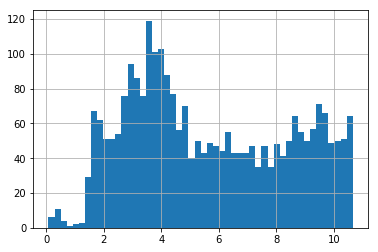


target 1 12.6407394841
30
0.02748615087009468 6.24654262274692 6.258286901951573


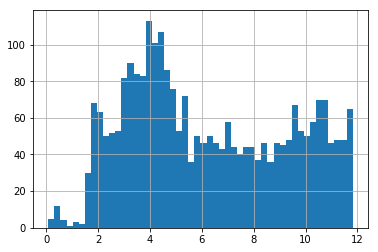


target 2 11.6683749084
30
0.025060625492383526 5.766701142244069 5.778302215871594


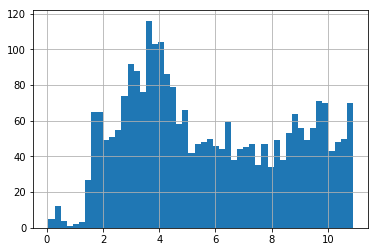


target 3 7.0496431738
30
0.014778592527747096 3.4948494949122817 3.5005728691819376


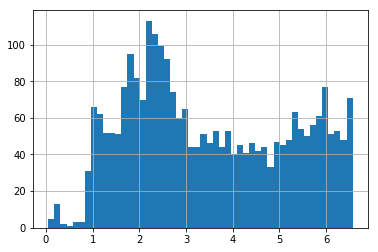


target 4 11.4252837645
30
0.025562959252197873 5.6495813642927395 5.65945619195837


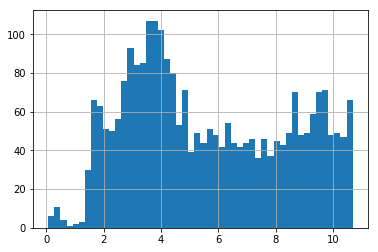


target 5 16.5301977869
30
0.0362454529056438 8.157824136355746 8.170945235585435


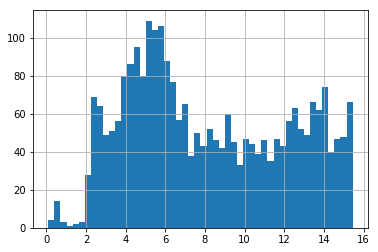


target 6 9.723645757
30
0.021064878013360818 4.8123531730266995 4.8202562423058755


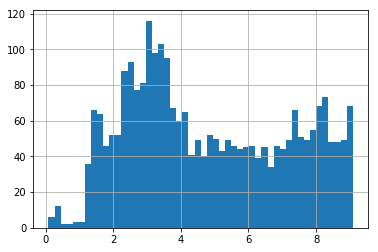


target 7 12.6407394841
30
0.026874737077093674 6.244684249765195 6.25550558569498


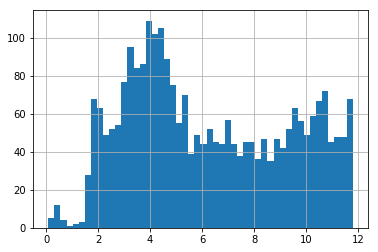


target 8 16.5301977869
30
0.03676798073391592 8.1566174305968 8.170962592232454


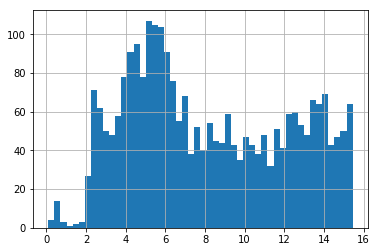

In [48]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [49]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.172885228908125 5.5426000241214926


In [50]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.184050834296593 5.54965511721943
